In [21]:
from PIL import Image
import glob
import os
from pathlib import Path
from tflite_model_maker import image_classifier, config
from matplotlib import pyplot as plt


# prepare data - only run once

In [ ]:
	#Converting images in cat folder to png format
current_dir = Path('content/PetImages/Cat').resolve()
outputdir = Path('content/Dataset').resolve()
out_dir = outputdir / "Cat"
#os.mkdir(out_dir)
cnt = 0

for img in glob.glob(str(current_dir / "*.jpg")):
    filename = Path(img).stem
    Image.open(img).save(str(out_dir / f'{filename}.png'))
    cnt = cnt + 1
    print(cnt)

#Converting images in dog folder to png format
current_dir = Path('content/PetImages/Dog').resolve()
outputdir = Path('content/Dataset').resolve()
out_dir = outputdir / "Dog"
#os.mkdir(out_dir)
cnt = 0

for img in glob.glob(str(current_dir / "*.jpg")):
    filename = Path(img).stem
    Image.open(img).convert('RGB').save(str(out_dir / f'{filename}.png'))
    cnt = cnt + 1
    print(cnt)

# load data

In [12]:
#Loading dataset using the Dataloader
data = image_classifier.DataLoader.from_folder('content/Dataset')


#Splitting dataset into training, validation and testing data
train_data, rest_data = data.split(0.7)
validation_data, test_data = rest_data.split(0.67)

2022-05-22 19:57:08.358878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 19:57:08.363442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 19:57:08.371565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


INFO:tensorflow:Load image with size: 24998, num_label: 2, labels: Cat, Dog.


2022-05-22 19:57:08.375067: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-22 19:57:08.375497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 19:57:08.375695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-22 19:57:08.375868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

2022-05-22 19:58:03.300644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-22 19:58:03.367512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-22 19:58:03.529380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


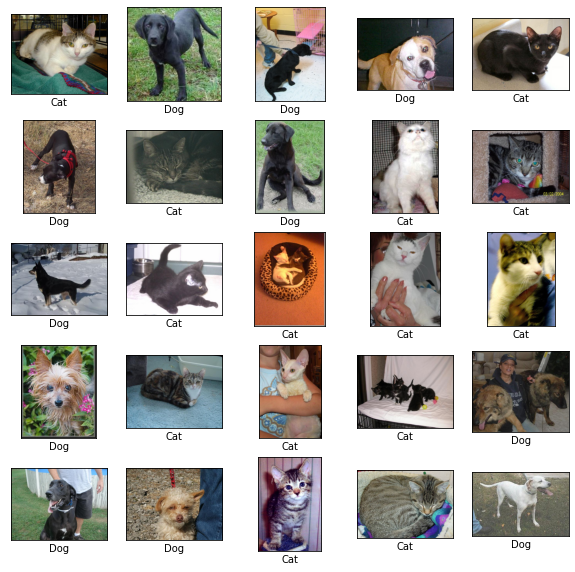

In [15]:

#Visualizing images in the dataset
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


# Training the model

In [17]:
model = image_classifier.create(train_data, validation_data=validation_data, train_whole_model=True,)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 3,415,586
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


/home/danl/miniconda3/envs/tf/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2022-05-23 14:47:48.549226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.567352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.587691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.588308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.614582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.619939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.645745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.647303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:48.651330: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/546 [..............................] - ETA: 24:39 - loss: 1.0405 - accuracy: 0.1875

2022-05-23 14:47:49.920813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:49.925856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:49.931659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:49.940383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/546 [..............................] - ETA: 2:05 - loss: 0.9029 - accuracy: 0.3594 

2022-05-23 14:47:50.151038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:50.151286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/546 [..............................] - ETA: 2:05 - loss: 0.8880 - accuracy: 0.3958

2022-05-23 14:47:50.386882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:50.396602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/546 [..............................] - ETA: 2:03 - loss: 0.7818 - accuracy: 0.5156

2022-05-23 14:47:50.608783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:50.613618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/546 [..............................] - ETA: 2:03 - loss: 0.7031 - accuracy: 0.5938

2022-05-23 14:47:50.836041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:50.848140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/546 [..............................] - ETA: 2:04 - loss: 0.5968 - accuracy: 0.6830

2022-05-23 14:47:51.302159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:51.302220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/546 [..............................] - ETA: 2:03 - loss: 0.5773 - accuracy: 0.7031

2022-05-23 14:47:51.530062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/546 [..............................] - ETA: 2:03 - loss: 0.5587 - accuracy: 0.7406

2022-05-23 14:47:51.990464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:51.996380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/546 [..............................] - ETA: 2:03 - loss: 0.5336 - accuracy: 0.7614

2022-05-23 14:47:52.226916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:52.236064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/546 [..............................] - ETA: 2:03 - loss: 0.5309 - accuracy: 0.7656

2022-05-23 14:47:52.471752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 13/546 [..............................] - ETA: 2:02 - loss: 0.5384 - accuracy: 0.7596

2022-05-23 14:47:52.695476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/546 [..............................] - ETA: 2:02 - loss: 0.5595 - accuracy: 0.7411

2022-05-23 14:47:52.920800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/546 [..............................] - ETA: 2:02 - loss: 0.5410 - accuracy: 0.7583

2022-05-23 14:47:53.148694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/546 [..............................] - ETA: 2:02 - loss: 0.5271 - accuracy: 0.7676

2022-05-23 14:47:53.379403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:53.383425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:53.387576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/546 [..............................] - ETA: 2:02 - loss: 0.4996 - accuracy: 0.7917

2022-05-23 14:47:53.861289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:47:53.861400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:47:53.861407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:47:53.861411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:47:53.861416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:47:53.861420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:47:53.861424: W tensorflow

 19/546 [>.............................] - ETA: 2:02 - loss: 0.4929 - accuracy: 0.7993

2022-05-23 14:47:54.094333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:54.097176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:54.100539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/546 [>.............................] - ETA: 2:02 - loss: 0.4855 - accuracy: 0.8047

2022-05-23 14:47:54.335711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/546 [>.............................] - ETA: 2:02 - loss: 0.4684 - accuracy: 0.8168

2022-05-23 14:47:54.809339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:54.813253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/546 [>.............................] - ETA: 2:01 - loss: 0.4627 - accuracy: 0.8220

2022-05-23 14:47:55.047105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/546 [>.............................] - ETA: 2:01 - loss: 0.4546 - accuracy: 0.8263

2022-05-23 14:47:55.514300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/546 [>.............................] - ETA: 2:01 - loss: 0.4482 - accuracy: 0.8317

2022-05-23 14:47:55.745966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:55.747850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:55.748058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:55.751998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/546 [>.............................] - ETA: 2:00 - loss: 0.4477 - accuracy: 0.8333

2022-05-23 14:47:55.975004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/546 [>.............................] - ETA: 2:00 - loss: 0.4416 - accuracy: 0.8393

2022-05-23 14:47:56.196531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/546 [>.............................] - ETA: 2:00 - loss: 0.4375 - accuracy: 0.8427

2022-05-23 14:47:56.432318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:56.443070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/546 [>.............................] - ETA: 1:59 - loss: 0.4302 - accuracy: 0.8458

2022-05-23 14:47:56.911206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:56.914238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/546 [>.............................] - ETA: 1:59 - loss: 0.4264 - accuracy: 0.8486

2022-05-23 14:47:57.128053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/546 [>.............................] - ETA: 1:59 - loss: 0.4213 - accuracy: 0.8523

2022-05-23 14:47:57.367970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/546 [>.............................] - ETA: 1:58 - loss: 0.4178 - accuracy: 0.8545

2022-05-23 14:47:57.830739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/546 [>.............................] - ETA: 1:58 - loss: 0.4132 - accuracy: 0.8576

2022-05-23 14:47:58.061041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/546 [=>............................] - ETA: 1:58 - loss: 0.4112 - accuracy: 0.8590

2022-05-23 14:47:58.283981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:58.290895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:58.291048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:58.300089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/546 [=>............................] - ETA: 1:57 - loss: 0.4083 - accuracy: 0.8618

2022-05-23 14:47:58.521308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/546 [=>............................] - ETA: 1:57 - loss: 0.4050 - accuracy: 0.8646

2022-05-23 14:47:58.748524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:58.756223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:58.761009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/546 [=>............................] - ETA: 1:57 - loss: 0.3995 - accuracy: 0.8689

2022-05-23 14:47:59.220274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/546 [=>............................] - ETA: 1:57 - loss: 0.4008 - accuracy: 0.8668

2022-05-23 14:47:59.459707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/546 [=>............................] - ETA: 1:56 - loss: 0.3992 - accuracy: 0.8670

2022-05-23 14:47:59.683556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/546 [=>............................] - ETA: 1:56 - loss: 0.3964 - accuracy: 0.8693

2022-05-23 14:47:59.909685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:47:59.922640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/546 [=>............................] - ETA: 1:56 - loss: 0.3933 - accuracy: 0.8722

2022-05-23 14:48:00.140601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/546 [=>............................] - ETA: 1:56 - loss: 0.3899 - accuracy: 0.8750

2022-05-23 14:48:00.387236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/546 [=>............................] - ETA: 1:55 - loss: 0.3890 - accuracy: 0.8763

2022-05-23 14:48:00.616050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/546 [=>............................] - ETA: 1:55 - loss: 0.3872 - accuracy: 0.8783

2022-05-23 14:48:00.852497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/546 [=>............................] - ETA: 1:55 - loss: 0.3858 - accuracy: 0.8795

2022-05-23 14:48:01.071865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/546 [=>............................] - ETA: 1:55 - loss: 0.3831 - accuracy: 0.8819

2022-05-23 14:48:01.301127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/546 [=>............................] - ETA: 1:54 - loss: 0.3779 - accuracy: 0.8852

2022-05-23 14:48:01.765669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:01.773848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:01.777229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/546 [=>............................] - ETA: 1:54 - loss: 0.3773 - accuracy: 0.8862

2022-05-23 14:48:02.001027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:02.003243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:02.007531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:02.010456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/546 [=>............................] - ETA: 1:54 - loss: 0.3745 - accuracy: 0.8883

2022-05-23 14:48:02.231323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:02.243104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/546 [==>...........................] - ETA: 1:54 - loss: 0.3732 - accuracy: 0.8892

2022-05-23 14:48:02.472242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/546 [==>...........................] - ETA: 1:53 - loss: 0.3737 - accuracy: 0.8884

2022-05-23 14:48:02.719420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/546 [==>...........................] - ETA: 1:53 - loss: 0.3713 - accuracy: 0.8904

2022-05-23 14:48:02.938067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/546 [==>...........................] - ETA: 1:52 - loss: 0.3605 - accuracy: 0.8983

2022-05-23 14:48:04.303468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:04.312580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:04.320616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/546 [==>...........................] - ETA: 1:51 - loss: 0.3591 - accuracy: 0.8989

2022-05-23 14:48:04.533527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:04.540942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/546 [==>...........................] - ETA: 1:51 - loss: 0.3576 - accuracy: 0.8995

2022-05-23 14:48:04.769301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/546 [==>...........................] - ETA: 1:51 - loss: 0.3553 - accuracy: 0.9007

2022-05-23 14:48:05.243962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/546 [==>...........................] - ETA: 1:50 - loss: 0.3562 - accuracy: 0.8998

2022-05-23 14:48:05.461746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:05.468615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/546 [==>...........................] - ETA: 1:50 - loss: 0.3550 - accuracy: 0.9004

2022-05-23 14:48:05.700307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/546 [==>...........................] - ETA: 1:50 - loss: 0.3532 - accuracy: 0.9018

2022-05-23 14:48:05.928768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:05.931609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/546 [==>...........................] - ETA: 1:50 - loss: 0.3516 - accuracy: 0.9032

2022-05-23 14:48:06.168743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/546 [==>...........................] - ETA: 1:49 - loss: 0.3512 - accuracy: 0.9036

2022-05-23 14:48:06.395679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:06.400138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:06.409535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/546 [===>..........................] - ETA: 1:49 - loss: 0.3510 - accuracy: 0.9033

2022-05-23 14:48:06.635361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:06.641392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/546 [===>..........................] - ETA: 1:49 - loss: 0.3494 - accuracy: 0.9046

2022-05-23 14:48:06.863991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:06.869767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/546 [===>..........................] - ETA: 1:49 - loss: 0.3480 - accuracy: 0.9054

2022-05-23 14:48:07.094863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:07.107936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/546 [===>..........................] - ETA: 1:49 - loss: 0.3472 - accuracy: 0.9062

2022-05-23 14:48:07.331492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:07.335588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/546 [===>..........................] - ETA: 1:48 - loss: 0.3463 - accuracy: 0.9071

2022-05-23 14:48:07.573047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/546 [===>..........................] - ETA: 1:47 - loss: 0.3415 - accuracy: 0.9101

2022-05-23 14:48:08.740581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/546 [===>..........................] - ETA: 1:47 - loss: 0.3400 - accuracy: 0.9107

2022-05-23 14:48:09.204068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:09.215112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/546 [===>..........................] - ETA: 1:47 - loss: 0.3385 - accuracy: 0.9118

2022-05-23 14:48:09.445801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/546 [===>..........................] - ETA: 1:46 - loss: 0.3373 - accuracy: 0.9128

2022-05-23 14:48:09.680982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/546 [===>..........................] - ETA: 1:46 - loss: 0.3358 - accuracy: 0.9138

2022-05-23 14:48:09.901513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:09.911305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/546 [===>..........................] - ETA: 1:46 - loss: 0.3349 - accuracy: 0.9144

2022-05-23 14:48:10.134963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/546 [===>..........................] - ETA: 1:46 - loss: 0.3336 - accuracy: 0.9160

2022-05-23 14:48:10.619114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:10.626127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/546 [====>.........................] - ETA: 1:45 - loss: 0.3329 - accuracy: 0.9166

2022-05-23 14:48:10.854306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:10.862756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:10.862800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:10.862806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:10.862811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:10.862815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:10.862819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

 93/546 [====>.........................] - ETA: 1:45 - loss: 0.3310 - accuracy: 0.9177

2022-05-23 14:48:11.325110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/546 [====>.........................] - ETA: 1:45 - loss: 0.3301 - accuracy: 0.9182

2022-05-23 14:48:11.554263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/546 [====>.........................] - ETA: 1:44 - loss: 0.3291 - accuracy: 0.9191

2022-05-23 14:48:11.778751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:11.788608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/546 [====>.........................] - ETA: 1:44 - loss: 0.3282 - accuracy: 0.9193

2022-05-23 14:48:12.020960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:12.024824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/546 [====>.........................] - ETA: 1:44 - loss: 0.3270 - accuracy: 0.9201

2022-05-23 14:48:12.264471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/546 [====>.........................] - ETA: 1:44 - loss: 0.3259 - accuracy: 0.9209

2022-05-23 14:48:12.493295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/546 [====>.........................] - ETA: 1:43 - loss: 0.3239 - accuracy: 0.9222

2022-05-23 14:48:12.973741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/546 [====>.........................] - ETA: 1:43 - loss: 0.3216 - accuracy: 0.9242

2022-05-23 14:48:13.677910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/546 [====>.........................] - ETA: 1:42 - loss: 0.3207 - accuracy: 0.9249

2022-05-23 14:48:13.910220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/546 [====>.........................] - ETA: 1:42 - loss: 0.3197 - accuracy: 0.9256

2022-05-23 14:48:14.148910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:14.157148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:14.162001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/546 [====>.........................] - ETA: 1:42 - loss: 0.3189 - accuracy: 0.9260

2022-05-23 14:48:14.383755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/546 [====>.........................] - ETA: 1:42 - loss: 0.3171 - accuracy: 0.9274

2022-05-23 14:48:14.849220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:14.858714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/546 [=====>........................] - ETA: 1:41 - loss: 0.3156 - accuracy: 0.9284

2022-05-23 14:48:15.317145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:15.324485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/546 [=====>........................] - ETA: 1:41 - loss: 0.3146 - accuracy: 0.9291

2022-05-23 14:48:15.786074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/546 [=====>........................] - ETA: 1:40 - loss: 0.3139 - accuracy: 0.9295

2022-05-23 14:48:16.016387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:16.023028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:16.023667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/546 [=====>........................] - ETA: 1:40 - loss: 0.3135 - accuracy: 0.9298

2022-05-23 14:48:16.250898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/546 [=====>........................] - ETA: 1:39 - loss: 0.3121 - accuracy: 0.9306

2022-05-23 14:48:16.952729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:16.958678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/546 [=====>........................] - ETA: 1:39 - loss: 0.3114 - accuracy: 0.9309

2022-05-23 14:48:17.186393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:17.199623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/546 [=====>........................] - ETA: 1:39 - loss: 0.3109 - accuracy: 0.9312

2022-05-23 14:48:17.416839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:17.423466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/546 [=====>........................] - ETA: 1:39 - loss: 0.3103 - accuracy: 0.9315

2022-05-23 14:48:17.643269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/546 [=====>........................] - ETA: 1:38 - loss: 0.3097 - accuracy: 0.9318

2022-05-23 14:48:17.872854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:17.882318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:17.885584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/546 [=====>........................] - ETA: 1:38 - loss: 0.3091 - accuracy: 0.9321

2022-05-23 14:48:18.108411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/546 [=====>........................] - ETA: 1:38 - loss: 0.3085 - accuracy: 0.9327

2022-05-23 14:48:18.344048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


124/546 [=====>........................] - ETA: 1:38 - loss: 0.3078 - accuracy: 0.9332

2022-05-23 14:48:18.576042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:18.585920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/546 [=====>........................] - ETA: 1:38 - loss: 0.3073 - accuracy: 0.9335

2022-05-23 14:48:18.823791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/546 [=====>........................] - ETA: 1:37 - loss: 0.3068 - accuracy: 0.9335

2022-05-23 14:48:19.053768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/546 [======>.......................] - ETA: 1:37 - loss: 0.3060 - accuracy: 0.9338

2022-05-23 14:48:19.508544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:19.518199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/546 [======>.......................] - ETA: 1:36 - loss: 0.3049 - accuracy: 0.9346

2022-05-23 14:48:19.984166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:19.989548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:19.994149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/546 [======>.......................] - ETA: 1:36 - loss: 0.3045 - accuracy: 0.9346

2022-05-23 14:48:20.214792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:20.219125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:20.221131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.221254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.221271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.221275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.221279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profil

132/546 [======>.......................] - ETA: 1:36 - loss: 0.3044 - accuracy: 0.9347

2022-05-23 14:48:20.438857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:20.453330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/546 [======>.......................] - ETA: 1:36 - loss: 0.3040 - accuracy: 0.9347

2022-05-23 14:48:20.683806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.684081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.684108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.684123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.684136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.684149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:20.684160: W tensorflow

134/546 [======>.......................] - ETA: 1:35 - loss: 0.3034 - accuracy: 0.9352

2022-05-23 14:48:20.904732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:20.917394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/546 [======>.......................] - ETA: 1:35 - loss: 0.3031 - accuracy: 0.9352

2022-05-23 14:48:21.141095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:21.142525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:21.151944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:21.152701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/546 [======>.......................] - ETA: 1:35 - loss: 0.3024 - accuracy: 0.9357

2022-05-23 14:48:21.372117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:21.382014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/546 [======>.......................] - ETA: 1:35 - loss: 0.3020 - accuracy: 0.9361

2022-05-23 14:48:21.610387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2022-05-23 14:48:21.615930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/546 [======>.......................] - ETA: 1:35 - loss: 0.3015 - accuracy: 0.9366

2022-05-23 14:48:21.834583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:21.845079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/546 [======>.......................] - ETA: 1:34 - loss: 0.3011 - accuracy: 0.9368

2022-05-23 14:48:22.071890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/546 [======>.......................] - ETA: 1:34 - loss: 0.3010 - accuracy: 0.9368

2022-05-23 14:48:22.300692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:22.311032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/546 [======>.......................] - ETA: 1:34 - loss: 0.3004 - accuracy: 0.9373

2022-05-23 14:48:22.764476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:22.783383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/546 [======>.......................] - ETA: 1:33 - loss: 0.2998 - accuracy: 0.9377

2022-05-23 14:48:22.998351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:23.004878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/546 [======>.......................] - ETA: 1:33 - loss: 0.2994 - accuracy: 0.9379

2022-05-23 14:48:23.251826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:23.252589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/546 [======>.......................] - ETA: 1:33 - loss: 0.2988 - accuracy: 0.9384

2022-05-23 14:48:23.476554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:23.477020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/546 [=======>......................] - ETA: 1:32 - loss: 0.2980 - accuracy: 0.9390

2022-05-23 14:48:23.923835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:23.929761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:23.938285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/546 [=======>......................] - ETA: 1:32 - loss: 0.2972 - accuracy: 0.9396

2022-05-23 14:48:24.392696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:24.399857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/546 [=======>......................] - ETA: 1:32 - loss: 0.2966 - accuracy: 0.9400

2022-05-23 14:48:24.624302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:24.624718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/546 [=======>......................] - ETA: 1:32 - loss: 0.2961 - accuracy: 0.9402

2022-05-23 14:48:24.871334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/546 [=======>......................] - ETA: 1:31 - loss: 0.2957 - accuracy: 0.9406

2022-05-23 14:48:25.095792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:25.098513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:25.102446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/546 [=======>......................] - ETA: 1:31 - loss: 0.2951 - accuracy: 0.9410

2022-05-23 14:48:25.324071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:25.335779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/546 [=======>......................] - ETA: 1:31 - loss: 0.2949 - accuracy: 0.9409

2022-05-23 14:48:25.811909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/546 [=======>......................] - ETA: 1:30 - loss: 0.2945 - accuracy: 0.9411

2022-05-23 14:48:26.037035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/546 [=======>......................] - ETA: 1:30 - loss: 0.2941 - accuracy: 0.9415

2022-05-23 14:48:26.267849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/546 [=======>......................] - ETA: 1:29 - loss: 0.2933 - accuracy: 0.9418

2022-05-23 14:48:26.962518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/546 [=======>......................] - ETA: 1:29 - loss: 0.2929 - accuracy: 0.9422

2022-05-23 14:48:27.199383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:27.201064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:27.210164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:27.212161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/546 [=======>......................] - ETA: 1:29 - loss: 0.2927 - accuracy: 0.9421

2022-05-23 14:48:27.435804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:27.436893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:27.443103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:27.443889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/546 [=======>......................] - ETA: 1:29 - loss: 0.2924 - accuracy: 0.9425

2022-05-23 14:48:27.668875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/546 [========>.....................] - ETA: 1:29 - loss: 0.2922 - accuracy: 0.9426

2022-05-23 14:48:27.901392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/546 [========>.....................] - ETA: 1:28 - loss: 0.2918 - accuracy: 0.9428

2022-05-23 14:48:28.149395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:28.155058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:28.156837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/546 [========>.....................] - ETA: 1:28 - loss: 0.2913 - accuracy: 0.9431

2022-05-23 14:48:28.374756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/546 [========>.....................] - ETA: 1:28 - loss: 0.2914 - accuracy: 0.9433

2022-05-23 14:48:28.590974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:28.591639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:28.591669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:28.591675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:28.591679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:28.591683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:28.591687: W tensorflow

168/546 [========>.....................] - ETA: 1:28 - loss: 0.2911 - accuracy: 0.9435

2022-05-23 14:48:28.821723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/546 [========>.....................] - ETA: 1:27 - loss: 0.2908 - accuracy: 0.9438

2022-05-23 14:48:29.062619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:29.063337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/546 [========>.....................] - ETA: 1:27 - loss: 0.2903 - accuracy: 0.9441

2022-05-23 14:48:29.291973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/546 [========>.....................] - ETA: 1:27 - loss: 0.2904 - accuracy: 0.9439

2022-05-23 14:48:29.529321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/546 [========>.....................] - ETA: 1:27 - loss: 0.2902 - accuracy: 0.9440

2022-05-23 14:48:29.760078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/546 [========>.....................] - ETA: 1:26 - loss: 0.2897 - accuracy: 0.9444

2022-05-23 14:48:29.998935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:29.999158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:29.999164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:29.999167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:29.999171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:29.999175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:29.999178: W tensorflow

174/546 [========>.....................] - ETA: 1:26 - loss: 0.2893 - accuracy: 0.9447

2022-05-23 14:48:30.232967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/546 [========>.....................] - ETA: 1:26 - loss: 0.2888 - accuracy: 0.9450

2022-05-23 14:48:30.463670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:30.472244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/546 [========>.....................] - ETA: 1:26 - loss: 0.2886 - accuracy: 0.9451

2022-05-23 14:48:30.693859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:30.706111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/546 [========>.....................] - ETA: 1:26 - loss: 0.2882 - accuracy: 0.9454

2022-05-23 14:48:30.939051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/546 [========>.....................] - ETA: 1:25 - loss: 0.2878 - accuracy: 0.9458

2022-05-23 14:48:31.170090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:31.170920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/546 [========>.....................] - ETA: 1:25 - loss: 0.2871 - accuracy: 0.9464

2022-05-23 14:48:31.638727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:31.647084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:31.649191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/546 [========>.....................] - ETA: 1:25 - loss: 0.2871 - accuracy: 0.9463

2022-05-23 14:48:31.879745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:31.884872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/546 [=========>....................] - ETA: 1:24 - loss: 0.2871 - accuracy: 0.9463

2022-05-23 14:48:32.106273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


184/546 [=========>....................] - ETA: 1:24 - loss: 0.2863 - accuracy: 0.9468

2022-05-23 14:48:32.585075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:32.585274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/546 [=========>....................] - ETA: 1:24 - loss: 0.2860 - accuracy: 0.9471

2022-05-23 14:48:32.811994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:32.815272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/546 [=========>....................] - ETA: 1:23 - loss: 0.2855 - accuracy: 0.9474

2022-05-23 14:48:33.044216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:33.044252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:33.044258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:33.044262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:33.044266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:33.044270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:33.044275: W tensorflow

189/546 [=========>....................] - ETA: 1:23 - loss: 0.2845 - accuracy: 0.9482

2022-05-23 14:48:33.740600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/546 [=========>....................] - ETA: 1:22 - loss: 0.2839 - accuracy: 0.9486

2022-05-23 14:48:34.208628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:34.213952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:34.219555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/546 [=========>....................] - ETA: 1:22 - loss: 0.2831 - accuracy: 0.9492

2022-05-23 14:48:34.676902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:34.677011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:34.679268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/546 [=========>....................] - ETA: 1:22 - loss: 0.2828 - accuracy: 0.9494

2022-05-23 14:48:34.912547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/546 [=========>....................] - ETA: 1:21 - loss: 0.2824 - accuracy: 0.9497

2022-05-23 14:48:35.147070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/546 [=========>....................] - ETA: 1:21 - loss: 0.2820 - accuracy: 0.9499

2022-05-23 14:48:35.382516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:35.382968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:35.387382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/546 [=========>....................] - ETA: 1:21 - loss: 0.2816 - accuracy: 0.9502

2022-05-23 14:48:35.622645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/546 [=========>....................] - ETA: 1:20 - loss: 0.2811 - accuracy: 0.9505

2022-05-23 14:48:36.073153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:36.076302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/546 [=========>....................] - ETA: 1:20 - loss: 0.2808 - accuracy: 0.9508

2022-05-23 14:48:36.309948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/546 [==========>...................] - ETA: 1:20 - loss: 0.2804 - accuracy: 0.9510

2022-05-23 14:48:36.543661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:36.544773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:36.555645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


202/546 [==========>...................] - ETA: 1:20 - loss: 0.2801 - accuracy: 0.9513

2022-05-23 14:48:36.774561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:36.777841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:36.778650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/546 [==========>...................] - ETA: 1:19 - loss: 0.2797 - accuracy: 0.9515

2022-05-23 14:48:37.012020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:37.019131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/546 [==========>...................] - ETA: 1:19 - loss: 0.2795 - accuracy: 0.9516

2022-05-23 14:48:37.259980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/546 [==========>...................] - ETA: 1:19 - loss: 0.2793 - accuracy: 0.9517

2022-05-23 14:48:37.476119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/546 [==========>...................] - ETA: 1:19 - loss: 0.2790 - accuracy: 0.9519

2022-05-23 14:48:37.701109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:37.707750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:37.709250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/546 [==========>...................] - ETA: 1:19 - loss: 0.2787 - accuracy: 0.9521

2022-05-23 14:48:37.944701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


208/546 [==========>...................] - ETA: 1:18 - loss: 0.2784 - accuracy: 0.9524

2022-05-23 14:48:38.161460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:38.178590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/546 [==========>...................] - ETA: 1:18 - loss: 0.2785 - accuracy: 0.9525

2022-05-23 14:48:38.405131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:38.412133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/546 [==========>...................] - ETA: 1:18 - loss: 0.2787 - accuracy: 0.9526

2022-05-23 14:48:38.886237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/546 [==========>...................] - ETA: 1:17 - loss: 0.2784 - accuracy: 0.9528

2022-05-23 14:48:39.103814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:39.117618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/546 [==========>...................] - ETA: 1:17 - loss: 0.2781 - accuracy: 0.9531

2022-05-23 14:48:39.339410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:39.351984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:39.352030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:39.352034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:39.352038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:39.352041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:39.352045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

214/546 [==========>...................] - ETA: 1:17 - loss: 0.2781 - accuracy: 0.9531

2022-05-23 14:48:39.589430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/546 [==========>...................] - ETA: 1:17 - loss: 0.2778 - accuracy: 0.9533

2022-05-23 14:48:39.823029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/546 [==========>...................] - ETA: 1:16 - loss: 0.2780 - accuracy: 0.9533

2022-05-23 14:48:40.056108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/546 [==========>...................] - ETA: 1:16 - loss: 0.2777 - accuracy: 0.9535

2022-05-23 14:48:40.282306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:40.290209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:40.293989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:40.296795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/546 [==========>...................] - ETA: 1:16 - loss: 0.2779 - accuracy: 0.9534

2022-05-23 14:48:40.522212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/546 [===========>..................] - ETA: 1:16 - loss: 0.2776 - accuracy: 0.9536

2022-05-23 14:48:40.760248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


223/546 [===========>..................] - ETA: 1:15 - loss: 0.2766 - accuracy: 0.9542

2022-05-23 14:48:41.699169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/546 [===========>..................] - ETA: 1:14 - loss: 0.2768 - accuracy: 0.9540

2022-05-23 14:48:42.157306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.158410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.163728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.164991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


226/546 [===========>..................] - ETA: 1:14 - loss: 0.2769 - accuracy: 0.9541

2022-05-23 14:48:42.404915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


227/546 [===========>..................] - ETA: 1:14 - loss: 0.2767 - accuracy: 0.9542

2022-05-23 14:48:42.628042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.628155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.634752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.635692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:42.637425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/546 [===========>..................] - ETA: 1:13 - loss: 0.2767 - accuracy: 0.9543

2022-05-23 14:48:43.570798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:43.577066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/546 [===========>..................] - ETA: 1:13 - loss: 0.2762 - accuracy: 0.9547

2022-05-23 14:48:44.043842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/546 [============>.................] - ETA: 1:12 - loss: 0.2762 - accuracy: 0.9546

2022-05-23 14:48:44.982076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:44.997180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/546 [============>.................] - ETA: 1:11 - loss: 0.2758 - accuracy: 0.9549

2022-05-23 14:48:45.456833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/546 [============>.................] - ETA: 1:11 - loss: 0.2759 - accuracy: 0.9547

2022-05-23 14:48:45.688186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:45.699929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/546 [============>.................] - ETA: 1:11 - loss: 0.2759 - accuracy: 0.9547

2022-05-23 14:48:45.929961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:45.934828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/546 [============>.................] - ETA: 1:10 - loss: 0.2759 - accuracy: 0.9548

2022-05-23 14:48:46.146996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:46.147803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/546 [============>.................] - ETA: 1:10 - loss: 0.2760 - accuracy: 0.9545

2022-05-23 14:48:46.611903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:46.612122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/546 [============>.................] - ETA: 1:10 - loss: 0.2759 - accuracy: 0.9547

2022-05-23 14:48:46.848922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:46.854891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:46.859353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/546 [============>.................] - ETA: 1:09 - loss: 0.2758 - accuracy: 0.9548

2022-05-23 14:48:47.080871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:47.083530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:47.089973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


248/546 [============>.................] - ETA: 1:09 - loss: 0.2762 - accuracy: 0.9548

2022-05-23 14:48:47.565675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/546 [============>.................] - ETA: 1:09 - loss: 0.2761 - accuracy: 0.9547

2022-05-23 14:48:47.781613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:47.785371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:47.796905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/546 [============>.................] - ETA: 1:09 - loss: 0.2760 - accuracy: 0.9548

2022-05-23 14:48:48.018606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:48.030282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/546 [============>.................] - ETA: 1:08 - loss: 0.2760 - accuracy: 0.9548

2022-05-23 14:48:48.253046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:48.258735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:48.259667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/546 [============>.................] - ETA: 1:08 - loss: 0.2757 - accuracy: 0.9550

2022-05-23 14:48:48.502204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


256/546 [=============>................] - ETA: 1:07 - loss: 0.2753 - accuracy: 0.9552

2022-05-23 14:48:49.433804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/546 [=============>................] - ETA: 1:07 - loss: 0.2752 - accuracy: 0.9553

2022-05-23 14:48:49.668848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/546 [=============>................] - ETA: 1:07 - loss: 0.2751 - accuracy: 0.9553

2022-05-23 14:48:49.895689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/546 [=============>................] - ETA: 1:06 - loss: 0.2749 - accuracy: 0.9555

2022-05-23 14:48:50.352705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:50.367223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/546 [=============>................] - ETA: 1:06 - loss: 0.2743 - accuracy: 0.9559

2022-05-23 14:48:51.049052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:51.060324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:51.066115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/546 [=============>................] - ETA: 1:05 - loss: 0.2739 - accuracy: 0.9561

2022-05-23 14:48:51.515610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/546 [=============>................] - ETA: 1:05 - loss: 0.2741 - accuracy: 0.9561

2022-05-23 14:48:51.748618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:51.753206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:51.759938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:51.762768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/546 [=============>................] - ETA: 1:05 - loss: 0.2740 - accuracy: 0.9562

2022-05-23 14:48:51.986303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/546 [=============>................] - ETA: 1:04 - loss: 0.2741 - accuracy: 0.9562

2022-05-23 14:48:52.221086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


269/546 [=============>................] - ETA: 1:04 - loss: 0.2740 - accuracy: 0.9562

2022-05-23 14:48:52.453910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:52.457192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:52.458105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


270/546 [=============>................] - ETA: 1:04 - loss: 0.2739 - accuracy: 0.9563

2022-05-23 14:48:52.684101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:52.691507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/546 [=============>................] - ETA: 1:03 - loss: 0.2738 - accuracy: 0.9563

2022-05-23 14:48:53.154781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:53.161549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/546 [==============>...............] - ETA: 1:03 - loss: 0.2735 - accuracy: 0.9564

2022-05-23 14:48:53.609873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:53.610092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:53.613898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:53.614728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/546 [==============>...............] - ETA: 1:03 - loss: 0.2733 - accuracy: 0.9565

2022-05-23 14:48:53.836745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:53.839373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:53.843957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/546 [==============>...............] - ETA: 1:02 - loss: 0.2735 - accuracy: 0.9564

2022-05-23 14:48:54.072269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


277/546 [==============>...............] - ETA: 1:02 - loss: 0.2733 - accuracy: 0.9566

2022-05-23 14:48:54.295116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/546 [==============>...............] - ETA: 1:01 - loss: 0.2724 - accuracy: 0.9572

2022-05-23 14:48:55.466798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/546 [==============>...............] - ETA: 1:01 - loss: 0.2722 - accuracy: 0.9574

2022-05-23 14:48:55.699094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:55.702091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/546 [==============>...............] - ETA: 1:01 - loss: 0.2720 - accuracy: 0.9575

2022-05-23 14:48:55.943370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/546 [==============>...............] - ETA: 1:00 - loss: 0.2717 - accuracy: 0.9578

2022-05-23 14:48:56.399928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:56.405390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:56.406851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


288/546 [==============>...............] - ETA: 1:00 - loss: 0.2713 - accuracy: 0.9580

2022-05-23 14:48:56.882216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/546 [==============>...............] - ETA: 59s - loss: 0.2714 - accuracy: 0.9579 

2022-05-23 14:48:57.103853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:57.104106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:57.108466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/546 [==============>...............] - ETA: 59s - loss: 0.2712 - accuracy: 0.9581

2022-05-23 14:48:57.335442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/546 [==============>...............] - ETA: 59s - loss: 0.2710 - accuracy: 0.9582

2022-05-23 14:48:57.570227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:48:57.570584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:57.570600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:48:57.570605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:57.570609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:57.570613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:48:57.570617: W tensorflow

293/546 [===============>..............] - ETA: 59s - loss: 0.2706 - accuracy: 0.9585

2022-05-23 14:48:58.047205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/546 [===============>..............] - ETA: 58s - loss: 0.2705 - accuracy: 0.9587

2022-05-23 14:48:58.276677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/546 [===============>..............] - ETA: 58s - loss: 0.2705 - accuracy: 0.9587

2022-05-23 14:48:58.516006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/546 [===============>..............] - ETA: 58s - loss: 0.2705 - accuracy: 0.9587

2022-05-23 14:48:58.742798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/546 [===============>..............] - ETA: 58s - loss: 0.2704 - accuracy: 0.9588

2022-05-23 14:48:58.986661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:58.987306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:58.992929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/546 [===============>..............] - ETA: 57s - loss: 0.2702 - accuracy: 0.9589

2022-05-23 14:48:59.213120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/546 [===============>..............] - ETA: 57s - loss: 0.2700 - accuracy: 0.9590

2022-05-23 14:48:59.448707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/546 [===============>..............] - ETA: 57s - loss: 0.2699 - accuracy: 0.9591

2022-05-23 14:48:59.676405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:59.688524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:48:59.690791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/546 [===============>..............] - ETA: 57s - loss: 0.2698 - accuracy: 0.9591

2022-05-23 14:48:59.924374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/546 [===============>..............] - ETA: 56s - loss: 0.2699 - accuracy: 0.9591

2022-05-23 14:49:00.159302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/546 [===============>..............] - ETA: 56s - loss: 0.2694 - accuracy: 0.9595

2022-05-23 14:49:01.097036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/546 [===============>..............] - ETA: 55s - loss: 0.2692 - accuracy: 0.9596

2022-05-23 14:49:01.322061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:01.336605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:01.337770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/546 [===============>..............] - ETA: 55s - loss: 0.2690 - accuracy: 0.9597

2022-05-23 14:49:01.555272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:01.556708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


309/546 [===============>..............] - ETA: 55s - loss: 0.2688 - accuracy: 0.9599

2022-05-23 14:49:01.793665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/546 [================>.............] - ETA: 54s - loss: 0.2685 - accuracy: 0.9601

2022-05-23 14:49:02.495544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:02.504345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:02.509304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/546 [================>.............] - ETA: 53s - loss: 0.2686 - accuracy: 0.9601

2022-05-23 14:49:03.441023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/546 [================>.............] - ETA: 53s - loss: 0.2687 - accuracy: 0.9600

2022-05-23 14:49:03.688177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:03.689954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/546 [================>.............] - ETA: 53s - loss: 0.2691 - accuracy: 0.9597

2022-05-23 14:49:03.916863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:03.919310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/546 [================>.............] - ETA: 52s - loss: 0.2689 - accuracy: 0.9597

2022-05-23 14:49:04.153240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/546 [================>.............] - ETA: 52s - loss: 0.2688 - accuracy: 0.9599

2022-05-23 14:49:04.385096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/546 [================>.............] - ETA: 52s - loss: 0.2686 - accuracy: 0.9600

2022-05-23 14:49:04.624540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/546 [================>.............] - ETA: 52s - loss: 0.2688 - accuracy: 0.9598

2022-05-23 14:49:04.843749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/546 [================>.............] - ETA: 52s - loss: 0.2688 - accuracy: 0.9598

2022-05-23 14:49:05.080132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:05.096223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/546 [================>.............] - ETA: 51s - loss: 0.2686 - accuracy: 0.9600

2022-05-23 14:49:05.332691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/546 [================>.............] - ETA: 51s - loss: 0.2685 - accuracy: 0.9601

2022-05-23 14:49:05.572557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:05.577413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/546 [=================>............] - ETA: 50s - loss: 0.2682 - accuracy: 0.9604

2022-05-23 14:49:06.276697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:06.278649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:06.292872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


330/546 [=================>............] - ETA: 50s - loss: 0.2682 - accuracy: 0.9602

2022-05-23 14:49:06.752666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:06.756255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/546 [=================>............] - ETA: 50s - loss: 0.2682 - accuracy: 0.9603

2022-05-23 14:49:06.980888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/546 [=================>............] - ETA: 49s - loss: 0.2683 - accuracy: 0.9601

2022-05-23 14:49:07.208661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/546 [=================>............] - ETA: 49s - loss: 0.2682 - accuracy: 0.9602

2022-05-23 14:49:07.427025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/546 [=================>............] - ETA: 49s - loss: 0.2680 - accuracy: 0.9603

2022-05-23 14:49:07.664978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


335/546 [=================>............] - ETA: 49s - loss: 0.2681 - accuracy: 0.9603

2022-05-23 14:49:07.911003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


336/546 [=================>............] - ETA: 49s - loss: 0.2681 - accuracy: 0.9602

2022-05-23 14:49:08.133238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:08.149084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/546 [=================>............] - ETA: 48s - loss: 0.2679 - accuracy: 0.9603

2022-05-23 14:49:08.620755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/546 [=================>............] - ETA: 47s - loss: 0.2679 - accuracy: 0.9602

2022-05-23 14:49:09.307527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


342/546 [=================>............] - ETA: 47s - loss: 0.2678 - accuracy: 0.9603

2022-05-23 14:49:09.551540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:09.552600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/546 [=================>............] - ETA: 47s - loss: 0.2679 - accuracy: 0.9603

2022-05-23 14:49:10.015242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:10.015730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/546 [=================>............] - ETA: 46s - loss: 0.2680 - accuracy: 0.9602

2022-05-23 14:49:10.255943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:10.265552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


346/546 [==================>...........] - ETA: 46s - loss: 0.2678 - accuracy: 0.9604

2022-05-23 14:49:10.493348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:10.494111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:10.495229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/546 [==================>...........] - ETA: 46s - loss: 0.2676 - accuracy: 0.9605

2022-05-23 14:49:10.965263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:10.977037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/546 [==================>...........] - ETA: 46s - loss: 0.2676 - accuracy: 0.9605

2022-05-23 14:49:11.193526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:11.206127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/546 [==================>...........] - ETA: 45s - loss: 0.2675 - accuracy: 0.9605

2022-05-23 14:49:11.667698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:11.670887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/546 [==================>...........] - ETA: 45s - loss: 0.2675 - accuracy: 0.9605

2022-05-23 14:49:11.902302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:11.902731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/546 [==================>...........] - ETA: 45s - loss: 0.2673 - accuracy: 0.9606

2022-05-23 14:49:12.133083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/546 [==================>...........] - ETA: 44s - loss: 0.2672 - accuracy: 0.9607

2022-05-23 14:49:12.353923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:12.366258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:12.367448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/546 [==================>...........] - ETA: 44s - loss: 0.2670 - accuracy: 0.9608

2022-05-23 14:49:12.591472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:12.591556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:12.591562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:12.591566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:12.591569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:12.591572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:12.591575: W tensorflow

356/546 [==================>...........] - ETA: 44s - loss: 0.2669 - accuracy: 0.9609

2022-05-23 14:49:12.828251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:12.833879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/546 [==================>...........] - ETA: 44s - loss: 0.2669 - accuracy: 0.9610

2022-05-23 14:49:13.067689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:13.068990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:13.077647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/546 [==================>...........] - ETA: 43s - loss: 0.2670 - accuracy: 0.9609

2022-05-23 14:49:13.771295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:13.772728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/546 [==================>...........] - ETA: 43s - loss: 0.2669 - accuracy: 0.9610

2022-05-23 14:49:13.998684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:14.009848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:14.013280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:14.013540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/546 [==================>...........] - ETA: 42s - loss: 0.2667 - accuracy: 0.9612

2022-05-23 14:49:14.461377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:14.464793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:14.465161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/546 [===================>..........] - ETA: 42s - loss: 0.2665 - accuracy: 0.9613

2022-05-23 14:49:14.704325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:14.709241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/546 [===================>..........] - ETA: 42s - loss: 0.2665 - accuracy: 0.9613

2022-05-23 14:49:14.936878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/546 [===================>..........] - ETA: 41s - loss: 0.2663 - accuracy: 0.9615

2022-05-23 14:49:15.869948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:15.873255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/546 [===================>..........] - ETA: 41s - loss: 0.2662 - accuracy: 0.9615

2022-05-23 14:49:16.101716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:16.104392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


372/546 [===================>..........] - ETA: 40s - loss: 0.2661 - accuracy: 0.9615

2022-05-23 14:49:16.571464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:16.576224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/546 [===================>..........] - ETA: 40s - loss: 0.2660 - accuracy: 0.9615

2022-05-23 14:49:16.807999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:16.815494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:16.822134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


374/546 [===================>..........] - ETA: 40s - loss: 0.2659 - accuracy: 0.9616

2022-05-23 14:49:17.049177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:17.053426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/546 [===================>..........] - ETA: 39s - loss: 0.2659 - accuracy: 0.9617

2022-05-23 14:49:17.284800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:17.295830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/546 [===================>..........] - ETA: 39s - loss: 0.2658 - accuracy: 0.9618

2022-05-23 14:49:17.517792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:17.518279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:17.532380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/546 [===================>..........] - ETA: 39s - loss: 0.2657 - accuracy: 0.9619

2022-05-23 14:49:17.754756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:17.762061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:17.771200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/546 [===================>..........] - ETA: 39s - loss: 0.2657 - accuracy: 0.9619

2022-05-23 14:49:18.002667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/546 [===================>..........] - ETA: 39s - loss: 0.2655 - accuracy: 0.9620

2022-05-23 14:49:18.228036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:18.234623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/546 [===================>..........] - ETA: 38s - loss: 0.2653 - accuracy: 0.9621

2022-05-23 14:49:18.709742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:18.712057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:18.715788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:18.715917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:18.717913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/546 [===================>..........] - ETA: 38s - loss: 0.2652 - accuracy: 0.9622

2022-05-23 14:49:18.941733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:18.957660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:18.957891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:18.957927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:18.957932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:18.957936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:18.957939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

383/546 [====================>.........] - ETA: 38s - loss: 0.2651 - accuracy: 0.9623

2022-05-23 14:49:19.174331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:19.174486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


384/546 [====================>.........] - ETA: 37s - loss: 0.2650 - accuracy: 0.9623

2022-05-23 14:49:19.414845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:19.414881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:19.414886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:19.414889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:19.414893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:19.414896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:19.414900: W tensorflow

385/546 [====================>.........] - ETA: 37s - loss: 0.2649 - accuracy: 0.9624

2022-05-23 14:49:19.658263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:19.665540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/546 [====================>.........] - ETA: 37s - loss: 0.2647 - accuracy: 0.9626

2022-05-23 14:49:20.116059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/546 [====================>.........] - ETA: 36s - loss: 0.2646 - accuracy: 0.9626

2022-05-23 14:49:20.590199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/546 [====================>.........] - ETA: 36s - loss: 0.2645 - accuracy: 0.9627

2022-05-23 14:49:20.811234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:20.812742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:20.820217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/546 [====================>.........] - ETA: 36s - loss: 0.2645 - accuracy: 0.9627

2022-05-23 14:49:21.053617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:21.063681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/546 [====================>.........] - ETA: 35s - loss: 0.2645 - accuracy: 0.9627

2022-05-23 14:49:21.281016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/546 [====================>.........] - ETA: 35s - loss: 0.2644 - accuracy: 0.9628

2022-05-23 14:49:21.519565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/546 [====================>.........] - ETA: 35s - loss: 0.2642 - accuracy: 0.9629

2022-05-23 14:49:21.755478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:21.769557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/546 [====================>.........] - ETA: 35s - loss: 0.2641 - accuracy: 0.9630

2022-05-23 14:49:22.000248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:22.000815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:22.013671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/546 [====================>.........] - ETA: 35s - loss: 0.2641 - accuracy: 0.9630

2022-05-23 14:49:22.236327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


397/546 [====================>.........] - ETA: 34s - loss: 0.2640 - accuracy: 0.9631

2022-05-23 14:49:22.464035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/546 [====================>.........] - ETA: 34s - loss: 0.2638 - accuracy: 0.9632

2022-05-23 14:49:22.697647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:22.706601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/546 [====================>.........] - ETA: 34s - loss: 0.2638 - accuracy: 0.9632

2022-05-23 14:49:22.929093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


400/546 [====================>.........] - ETA: 34s - loss: 0.2638 - accuracy: 0.9632

2022-05-23 14:49:23.165970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/546 [=====================>........] - ETA: 33s - loss: 0.2640 - accuracy: 0.9631

2022-05-23 14:49:23.394516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:23.400711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/546 [=====================>........] - ETA: 33s - loss: 0.2640 - accuracy: 0.9631

2022-05-23 14:49:23.628997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/546 [=====================>........] - ETA: 33s - loss: 0.2638 - accuracy: 0.9633

2022-05-23 14:49:24.084698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:24.088716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:24.094715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:24.096032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/546 [=====================>........] - ETA: 31s - loss: 0.2636 - accuracy: 0.9633

2022-05-23 14:49:25.502690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:25.506541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/546 [=====================>........] - ETA: 31s - loss: 0.2634 - accuracy: 0.9634

2022-05-23 14:49:25.735849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:25.748823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/546 [=====================>........] - ETA: 31s - loss: 0.2633 - accuracy: 0.9635

2022-05-23 14:49:25.974279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:25.986035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:25.986242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:25.986270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:25.986279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:25.986283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:25.986286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

414/546 [=====================>........] - ETA: 30s - loss: 0.2631 - accuracy: 0.9636

2022-05-23 14:49:26.433044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/546 [=====================>........] - ETA: 30s - loss: 0.2630 - accuracy: 0.9637

2022-05-23 14:49:26.667082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/546 [=====================>........] - ETA: 30s - loss: 0.2628 - accuracy: 0.9638

2022-05-23 14:49:26.880221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:26.897582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/546 [=====================>........] - ETA: 30s - loss: 0.2629 - accuracy: 0.9637

2022-05-23 14:49:27.114173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:27.125231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/546 [=====================>........] - ETA: 29s - loss: 0.2627 - accuracy: 0.9638

2022-05-23 14:49:27.362163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


419/546 [======================>.......] - ETA: 29s - loss: 0.2627 - accuracy: 0.9639

2022-05-23 14:49:27.592641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/546 [======================>.......] - ETA: 29s - loss: 0.2626 - accuracy: 0.9640

2022-05-23 14:49:27.817876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:27.820352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


421/546 [======================>.......] - ETA: 29s - loss: 0.2625 - accuracy: 0.9640

2022-05-23 14:49:28.058701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/546 [======================>.......] - ETA: 28s - loss: 0.2623 - accuracy: 0.9641

2022-05-23 14:49:28.524557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:28.525053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:28.525083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:28.525105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:28.525123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:28.525141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:28.525159: W tensorflow

424/546 [======================>.......] - ETA: 28s - loss: 0.2622 - accuracy: 0.9642

2022-05-23 14:49:28.763028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/546 [======================>.......] - ETA: 28s - loss: 0.2621 - accuracy: 0.9643

2022-05-23 14:49:29.014362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/546 [======================>.......] - ETA: 27s - loss: 0.2619 - accuracy: 0.9644

2022-05-23 14:49:29.464803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:29.473243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/546 [======================>.......] - ETA: 27s - loss: 0.2618 - accuracy: 0.9644

2022-05-23 14:49:29.703915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/546 [======================>.......] - ETA: 27s - loss: 0.2617 - accuracy: 0.9645

2022-05-23 14:49:29.942213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:29.943371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/546 [======================>.......] - ETA: 27s - loss: 0.2619 - accuracy: 0.9645

2022-05-23 14:49:30.158181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


431/546 [======================>.......] - ETA: 26s - loss: 0.2618 - accuracy: 0.9645

2022-05-23 14:49:30.394721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/546 [======================>.......] - ETA: 26s - loss: 0.2619 - accuracy: 0.9645

2022-05-23 14:49:30.623949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:30.637507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/546 [======================>.......] - ETA: 26s - loss: 0.2619 - accuracy: 0.9645

2022-05-23 14:49:30.857650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:30.857981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:30.875204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:30.877258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


434/546 [======================>.......] - ETA: 26s - loss: 0.2618 - accuracy: 0.9646

2022-05-23 14:49:31.096127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:31.103654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/546 [======================>.......] - ETA: 25s - loss: 0.2617 - accuracy: 0.9646

2022-05-23 14:49:31.357868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/546 [======================>.......] - ETA: 25s - loss: 0.2617 - accuracy: 0.9646

2022-05-23 14:49:31.587301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:31.591971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/546 [=======================>......] - ETA: 25s - loss: 0.2618 - accuracy: 0.9645

2022-05-23 14:49:31.824216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/546 [=======================>......] - ETA: 25s - loss: 0.2619 - accuracy: 0.9645

2022-05-23 14:49:32.068048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/546 [=======================>......] - ETA: 25s - loss: 0.2618 - accuracy: 0.9645

2022-05-23 14:49:32.290639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/546 [=======================>......] - ETA: 24s - loss: 0.2618 - accuracy: 0.9645

2022-05-23 14:49:32.527062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:32.535484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:32.535717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


442/546 [=======================>......] - ETA: 24s - loss: 0.2616 - accuracy: 0.9646

2022-05-23 14:49:32.988817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:32.998783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/546 [=======================>......] - ETA: 24s - loss: 0.2615 - accuracy: 0.9647

2022-05-23 14:49:33.235231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:33.239182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:33.245543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:33.245642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/546 [=======================>......] - ETA: 23s - loss: 0.2614 - accuracy: 0.9647

2022-05-23 14:49:33.461854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:33.463310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:33.466447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:33.477677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/546 [=======================>......] - ETA: 23s - loss: 0.2613 - accuracy: 0.9647

2022-05-23 14:49:33.717461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:33.717610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:33.717616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:33.717620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:33.717623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:33.717627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:33.717630: W tensorflow

447/546 [=======================>......] - ETA: 23s - loss: 0.2613 - accuracy: 0.9648

2022-05-23 14:49:34.175164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:34.178889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:34.181558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:34.182176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/546 [=======================>......] - ETA: 22s - loss: 0.2612 - accuracy: 0.9648

2022-05-23 14:49:34.414272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:34.415841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:34.422430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


449/546 [=======================>......] - ETA: 22s - loss: 0.2612 - accuracy: 0.9648

2022-05-23 14:49:34.655784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/546 [=======================>......] - ETA: 22s - loss: 0.2611 - accuracy: 0.9649

2022-05-23 14:49:34.871637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:34.883134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/546 [=======================>......] - ETA: 22s - loss: 0.2612 - accuracy: 0.9649

2022-05-23 14:49:35.116829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:35.121992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/546 [=======================>......] - ETA: 21s - loss: 0.2611 - accuracy: 0.9648

2022-05-23 14:49:35.346103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:35.346572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:35.355494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


456/546 [========================>.....] - ETA: 21s - loss: 0.2609 - accuracy: 0.9650

2022-05-23 14:49:36.288360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


459/546 [========================>.....] - ETA: 20s - loss: 0.2606 - accuracy: 0.9651

2022-05-23 14:49:36.995720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/546 [========================>.....] - ETA: 20s - loss: 0.2605 - accuracy: 0.9652

2022-05-23 14:49:37.222908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


461/546 [========================>.....] - ETA: 19s - loss: 0.2604 - accuracy: 0.9652

2022-05-23 14:49:37.461733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:37.466815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/546 [========================>.....] - ETA: 19s - loss: 0.2604 - accuracy: 0.9652

2022-05-23 14:49:37.682299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:37.689973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:37.693872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/546 [========================>.....] - ETA: 19s - loss: 0.2603 - accuracy: 0.9653

2022-05-23 14:49:37.932898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/546 [========================>.....] - ETA: 19s - loss: 0.2602 - accuracy: 0.9654

2022-05-23 14:49:38.165624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:38.166582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


465/546 [========================>.....] - ETA: 18s - loss: 0.2601 - accuracy: 0.9655

2022-05-23 14:49:38.390332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/546 [========================>.....] - ETA: 18s - loss: 0.2601 - accuracy: 0.9655

2022-05-23 14:49:38.611103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/546 [========================>.....] - ETA: 18s - loss: 0.2600 - accuracy: 0.9655

2022-05-23 14:49:38.848622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


468/546 [========================>.....] - ETA: 18s - loss: 0.2599 - accuracy: 0.9656

2022-05-23 14:49:39.079753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:39.093886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


469/546 [========================>.....] - ETA: 17s - loss: 0.2598 - accuracy: 0.9657

2022-05-23 14:49:39.314255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:39.314687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


470/546 [========================>.....] - ETA: 17s - loss: 0.2597 - accuracy: 0.9657

2022-05-23 14:49:39.557958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


472/546 [========================>.....] - ETA: 17s - loss: 0.2595 - accuracy: 0.9658

2022-05-23 14:49:40.007758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:40.009913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:40.010653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:40.021433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


473/546 [========================>.....] - ETA: 17s - loss: 0.2595 - accuracy: 0.9659

2022-05-23 14:49:40.248000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


474/546 [=========================>....] - ETA: 16s - loss: 0.2595 - accuracy: 0.9659

2022-05-23 14:49:40.489931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


475/546 [=========================>....] - ETA: 16s - loss: 0.2595 - accuracy: 0.9659

2022-05-23 14:49:40.718402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:40.720367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:40.721576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


476/546 [=========================>....] - ETA: 16s - loss: 0.2594 - accuracy: 0.9659

2022-05-23 14:49:40.957415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


478/546 [=========================>....] - ETA: 15s - loss: 0.2593 - accuracy: 0.9659

2022-05-23 14:49:41.446876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


479/546 [=========================>....] - ETA: 15s - loss: 0.2592 - accuracy: 0.9660

2022-05-23 14:49:41.683626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:41.683775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:41.683781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:41.683785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:41.683788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:41.683791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:41.683795: W tensorflow

480/546 [=========================>....] - ETA: 15s - loss: 0.2591 - accuracy: 0.9661

2022-05-23 14:49:41.906665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


481/546 [=========================>....] - ETA: 15s - loss: 0.2591 - accuracy: 0.9661

2022-05-23 14:49:42.139967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


485/546 [=========================>....] - ETA: 14s - loss: 0.2588 - accuracy: 0.9663

2022-05-23 14:49:43.063980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:43.066966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


486/546 [=========================>....] - ETA: 14s - loss: 0.2589 - accuracy: 0.9662

2022-05-23 14:49:43.308697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/546 [=========================>....] - ETA: 13s - loss: 0.2588 - accuracy: 0.9663

2022-05-23 14:49:43.518416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:43.520825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:43.525611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:43.526673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:43.529635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


488/546 [=========================>....] - ETA: 13s - loss: 0.2587 - accuracy: 0.9664

2022-05-23 14:49:43.758790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:43.771961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/546 [=========================>....] - ETA: 13s - loss: 0.2589 - accuracy: 0.9662

2022-05-23 14:49:44.003866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/546 [=========================>....] - ETA: 13s - loss: 0.2588 - accuracy: 0.9663

2022-05-23 14:49:44.240148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


492/546 [==========================>...] - ETA: 12s - loss: 0.2586 - accuracy: 0.9664

2022-05-23 14:49:44.690463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:44.693884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:44.699180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


493/546 [==========================>...] - ETA: 12s - loss: 0.2586 - accuracy: 0.9663

2022-05-23 14:49:44.926386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:44.926861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:44.931593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:44.938987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


494/546 [==========================>...] - ETA: 12s - loss: 0.2586 - accuracy: 0.9663

2022-05-23 14:49:45.169216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


495/546 [==========================>...] - ETA: 11s - loss: 0.2586 - accuracy: 0.9664

2022-05-23 14:49:45.406227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


496/546 [==========================>...] - ETA: 11s - loss: 0.2585 - accuracy: 0.9664

2022-05-23 14:49:45.636415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


497/546 [==========================>...] - ETA: 11s - loss: 0.2584 - accuracy: 0.9664

2022-05-23 14:49:45.884407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


498/546 [==========================>...] - ETA: 11s - loss: 0.2584 - accuracy: 0.9664

2022-05-23 14:49:46.112535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:46.115411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:46.115946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:46.117796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


499/546 [==========================>...] - ETA: 10s - loss: 0.2584 - accuracy: 0.9664

2022-05-23 14:49:46.344217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:46.347482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


501/546 [==========================>...] - ETA: 10s - loss: 0.2584 - accuracy: 0.9664

2022-05-23 14:49:46.813374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:46.822525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


503/546 [==========================>...] - ETA: 10s - loss: 0.2583 - accuracy: 0.9665

2022-05-23 14:49:47.278673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:47.280647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/546 [==========================>...] - ETA: 9s - loss: 0.2582 - accuracy: 0.9665 

2022-05-23 14:49:47.507369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:47.512230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


505/546 [==========================>...] - ETA: 9s - loss: 0.2582 - accuracy: 0.9665

2022-05-23 14:49:47.740439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


506/546 [==========================>...] - ETA: 9s - loss: 0.2581 - accuracy: 0.9665

2022-05-23 14:49:47.976707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/546 [==========================>...] - ETA: 9s - loss: 0.2580 - accuracy: 0.9666

2022-05-23 14:49:48.215542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


508/546 [==========================>...] - ETA: 8s - loss: 0.2579 - accuracy: 0.9667

2022-05-23 14:49:48.458810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


510/546 [===========================>..] - ETA: 8s - loss: 0.2580 - accuracy: 0.9667

2022-05-23 14:49:48.922908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


511/546 [===========================>..] - ETA: 8s - loss: 0.2579 - accuracy: 0.9667

2022-05-23 14:49:49.167957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:49.173810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


512/546 [===========================>..] - ETA: 7s - loss: 0.2578 - accuracy: 0.9668

2022-05-23 14:49:49.399622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:49.405361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:49.411965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


514/546 [===========================>..] - ETA: 7s - loss: 0.2576 - accuracy: 0.9669

2022-05-23 14:49:49.872928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:49.880370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


516/546 [===========================>..] - ETA: 7s - loss: 0.2575 - accuracy: 0.9670

2022-05-23 14:49:50.331696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:50.332219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:50.340310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:50.342961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:50.345675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


518/546 [===========================>..] - ETA: 6s - loss: 0.2574 - accuracy: 0.9671

2022-05-23 14:49:50.813372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


519/546 [===========================>..] - ETA: 6s - loss: 0.2573 - accuracy: 0.9671

2022-05-23 14:49:51.034957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


521/546 [===========================>..] - ETA: 5s - loss: 0.2571 - accuracy: 0.9672

2022-05-23 14:49:51.522879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:51.526127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


522/546 [===========================>..] - ETA: 5s - loss: 0.2571 - accuracy: 0.9671

2022-05-23 14:49:51.766366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/546 [===========================>..] - ETA: 5s - loss: 0.2572 - accuracy: 0.9671

2022-05-23 14:49:51.996448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:51.996540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:52.007459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


524/546 [===========================>..] - ETA: 5s - loss: 0.2571 - accuracy: 0.9671

2022-05-23 14:49:52.247886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


525/546 [===========================>..] - ETA: 4s - loss: 0.2571 - accuracy: 0.9671

2022-05-23 14:49:52.481128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


526/546 [===========================>..] - ETA: 4s - loss: 0.2571 - accuracy: 0.9671

2022-05-23 14:49:52.727677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


528/546 [============================>.] - ETA: 4s - loss: 0.2570 - accuracy: 0.9672

2022-05-23 14:49:53.189547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


529/546 [============================>.] - ETA: 3s - loss: 0.2570 - accuracy: 0.9672

2022-05-23 14:49:53.438905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


531/546 [============================>.] - ETA: 3s - loss: 0.2570 - accuracy: 0.9672

2022-05-23 14:49:53.910025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


532/546 [============================>.] - ETA: 3s - loss: 0.2569 - accuracy: 0.9672

2022-05-23 14:49:54.144254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


533/546 [============================>.] - ETA: 3s - loss: 0.2568 - accuracy: 0.9673

2022-05-23 14:49:54.367840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2022-05-23 14:49:54.373229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


534/546 [============================>.] - ETA: 2s - loss: 0.2567 - accuracy: 0.9673

2022-05-23 14:49:54.598766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:54.604281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


535/546 [============================>.] - ETA: 2s - loss: 0.2566 - accuracy: 0.9674

2022-05-23 14:49:54.832910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


536/546 [============================>.] - ETA: 2s - loss: 0.2566 - accuracy: 0.9675

2022-05-23 14:49:55.068463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


538/546 [============================>.] - ETA: 1s - loss: 0.2565 - accuracy: 0.9676

2022-05-23 14:49:55.548883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:55.550466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


539/546 [============================>.] - ETA: 1s - loss: 0.2566 - accuracy: 0.9675

2022-05-23 14:49:55.771665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:49:55.771997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:55.772012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:49:55.772017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:55.772022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:55.772026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:49:55.772031: W tensorflow

540/546 [============================>.] - ETA: 1s - loss: 0.2565 - accuracy: 0.9675

2022-05-23 14:49:56.004467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:56.017220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


542/546 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.9676

2022-05-23 14:49:56.471084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:56.476336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


543/546 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.9677

2022-05-23 14:49:56.713628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


546/546 [==============================] - ETA: 0s - loss: 0.2561 - accuracy: 0.9678

2022-05-23 14:49:57.647766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.656651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.660090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.661869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.669478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.675649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.687468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.689397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:49:57.690831: W tensorflow/core/lib/png/png_io.cc:88] PNG 

546/546 [==============================] - 143s 257ms/step - loss: 0.2561 - accuracy: 0.9678 - val_loss: 0.2565 - val_accuracy: 0.9628
Epoch 2/5


2022-05-23 14:50:10.029778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.041271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.045357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.051570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.058085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.068789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.091842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.096698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.097166: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/546 [..............................] - ETA: 2:21 - loss: 0.2658 - accuracy: 0.9688

2022-05-23 14:50:10.289496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.292126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.295638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.306560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/546 [..............................] - ETA: 2:08 - loss: 0.2627 - accuracy: 0.9531

2022-05-23 14:50:10.525846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.526905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/546 [..............................] - ETA: 2:08 - loss: 0.2424 - accuracy: 0.9688

2022-05-23 14:50:10.765074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:10.778821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/546 [..............................] - ETA: 2:08 - loss: 0.2339 - accuracy: 0.9766

2022-05-23 14:50:11.004336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:11.007161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/546 [..............................] - ETA: 2:07 - loss: 0.2293 - accuracy: 0.9812

2022-05-23 14:50:11.234160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:11.245646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/546 [..............................] - ETA: 2:07 - loss: 0.2276 - accuracy: 0.9844

2022-05-23 14:50:11.482774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/546 [..............................] - ETA: 2:06 - loss: 0.2283 - accuracy: 0.9821

2022-05-23 14:50:11.700235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/546 [..............................] - ETA: 2:06 - loss: 0.2258 - accuracy: 0.9844

2022-05-23 14:50:11.940972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/546 [..............................] - ETA: 2:05 - loss: 0.2224 - accuracy: 0.9875

2022-05-23 14:50:12.405425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:12.405988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/546 [..............................] - ETA: 2:05 - loss: 0.2271 - accuracy: 0.9830

2022-05-23 14:50:12.637899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:12.649034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/546 [..............................] - ETA: 2:05 - loss: 0.2278 - accuracy: 0.9818

2022-05-23 14:50:12.885495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 13/546 [..............................] - ETA: 2:04 - loss: 0.2283 - accuracy: 0.9808

2022-05-23 14:50:13.105724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/546 [..............................] - ETA: 2:04 - loss: 0.2269 - accuracy: 0.9821

2022-05-23 14:50:13.330793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/546 [..............................] - ETA: 2:04 - loss: 0.2253 - accuracy: 0.9833

2022-05-23 14:50:13.565833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/546 [..............................] - ETA: 2:04 - loss: 0.2270 - accuracy: 0.9824

2022-05-23 14:50:13.801744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:13.802697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:13.809884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/546 [..............................] - ETA: 2:03 - loss: 0.2276 - accuracy: 0.9826

2022-05-23 14:50:14.277119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:14.277183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:14.277200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:14.277211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:14.277225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:14.277237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:14.277254: W tensorflow

 19/546 [>.............................] - ETA: 2:03 - loss: 0.2269 - accuracy: 0.9836

2022-05-23 14:50:14.514459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:14.519672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:14.521545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/546 [>.............................] - ETA: 2:03 - loss: 0.2291 - accuracy: 0.9812

2022-05-23 14:50:14.751838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/546 [>.............................] - ETA: 2:03 - loss: 0.2284 - accuracy: 0.9821

2022-05-23 14:50:15.000327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/546 [>.............................] - ETA: 2:03 - loss: 0.2298 - accuracy: 0.9801

2022-05-23 14:50:15.225476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/546 [>.............................] - ETA: 2:02 - loss: 0.2309 - accuracy: 0.9796

2022-05-23 14:50:15.461150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/546 [>.............................] - ETA: 2:02 - loss: 0.2324 - accuracy: 0.9787

2022-05-23 14:50:15.945826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/546 [>.............................] - ETA: 2:02 - loss: 0.2338 - accuracy: 0.9772

2022-05-23 14:50:16.175396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:16.177807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:16.178653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:16.181977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/546 [>.............................] - ETA: 2:02 - loss: 0.2330 - accuracy: 0.9780

2022-05-23 14:50:16.418270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/546 [>.............................] - ETA: 2:01 - loss: 0.2321 - accuracy: 0.9788

2022-05-23 14:50:16.647599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/546 [>.............................] - ETA: 2:01 - loss: 0.2323 - accuracy: 0.9784

2022-05-23 14:50:16.879716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:16.889533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/546 [>.............................] - ETA: 2:01 - loss: 0.2310 - accuracy: 0.9798

2022-05-23 14:50:17.365163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:17.368024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/546 [>.............................] - ETA: 2:00 - loss: 0.2304 - accuracy: 0.9805

2022-05-23 14:50:17.591318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/546 [>.............................] - ETA: 2:00 - loss: 0.2301 - accuracy: 0.9811

2022-05-23 14:50:17.834176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/546 [>.............................] - ETA: 2:00 - loss: 0.2326 - accuracy: 0.9795

2022-05-23 14:50:18.290636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/546 [>.............................] - ETA: 1:59 - loss: 0.2326 - accuracy: 0.9792

2022-05-23 14:50:18.529892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/546 [=>............................] - ETA: 1:59 - loss: 0.2333 - accuracy: 0.9789

2022-05-23 14:50:18.751931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:18.753152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:18.753579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:18.759712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/546 [=>............................] - ETA: 1:59 - loss: 0.2325 - accuracy: 0.9794

2022-05-23 14:50:18.987438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/546 [=>............................] - ETA: 1:59 - loss: 0.2337 - accuracy: 0.9792

2022-05-23 14:50:19.218216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:19.223515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:19.233611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/546 [=>............................] - ETA: 1:58 - loss: 0.2338 - accuracy: 0.9787

2022-05-23 14:50:19.694936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/546 [=>............................] - ETA: 1:58 - loss: 0.2372 - accuracy: 0.9754

2022-05-23 14:50:19.932410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/546 [=>............................] - ETA: 1:58 - loss: 0.2380 - accuracy: 0.9753

2022-05-23 14:50:20.157763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/546 [=>............................] - ETA: 1:58 - loss: 0.2375 - accuracy: 0.9759

2022-05-23 14:50:20.398038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:20.410676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/546 [=>............................] - ETA: 1:57 - loss: 0.2369 - accuracy: 0.9764

2022-05-23 14:50:20.640309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/546 [=>............................] - ETA: 1:57 - loss: 0.2363 - accuracy: 0.9769

2022-05-23 14:50:20.890299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/546 [=>............................] - ETA: 1:57 - loss: 0.2377 - accuracy: 0.9761

2022-05-23 14:50:21.112299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/546 [=>............................] - ETA: 1:57 - loss: 0.2405 - accuracy: 0.9746

2022-05-23 14:50:21.355890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/546 [=>............................] - ETA: 1:56 - loss: 0.2410 - accuracy: 0.9745

2022-05-23 14:50:21.581207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/546 [=>............................] - ETA: 1:56 - loss: 0.2426 - accuracy: 0.9731

2022-05-23 14:50:21.819850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/546 [=>............................] - ETA: 1:56 - loss: 0.2416 - accuracy: 0.9736

2022-05-23 14:50:22.290985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:22.298666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:22.302794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/546 [=>............................] - ETA: 1:55 - loss: 0.2462 - accuracy: 0.9705

2022-05-23 14:50:22.524409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:22.528348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:22.529950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:22.537564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/546 [=>............................] - ETA: 1:55 - loss: 0.2456 - accuracy: 0.9711

2022-05-23 14:50:22.757853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:22.771802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/546 [==>...........................] - ETA: 1:55 - loss: 0.2451 - accuracy: 0.9716

2022-05-23 14:50:22.995211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/546 [==>...........................] - ETA: 1:55 - loss: 0.2457 - accuracy: 0.9710

2022-05-23 14:50:23.237588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/546 [==>...........................] - ETA: 1:54 - loss: 0.2454 - accuracy: 0.9715

2022-05-23 14:50:23.471018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/546 [==>...........................] - ETA: 1:53 - loss: 0.2458 - accuracy: 0.9712

2022-05-23 14:50:24.874567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:24.888586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:24.889628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/546 [==>...........................] - ETA: 1:53 - loss: 0.2464 - accuracy: 0.9712

2022-05-23 14:50:25.113743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:25.119632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/546 [==>...........................] - ETA: 1:53 - loss: 0.2460 - accuracy: 0.9712

2022-05-23 14:50:25.355739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/546 [==>...........................] - ETA: 1:52 - loss: 0.2454 - accuracy: 0.9715

2022-05-23 14:50:25.838111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/546 [==>...........................] - ETA: 1:52 - loss: 0.2465 - accuracy: 0.9710

2022-05-23 14:50:26.063270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:26.075943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/546 [==>...........................] - ETA: 1:52 - loss: 0.2462 - accuracy: 0.9710

2022-05-23 14:50:26.302561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/546 [==>...........................] - ETA: 1:52 - loss: 0.2460 - accuracy: 0.9710

2022-05-23 14:50:26.535603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:26.541790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/546 [==>...........................] - ETA: 1:51 - loss: 0.2454 - accuracy: 0.9714

2022-05-23 14:50:26.775548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/546 [==>...........................] - ETA: 1:51 - loss: 0.2458 - accuracy: 0.9714

2022-05-23 14:50:27.000661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:27.001292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:27.011421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/546 [===>..........................] - ETA: 1:51 - loss: 0.2457 - accuracy: 0.9713

2022-05-23 14:50:27.231438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:27.239941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/546 [===>..........................] - ETA: 1:51 - loss: 0.2452 - accuracy: 0.9717

2022-05-23 14:50:27.462067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:27.466596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/546 [===>..........................] - ETA: 1:50 - loss: 0.2449 - accuracy: 0.9721

2022-05-23 14:50:27.701353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:27.713410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/546 [===>..........................] - ETA: 1:50 - loss: 0.2447 - accuracy: 0.9725

2022-05-23 14:50:27.946919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:27.947150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/546 [===>..........................] - ETA: 1:50 - loss: 0.2445 - accuracy: 0.9724

2022-05-23 14:50:28.183849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/546 [===>..........................] - ETA: 1:49 - loss: 0.2432 - accuracy: 0.9737

2022-05-23 14:50:29.357663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/546 [===>..........................] - ETA: 1:48 - loss: 0.2436 - accuracy: 0.9736

2022-05-23 14:50:29.822125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:29.836019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/546 [===>..........................] - ETA: 1:48 - loss: 0.2433 - accuracy: 0.9739

2022-05-23 14:50:30.067363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/546 [===>..........................] - ETA: 1:48 - loss: 0.2433 - accuracy: 0.9738

2022-05-23 14:50:30.305643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/546 [===>..........................] - ETA: 1:48 - loss: 0.2428 - accuracy: 0.9741

2022-05-23 14:50:30.526567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:30.534446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/546 [===>..........................] - ETA: 1:47 - loss: 0.2425 - accuracy: 0.9744

2022-05-23 14:50:30.768210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/546 [===>..........................] - ETA: 1:47 - loss: 0.2429 - accuracy: 0.9747

2022-05-23 14:50:31.242788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:31.251734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/546 [====>.........................] - ETA: 1:47 - loss: 0.2426 - accuracy: 0.9749

2022-05-23 14:50:31.471824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:31.477789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:31.477891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:31.477912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:31.477927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:31.477942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:31.477955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

 93/546 [====>.........................] - ETA: 1:46 - loss: 0.2423 - accuracy: 0.9751

2022-05-23 14:50:31.939774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/546 [====>.........................] - ETA: 1:46 - loss: 0.2422 - accuracy: 0.9751

2022-05-23 14:50:32.179366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/546 [====>.........................] - ETA: 1:46 - loss: 0.2421 - accuracy: 0.9750

2022-05-23 14:50:32.400745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:32.407137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/546 [====>.........................] - ETA: 1:45 - loss: 0.2418 - accuracy: 0.9753

2022-05-23 14:50:32.639856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:32.645146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/546 [====>.........................] - ETA: 1:45 - loss: 0.2414 - accuracy: 0.9755

2022-05-23 14:50:32.883902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/546 [====>.........................] - ETA: 1:45 - loss: 0.2411 - accuracy: 0.9758

2022-05-23 14:50:33.120643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/546 [====>.........................] - ETA: 1:44 - loss: 0.2405 - accuracy: 0.9762

2022-05-23 14:50:33.604128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/546 [====>.........................] - ETA: 1:44 - loss: 0.2401 - accuracy: 0.9763

2022-05-23 14:50:34.313294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/546 [====>.........................] - ETA: 1:44 - loss: 0.2399 - accuracy: 0.9766

2022-05-23 14:50:34.546584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/546 [====>.........................] - ETA: 1:43 - loss: 0.2395 - accuracy: 0.9768

2022-05-23 14:50:34.778402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:34.784833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:34.787797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/546 [====>.........................] - ETA: 1:43 - loss: 0.2395 - accuracy: 0.9767

2022-05-23 14:50:35.014382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/546 [====>.........................] - ETA: 1:43 - loss: 0.2390 - accuracy: 0.9771

2022-05-23 14:50:35.494196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:35.494367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/546 [=====>........................] - ETA: 1:42 - loss: 0.2387 - accuracy: 0.9773

2022-05-23 14:50:35.955896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:35.958338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/546 [=====>........................] - ETA: 1:42 - loss: 0.2382 - accuracy: 0.9777

2022-05-23 14:50:36.423502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/546 [=====>........................] - ETA: 1:41 - loss: 0.2383 - accuracy: 0.9776

2022-05-23 14:50:36.662387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:36.666282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:36.670472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/546 [=====>........................] - ETA: 1:41 - loss: 0.2386 - accuracy: 0.9775

2022-05-23 14:50:36.900306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/546 [=====>........................] - ETA: 1:41 - loss: 0.2380 - accuracy: 0.9781

2022-05-23 14:50:37.618641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:37.624633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/546 [=====>........................] - ETA: 1:40 - loss: 0.2379 - accuracy: 0.9780

2022-05-23 14:50:37.841999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:37.851565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/546 [=====>........................] - ETA: 1:40 - loss: 0.2380 - accuracy: 0.9779

2022-05-23 14:50:38.083628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:38.084365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/546 [=====>........................] - ETA: 1:40 - loss: 0.2379 - accuracy: 0.9779

2022-05-23 14:50:38.313727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/546 [=====>........................] - ETA: 1:40 - loss: 0.2377 - accuracy: 0.9780

2022-05-23 14:50:38.543916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:38.553470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:38.558123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/546 [=====>........................] - ETA: 1:39 - loss: 0.2374 - accuracy: 0.9782

2022-05-23 14:50:38.794929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/546 [=====>........................] - ETA: 1:39 - loss: 0.2372 - accuracy: 0.9784

2022-05-23 14:50:39.027851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


124/546 [=====>........................] - ETA: 1:39 - loss: 0.2370 - accuracy: 0.9786

2022-05-23 14:50:39.257963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:39.269112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/546 [=====>........................] - ETA: 1:39 - loss: 0.2372 - accuracy: 0.9785

2022-05-23 14:50:39.510121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/546 [=====>........................] - ETA: 1:38 - loss: 0.2373 - accuracy: 0.9784

2022-05-23 14:50:39.748485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/546 [======>.......................] - ETA: 1:38 - loss: 0.2368 - accuracy: 0.9788

2022-05-23 14:50:40.213689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:40.224699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/546 [======>.......................] - ETA: 1:37 - loss: 0.2369 - accuracy: 0.9786

2022-05-23 14:50:40.682952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:40.688164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:40.688378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/546 [======>.......................] - ETA: 1:37 - loss: 0.2366 - accuracy: 0.9788

2022-05-23 14:50:40.920352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:40.923964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:40.924042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:40.924063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:40.924079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:40.924095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:40.924109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

132/546 [======>.......................] - ETA: 1:37 - loss: 0.2365 - accuracy: 0.9789

2022-05-23 14:50:41.148882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:41.163492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/546 [======>.......................] - ETA: 1:37 - loss: 0.2364 - accuracy: 0.9789

2022-05-23 14:50:41.389005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:41.389430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:41.389444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:41.389449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:41.389453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:41.389457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:41.389462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

134/546 [======>.......................] - ETA: 1:37 - loss: 0.2364 - accuracy: 0.9788

2022-05-23 14:50:41.613911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:41.623677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/546 [======>.......................] - ETA: 1:36 - loss: 0.2366 - accuracy: 0.9787

2022-05-23 14:50:41.844966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:41.846516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:41.853764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:41.857336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/546 [======>.......................] - ETA: 1:36 - loss: 0.2369 - accuracy: 0.9784

2022-05-23 14:50:42.079176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:42.089937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/546 [======>.......................] - ETA: 1:36 - loss: 0.2366 - accuracy: 0.9786

2022-05-23 14:50:42.320312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2022-05-23 14:50:42.330165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/546 [======>.......................] - ETA: 1:36 - loss: 0.2367 - accuracy: 0.9783

2022-05-23 14:50:42.555982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:42.562883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/546 [======>.......................] - ETA: 1:35 - loss: 0.2365 - accuracy: 0.9784

2022-05-23 14:50:42.789234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/546 [======>.......................] - ETA: 1:35 - loss: 0.2367 - accuracy: 0.9783

2022-05-23 14:50:43.021350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:43.031748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/546 [======>.......................] - ETA: 1:35 - loss: 0.2366 - accuracy: 0.9784

2022-05-23 14:50:43.493651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:43.512332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/546 [======>.......................] - ETA: 1:34 - loss: 0.2364 - accuracy: 0.9786

2022-05-23 14:50:43.726840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:43.739617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/546 [======>.......................] - ETA: 1:34 - loss: 0.2365 - accuracy: 0.9783

2022-05-23 14:50:43.971915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:43.972424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/546 [======>.......................] - ETA: 1:34 - loss: 0.2363 - accuracy: 0.9784

2022-05-23 14:50:44.209124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:44.210078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/546 [=======>......................] - ETA: 1:33 - loss: 0.2366 - accuracy: 0.9783

2022-05-23 14:50:44.670458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:44.674978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:44.689147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/546 [=======>......................] - ETA: 1:33 - loss: 0.2365 - accuracy: 0.9784

2022-05-23 14:50:45.146912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:45.149885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/546 [=======>......................] - ETA: 1:33 - loss: 0.2365 - accuracy: 0.9783

2022-05-23 14:50:45.380692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:45.381621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/546 [=======>......................] - ETA: 1:33 - loss: 0.2364 - accuracy: 0.9783

2022-05-23 14:50:45.620723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/546 [=======>......................] - ETA: 1:32 - loss: 0.2363 - accuracy: 0.9784

2022-05-23 14:50:45.853185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:45.854803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:45.857591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/546 [=======>......................] - ETA: 1:32 - loss: 0.2366 - accuracy: 0.9783

2022-05-23 14:50:46.077311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:46.091209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/546 [=======>......................] - ETA: 1:32 - loss: 0.2363 - accuracy: 0.9786

2022-05-23 14:50:46.566788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/546 [=======>......................] - ETA: 1:31 - loss: 0.2361 - accuracy: 0.9788

2022-05-23 14:50:46.801833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/546 [=======>......................] - ETA: 1:31 - loss: 0.2361 - accuracy: 0.9787

2022-05-23 14:50:47.032258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/546 [=======>......................] - ETA: 1:30 - loss: 0.2358 - accuracy: 0.9785

2022-05-23 14:50:47.740293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/546 [=======>......................] - ETA: 1:30 - loss: 0.2357 - accuracy: 0.9786

2022-05-23 14:50:47.980704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:47.983619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:47.991286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:47.993661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/546 [=======>......................] - ETA: 1:30 - loss: 0.2359 - accuracy: 0.9784

2022-05-23 14:50:48.214019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:48.219460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:48.222218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:48.224833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/546 [=======>......................] - ETA: 1:30 - loss: 0.2361 - accuracy: 0.9783

2022-05-23 14:50:48.448159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/546 [========>.....................] - ETA: 1:29 - loss: 0.2359 - accuracy: 0.9785

2022-05-23 14:50:48.681116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/546 [========>.....................] - ETA: 1:29 - loss: 0.2357 - accuracy: 0.9786

2022-05-23 14:50:48.930107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:48.938304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:48.938573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/546 [========>.....................] - ETA: 1:29 - loss: 0.2355 - accuracy: 0.9787

2022-05-23 14:50:49.169331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/546 [========>.....................] - ETA: 1:29 - loss: 0.2354 - accuracy: 0.9789

2022-05-23 14:50:49.407298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:49.407432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:49.407439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:49.407443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:49.407446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:49.407449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:49.407453: W tensorflow

168/546 [========>.....................] - ETA: 1:29 - loss: 0.2356 - accuracy: 0.9788

2022-05-23 14:50:49.647471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/546 [========>.....................] - ETA: 1:28 - loss: 0.2356 - accuracy: 0.9789

2022-05-23 14:50:49.884493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:49.889059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/546 [========>.....................] - ETA: 1:28 - loss: 0.2354 - accuracy: 0.9790

2022-05-23 14:50:50.123019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/546 [========>.....................] - ETA: 1:28 - loss: 0.2354 - accuracy: 0.9790

2022-05-23 14:50:50.363084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/546 [========>.....................] - ETA: 1:28 - loss: 0.2355 - accuracy: 0.9787

2022-05-23 14:50:50.590926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/546 [========>.....................] - ETA: 1:27 - loss: 0.2353 - accuracy: 0.9789

2022-05-23 14:50:50.829472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:50.829718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:50.829728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:50.829736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:50.829741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:50.829745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:50.829749: W tensorflow

174/546 [========>.....................] - ETA: 1:27 - loss: 0.2351 - accuracy: 0.9790

2022-05-23 14:50:51.074012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/546 [========>.....................] - ETA: 1:27 - loss: 0.2349 - accuracy: 0.9791

2022-05-23 14:50:51.295056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:51.305383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/546 [========>.....................] - ETA: 1:27 - loss: 0.2353 - accuracy: 0.9790

2022-05-23 14:50:51.534195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:51.549588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/546 [========>.....................] - ETA: 1:26 - loss: 0.2351 - accuracy: 0.9792

2022-05-23 14:50:51.773858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/546 [========>.....................] - ETA: 1:26 - loss: 0.2349 - accuracy: 0.9793

2022-05-23 14:50:52.000610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:52.002180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/546 [========>.....................] - ETA: 1:26 - loss: 0.2347 - accuracy: 0.9793

2022-05-23 14:50:52.476277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:52.485396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:52.488679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/546 [========>.....................] - ETA: 1:26 - loss: 0.2350 - accuracy: 0.9793

2022-05-23 14:50:52.718114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:52.719838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/546 [=========>....................] - ETA: 1:25 - loss: 0.2350 - accuracy: 0.9792

2022-05-23 14:50:52.941165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


184/546 [=========>....................] - ETA: 1:25 - loss: 0.2347 - accuracy: 0.9794

2022-05-23 14:50:53.426681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:53.428219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/546 [=========>....................] - ETA: 1:25 - loss: 0.2346 - accuracy: 0.9796

2022-05-23 14:50:53.651828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:53.658550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/546 [=========>....................] - ETA: 1:24 - loss: 0.2344 - accuracy: 0.9797

2022-05-23 14:50:53.891812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:50:53.891848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:53.891853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:50:53.891856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:53.891860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:53.891863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:50:53.891866: W tensorflow

189/546 [=========>....................] - ETA: 1:24 - loss: 0.2341 - accuracy: 0.9800

2022-05-23 14:50:54.595926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/546 [=========>....................] - ETA: 1:23 - loss: 0.2339 - accuracy: 0.9802

2022-05-23 14:50:55.073529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:55.077016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:55.080534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/546 [=========>....................] - ETA: 1:23 - loss: 0.2336 - accuracy: 0.9804

2022-05-23 14:50:55.539528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:55.542520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:55.543448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/546 [=========>....................] - ETA: 1:22 - loss: 0.2335 - accuracy: 0.9805

2022-05-23 14:50:55.780455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/546 [=========>....................] - ETA: 1:22 - loss: 0.2333 - accuracy: 0.9806

2022-05-23 14:50:56.014855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/546 [=========>....................] - ETA: 1:22 - loss: 0.2332 - accuracy: 0.9807

2022-05-23 14:50:56.250657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:56.253707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:56.258404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/546 [=========>....................] - ETA: 1:22 - loss: 0.2330 - accuracy: 0.9808

2022-05-23 14:50:56.504447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/546 [=========>....................] - ETA: 1:21 - loss: 0.2327 - accuracy: 0.9810

2022-05-23 14:50:56.969942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:56.974015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/546 [=========>....................] - ETA: 1:21 - loss: 0.2326 - accuracy: 0.9811

2022-05-23 14:50:57.210274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/546 [==========>...................] - ETA: 1:21 - loss: 0.2325 - accuracy: 0.9812

2022-05-23 14:50:57.439743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:57.446719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:57.456770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


202/546 [==========>...................] - ETA: 1:21 - loss: 0.2324 - accuracy: 0.9813

2022-05-23 14:50:57.679623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:57.684146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:57.685279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/546 [==========>...................] - ETA: 1:20 - loss: 0.2323 - accuracy: 0.9814

2022-05-23 14:50:57.918036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:57.928519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/546 [==========>...................] - ETA: 1:20 - loss: 0.2322 - accuracy: 0.9815

2022-05-23 14:50:58.168172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/546 [==========>...................] - ETA: 1:20 - loss: 0.2320 - accuracy: 0.9816

2022-05-23 14:50:58.382572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/546 [==========>...................] - ETA: 1:20 - loss: 0.2319 - accuracy: 0.9816

2022-05-23 14:50:58.620682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:58.627944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:58.629094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/546 [==========>...................] - ETA: 1:19 - loss: 0.2321 - accuracy: 0.9816

2022-05-23 14:50:58.870657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


208/546 [==========>...................] - ETA: 1:19 - loss: 0.2321 - accuracy: 0.9815

2022-05-23 14:50:59.097408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:59.107666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/546 [==========>...................] - ETA: 1:19 - loss: 0.2320 - accuracy: 0.9816

2022-05-23 14:50:59.342139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:50:59.350131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/546 [==========>...................] - ETA: 1:18 - loss: 0.2320 - accuracy: 0.9816

2022-05-23 14:50:59.815738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/546 [==========>...................] - ETA: 1:18 - loss: 0.2319 - accuracy: 0.9817

2022-05-23 14:51:00.040749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:00.049966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/546 [==========>...................] - ETA: 1:18 - loss: 0.2318 - accuracy: 0.9818

2022-05-23 14:51:00.275178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:00.286367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:00.286793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:00.286825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:00.286842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:00.286857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:00.286871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

214/546 [==========>...................] - ETA: 1:18 - loss: 0.2323 - accuracy: 0.9816

2022-05-23 14:51:00.523335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/546 [==========>...................] - ETA: 1:18 - loss: 0.2324 - accuracy: 0.9815

2022-05-23 14:51:00.758325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/546 [==========>...................] - ETA: 1:17 - loss: 0.2324 - accuracy: 0.9815

2022-05-23 14:51:00.989070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/546 [==========>...................] - ETA: 1:17 - loss: 0.2322 - accuracy: 0.9816

2022-05-23 14:51:01.220720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:01.225197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:01.230410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:01.234911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/546 [==========>...................] - ETA: 1:17 - loss: 0.2325 - accuracy: 0.9814

2022-05-23 14:51:01.462191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/546 [===========>..................] - ETA: 1:17 - loss: 0.2325 - accuracy: 0.9814

2022-05-23 14:51:01.698730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


223/546 [===========>..................] - ETA: 1:16 - loss: 0.2326 - accuracy: 0.9815

2022-05-23 14:51:02.654612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/546 [===========>..................] - ETA: 1:15 - loss: 0.2329 - accuracy: 0.9812

2022-05-23 14:51:03.115973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.116709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.122135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.123694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


226/546 [===========>..................] - ETA: 1:15 - loss: 0.2329 - accuracy: 0.9811

2022-05-23 14:51:03.367524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


227/546 [===========>..................] - ETA: 1:15 - loss: 0.2329 - accuracy: 0.9811

2022-05-23 14:51:03.583385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.583748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.592020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.594239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:03.598177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/546 [===========>..................] - ETA: 1:14 - loss: 0.2330 - accuracy: 0.9812

2022-05-23 14:51:04.520071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:04.525391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/546 [===========>..................] - ETA: 1:13 - loss: 0.2329 - accuracy: 0.9812

2022-05-23 14:51:05.000502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/546 [============>.................] - ETA: 1:12 - loss: 0.2329 - accuracy: 0.9811

2022-05-23 14:51:05.941876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:05.953893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/546 [============>.................] - ETA: 1:12 - loss: 0.2327 - accuracy: 0.9813

2022-05-23 14:51:06.418791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/546 [============>.................] - ETA: 1:12 - loss: 0.2326 - accuracy: 0.9814

2022-05-23 14:51:06.646697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:06.654757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/546 [============>.................] - ETA: 1:11 - loss: 0.2325 - accuracy: 0.9815

2022-05-23 14:51:06.894224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:06.895791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/546 [============>.................] - ETA: 1:11 - loss: 0.2325 - accuracy: 0.9815

2022-05-23 14:51:07.119191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:07.120042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/546 [============>.................] - ETA: 1:11 - loss: 0.2324 - accuracy: 0.9814

2022-05-23 14:51:07.590616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:07.593737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/546 [============>.................] - ETA: 1:10 - loss: 0.2323 - accuracy: 0.9815

2022-05-23 14:51:07.822807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:07.831165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:07.836385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/546 [============>.................] - ETA: 1:10 - loss: 0.2323 - accuracy: 0.9815

2022-05-23 14:51:08.058658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:08.061751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:08.069009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


248/546 [============>.................] - ETA: 1:10 - loss: 0.2325 - accuracy: 0.9815

2022-05-23 14:51:08.532784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/546 [============>.................] - ETA: 1:10 - loss: 0.2324 - accuracy: 0.9816

2022-05-23 14:51:08.760585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:08.765257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:08.775960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/546 [============>.................] - ETA: 1:09 - loss: 0.2324 - accuracy: 0.9815

2022-05-23 14:51:09.004795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:09.014046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/546 [============>.................] - ETA: 1:09 - loss: 0.2324 - accuracy: 0.9814

2022-05-23 14:51:09.244581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:09.246640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:09.250934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/546 [============>.................] - ETA: 1:09 - loss: 0.2323 - accuracy: 0.9815

2022-05-23 14:51:09.493216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


256/546 [=============>................] - ETA: 1:08 - loss: 0.2322 - accuracy: 0.9817

2022-05-23 14:51:10.425154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/546 [=============>................] - ETA: 1:08 - loss: 0.2321 - accuracy: 0.9818

2022-05-23 14:51:10.666883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/546 [=============>................] - ETA: 1:07 - loss: 0.2320 - accuracy: 0.9818

2022-05-23 14:51:10.893019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/546 [=============>................] - ETA: 1:07 - loss: 0.2320 - accuracy: 0.9819

2022-05-23 14:51:11.366612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:11.380764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/546 [=============>................] - ETA: 1:06 - loss: 0.2321 - accuracy: 0.9816

2022-05-23 14:51:12.085575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:12.095331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:12.096458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/546 [=============>................] - ETA: 1:06 - loss: 0.2319 - accuracy: 0.9817

2022-05-23 14:51:12.547358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/546 [=============>................] - ETA: 1:06 - loss: 0.2319 - accuracy: 0.9817

2022-05-23 14:51:12.784827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:12.788989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:12.795578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:12.799161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/546 [=============>................] - ETA: 1:05 - loss: 0.2318 - accuracy: 0.9817

2022-05-23 14:51:13.028142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/546 [=============>................] - ETA: 1:05 - loss: 0.2320 - accuracy: 0.9816

2022-05-23 14:51:13.267759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


269/546 [=============>................] - ETA: 1:05 - loss: 0.2319 - accuracy: 0.9816

2022-05-23 14:51:13.510832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:13.511930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:13.516430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


270/546 [=============>................] - ETA: 1:05 - loss: 0.2319 - accuracy: 0.9817

2022-05-23 14:51:13.738528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:13.747418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/546 [=============>................] - ETA: 1:04 - loss: 0.2321 - accuracy: 0.9815

2022-05-23 14:51:14.227393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:14.229608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/546 [==============>...............] - ETA: 1:04 - loss: 0.2320 - accuracy: 0.9815

2022-05-23 14:51:14.691641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:14.693542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:14.693709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:14.694447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/546 [==============>...............] - ETA: 1:03 - loss: 0.2322 - accuracy: 0.9815

2022-05-23 14:51:14.916968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:14.921023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:14.922648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/546 [==============>...............] - ETA: 1:03 - loss: 0.2323 - accuracy: 0.9813

2022-05-23 14:51:15.164331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


277/546 [==============>...............] - ETA: 1:03 - loss: 0.2323 - accuracy: 0.9814

2022-05-23 14:51:15.391354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/546 [==============>...............] - ETA: 1:02 - loss: 0.2322 - accuracy: 0.9813

2022-05-23 14:51:16.574971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/546 [==============>...............] - ETA: 1:02 - loss: 0.2321 - accuracy: 0.9813

2022-05-23 14:51:16.808087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:16.812490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/546 [==============>...............] - ETA: 1:01 - loss: 0.2319 - accuracy: 0.9814

2022-05-23 14:51:17.054026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/546 [==============>...............] - ETA: 1:01 - loss: 0.2319 - accuracy: 0.9814

2022-05-23 14:51:17.520253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:17.522630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:17.529239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


288/546 [==============>...............] - ETA: 1:00 - loss: 0.2318 - accuracy: 0.9814

2022-05-23 14:51:18.005306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/546 [==============>...............] - ETA: 1:00 - loss: 0.2318 - accuracy: 0.9814

2022-05-23 14:51:18.222134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:18.225337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:18.227495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/546 [==============>...............] - ETA: 1:00 - loss: 0.2318 - accuracy: 0.9815

2022-05-23 14:51:18.458376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/546 [==============>...............] - ETA: 1:00 - loss: 0.2318 - accuracy: 0.9814

2022-05-23 14:51:18.688603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:18.688641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:18.688645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:18.688649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:18.688652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:18.688656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:18.688659: W tensorflow

293/546 [===============>..............] - ETA: 59s - loss: 0.2317 - accuracy: 0.9814

2022-05-23 14:51:19.155436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/546 [===============>..............] - ETA: 59s - loss: 0.2316 - accuracy: 0.9815

2022-05-23 14:51:19.389009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/546 [===============>..............] - ETA: 59s - loss: 0.2318 - accuracy: 0.9815

2022-05-23 14:51:19.633918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/546 [===============>..............] - ETA: 58s - loss: 0.2319 - accuracy: 0.9814

2022-05-23 14:51:19.873454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/546 [===============>..............] - ETA: 58s - loss: 0.2319 - accuracy: 0.9815

2022-05-23 14:51:20.107628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:20.107953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:20.114198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/546 [===============>..............] - ETA: 58s - loss: 0.2318 - accuracy: 0.9815

2022-05-23 14:51:20.341401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/546 [===============>..............] - ETA: 58s - loss: 0.2321 - accuracy: 0.9814

2022-05-23 14:51:20.580364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/546 [===============>..............] - ETA: 58s - loss: 0.2320 - accuracy: 0.9815

2022-05-23 14:51:20.812961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:20.823778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:20.825977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/546 [===============>..............] - ETA: 57s - loss: 0.2321 - accuracy: 0.9814

2022-05-23 14:51:21.052994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/546 [===============>..............] - ETA: 57s - loss: 0.2322 - accuracy: 0.9814

2022-05-23 14:51:21.297277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/546 [===============>..............] - ETA: 56s - loss: 0.2321 - accuracy: 0.9814

2022-05-23 14:51:22.223626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/546 [===============>..............] - ETA: 56s - loss: 0.2321 - accuracy: 0.9815

2022-05-23 14:51:22.449445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:22.459647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:22.460977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/546 [===============>..............] - ETA: 56s - loss: 0.2323 - accuracy: 0.9813

2022-05-23 14:51:22.677177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:22.678748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


309/546 [===============>..............] - ETA: 55s - loss: 0.2325 - accuracy: 0.9813

2022-05-23 14:51:22.910467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/546 [================>.............] - ETA: 55s - loss: 0.2325 - accuracy: 0.9814

2022-05-23 14:51:23.604515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:23.615826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:23.617242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/546 [================>.............] - ETA: 54s - loss: 0.2332 - accuracy: 0.9810

2022-05-23 14:51:24.554545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/546 [================>.............] - ETA: 53s - loss: 0.2334 - accuracy: 0.9808

2022-05-23 14:51:24.800952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:24.802440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/546 [================>.............] - ETA: 53s - loss: 0.2334 - accuracy: 0.9807

2022-05-23 14:51:25.040523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:25.041418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/546 [================>.............] - ETA: 53s - loss: 0.2334 - accuracy: 0.9808

2022-05-23 14:51:25.281540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/546 [================>.............] - ETA: 53s - loss: 0.2334 - accuracy: 0.9808

2022-05-23 14:51:25.509001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/546 [================>.............] - ETA: 53s - loss: 0.2335 - accuracy: 0.9806

2022-05-23 14:51:25.758177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/546 [================>.............] - ETA: 52s - loss: 0.2335 - accuracy: 0.9805

2022-05-23 14:51:25.983776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/546 [================>.............] - ETA: 52s - loss: 0.2335 - accuracy: 0.9805

2022-05-23 14:51:26.225304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:26.236883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/546 [================>.............] - ETA: 52s - loss: 0.2335 - accuracy: 0.9804

2022-05-23 14:51:26.472476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/546 [================>.............] - ETA: 52s - loss: 0.2335 - accuracy: 0.9804

2022-05-23 14:51:26.700577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:26.711392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/546 [=================>............] - ETA: 51s - loss: 0.2335 - accuracy: 0.9805

2022-05-23 14:51:27.407151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:27.411104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:27.423648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


330/546 [=================>............] - ETA: 50s - loss: 0.2334 - accuracy: 0.9805

2022-05-23 14:51:27.901362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:27.904311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/546 [=================>............] - ETA: 50s - loss: 0.2334 - accuracy: 0.9806

2022-05-23 14:51:28.140536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/546 [=================>............] - ETA: 50s - loss: 0.2336 - accuracy: 0.9804

2022-05-23 14:51:28.367800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/546 [=================>............] - ETA: 50s - loss: 0.2335 - accuracy: 0.9805

2022-05-23 14:51:28.595482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/546 [=================>............] - ETA: 49s - loss: 0.2335 - accuracy: 0.9805

2022-05-23 14:51:28.826750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


335/546 [=================>............] - ETA: 49s - loss: 0.2334 - accuracy: 0.9806

2022-05-23 14:51:29.077693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


336/546 [=================>............] - ETA: 49s - loss: 0.2333 - accuracy: 0.9807

2022-05-23 14:51:29.300041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:29.312309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/546 [=================>............] - ETA: 49s - loss: 0.2332 - accuracy: 0.9808

2022-05-23 14:51:29.783611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/546 [=================>............] - ETA: 48s - loss: 0.2331 - accuracy: 0.9807

2022-05-23 14:51:30.480541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


342/546 [=================>............] - ETA: 48s - loss: 0.2331 - accuracy: 0.9807

2022-05-23 14:51:30.724610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:30.726629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/546 [=================>............] - ETA: 47s - loss: 0.2330 - accuracy: 0.9807

2022-05-23 14:51:31.196335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:31.196447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/546 [=================>............] - ETA: 47s - loss: 0.2332 - accuracy: 0.9806

2022-05-23 14:51:31.431069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:31.440747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


346/546 [==================>...........] - ETA: 47s - loss: 0.2332 - accuracy: 0.9807

2022-05-23 14:51:31.671796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:31.672431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:31.672542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/546 [==================>...........] - ETA: 46s - loss: 0.2332 - accuracy: 0.9807

2022-05-23 14:51:32.149258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:32.154448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/546 [==================>...........] - ETA: 46s - loss: 0.2332 - accuracy: 0.9807

2022-05-23 14:51:32.391433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:32.401206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/546 [==================>...........] - ETA: 46s - loss: 0.2330 - accuracy: 0.9808

2022-05-23 14:51:32.871712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:32.872428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/546 [==================>...........] - ETA: 45s - loss: 0.2330 - accuracy: 0.9808

2022-05-23 14:51:33.110117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:33.110575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/546 [==================>...........] - ETA: 45s - loss: 0.2330 - accuracy: 0.9808

2022-05-23 14:51:33.343008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/546 [==================>...........] - ETA: 45s - loss: 0.2331 - accuracy: 0.9808

2022-05-23 14:51:33.568517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:33.576126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:33.581129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/546 [==================>...........] - ETA: 45s - loss: 0.2332 - accuracy: 0.9807

2022-05-23 14:51:33.802943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:33.808403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:33.808580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:33.808606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:33.808624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:33.808641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:33.808658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

356/546 [==================>...........] - ETA: 44s - loss: 0.2333 - accuracy: 0.9807

2022-05-23 14:51:34.035358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:34.039624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/546 [==================>...........] - ETA: 44s - loss: 0.2334 - accuracy: 0.9807

2022-05-23 14:51:34.275644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:34.278722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:34.281861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/546 [==================>...........] - ETA: 43s - loss: 0.2334 - accuracy: 0.9807

2022-05-23 14:51:34.978627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:34.986045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/546 [==================>...........] - ETA: 43s - loss: 0.2338 - accuracy: 0.9805

2022-05-23 14:51:35.221791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:35.223237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:35.230143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:35.233527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/546 [==================>...........] - ETA: 43s - loss: 0.2342 - accuracy: 0.9804

2022-05-23 14:51:35.692333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:35.695938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:35.696865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/546 [===================>..........] - ETA: 42s - loss: 0.2342 - accuracy: 0.9804

2022-05-23 14:51:35.929087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:35.941874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/546 [===================>..........] - ETA: 42s - loss: 0.2341 - accuracy: 0.9805

2022-05-23 14:51:36.171219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/546 [===================>..........] - ETA: 41s - loss: 0.2343 - accuracy: 0.9804

2022-05-23 14:51:37.121602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:37.124936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/546 [===================>..........] - ETA: 41s - loss: 0.2343 - accuracy: 0.9805

2022-05-23 14:51:37.361256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:37.366596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


372/546 [===================>..........] - ETA: 41s - loss: 0.2343 - accuracy: 0.9804

2022-05-23 14:51:37.828174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:37.831346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/546 [===================>..........] - ETA: 40s - loss: 0.2343 - accuracy: 0.9804

2022-05-23 14:51:38.052918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:38.063436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:38.068318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


374/546 [===================>..........] - ETA: 40s - loss: 0.2343 - accuracy: 0.9804

2022-05-23 14:51:38.288644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:38.291522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/546 [===================>..........] - ETA: 40s - loss: 0.2342 - accuracy: 0.9805

2022-05-23 14:51:38.526241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:38.533882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/546 [===================>..........] - ETA: 40s - loss: 0.2341 - accuracy: 0.9806

2022-05-23 14:51:38.756289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:38.756815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:38.769527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/546 [===================>..........] - ETA: 39s - loss: 0.2342 - accuracy: 0.9805

2022-05-23 14:51:38.993411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.000633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.004588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/546 [===================>..........] - ETA: 39s - loss: 0.2344 - accuracy: 0.9804

2022-05-23 14:51:39.240752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/546 [===================>..........] - ETA: 39s - loss: 0.2343 - accuracy: 0.9805

2022-05-23 14:51:39.474782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.482752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/546 [===================>..........] - ETA: 38s - loss: 0.2344 - accuracy: 0.9802

2022-05-23 14:51:39.954960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.955238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.957068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.959659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:39.961593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/546 [===================>..........] - ETA: 38s - loss: 0.2345 - accuracy: 0.9802

2022-05-23 14:51:40.182954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:40.198422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.198573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.198581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.198585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.198588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.198592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

383/546 [====================>.........] - ETA: 38s - loss: 0.2345 - accuracy: 0.9803

2022-05-23 14:51:40.415176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:40.416617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


384/546 [====================>.........] - ETA: 38s - loss: 0.2344 - accuracy: 0.9802

2022-05-23 14:51:40.648101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.648613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.648645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.648651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.648655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.648659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:40.648663: W tensorflow

385/546 [====================>.........] - ETA: 37s - loss: 0.2346 - accuracy: 0.9802

2022-05-23 14:51:40.886212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:40.895546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/546 [====================>.........] - ETA: 37s - loss: 0.2349 - accuracy: 0.9801

2022-05-23 14:51:41.353813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/546 [====================>.........] - ETA: 37s - loss: 0.2351 - accuracy: 0.9799

2022-05-23 14:51:41.846826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/546 [====================>.........] - ETA: 36s - loss: 0.2350 - accuracy: 0.9800

2022-05-23 14:51:42.065551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:42.068481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:42.074474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/546 [====================>.........] - ETA: 36s - loss: 0.2350 - accuracy: 0.9799

2022-05-23 14:51:42.302600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:42.313857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/546 [====================>.........] - ETA: 36s - loss: 0.2350 - accuracy: 0.9800

2022-05-23 14:51:42.540522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/546 [====================>.........] - ETA: 36s - loss: 0.2350 - accuracy: 0.9800

2022-05-23 14:51:42.775868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/546 [====================>.........] - ETA: 35s - loss: 0.2350 - accuracy: 0.9799

2022-05-23 14:51:43.005998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:43.018047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/546 [====================>.........] - ETA: 35s - loss: 0.2350 - accuracy: 0.9799

2022-05-23 14:51:43.234995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:43.236807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:43.248479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/546 [====================>.........] - ETA: 35s - loss: 0.2351 - accuracy: 0.9799

2022-05-23 14:51:43.482478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


397/546 [====================>.........] - ETA: 35s - loss: 0.2352 - accuracy: 0.9797

2022-05-23 14:51:43.716081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/546 [====================>.........] - ETA: 34s - loss: 0.2351 - accuracy: 0.9797

2022-05-23 14:51:43.948404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:43.961185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/546 [====================>.........] - ETA: 34s - loss: 0.2352 - accuracy: 0.9796

2022-05-23 14:51:44.187812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


400/546 [====================>.........] - ETA: 34s - loss: 0.2353 - accuracy: 0.9795

2022-05-23 14:51:44.428791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/546 [=====================>........] - ETA: 34s - loss: 0.2354 - accuracy: 0.9795

2022-05-23 14:51:44.656543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:44.668675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/546 [=====================>........] - ETA: 33s - loss: 0.2355 - accuracy: 0.9794

2022-05-23 14:51:44.904605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/546 [=====================>........] - ETA: 33s - loss: 0.2354 - accuracy: 0.9795

2022-05-23 14:51:45.357524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:45.361490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:45.368710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:45.370064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/546 [=====================>........] - ETA: 32s - loss: 0.2355 - accuracy: 0.9794

2022-05-23 14:51:46.777490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:46.785469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/546 [=====================>........] - ETA: 31s - loss: 0.2354 - accuracy: 0.9795

2022-05-23 14:51:47.007043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:47.020296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/546 [=====================>........] - ETA: 31s - loss: 0.2353 - accuracy: 0.9795

2022-05-23 14:51:47.243782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:47.253719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:47.253829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:47.253848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:47.253863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:47.253876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:47.253890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

414/546 [=====================>........] - ETA: 31s - loss: 0.2352 - accuracy: 0.9796

2022-05-23 14:51:47.717073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/546 [=====================>........] - ETA: 30s - loss: 0.2352 - accuracy: 0.9797

2022-05-23 14:51:47.957284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/546 [=====================>........] - ETA: 30s - loss: 0.2351 - accuracy: 0.9797

2022-05-23 14:51:48.180799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:48.195461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/546 [=====================>........] - ETA: 30s - loss: 0.2351 - accuracy: 0.9798

2022-05-23 14:51:48.425027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:48.433831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/546 [=====================>........] - ETA: 30s - loss: 0.2350 - accuracy: 0.9798

2022-05-23 14:51:48.680124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


419/546 [======================>.......] - ETA: 29s - loss: 0.2350 - accuracy: 0.9798

2022-05-23 14:51:48.907790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/546 [======================>.......] - ETA: 29s - loss: 0.2350 - accuracy: 0.9798

2022-05-23 14:51:49.141201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:49.147281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


421/546 [======================>.......] - ETA: 29s - loss: 0.2349 - accuracy: 0.9799

2022-05-23 14:51:49.390431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/546 [======================>.......] - ETA: 29s - loss: 0.2348 - accuracy: 0.9800

2022-05-23 14:51:49.854494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:49.854778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:49.854787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:49.854796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:49.854801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:49.854805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:49.854809: W tensorflow

424/546 [======================>.......] - ETA: 28s - loss: 0.2347 - accuracy: 0.9800

2022-05-23 14:51:50.089259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/546 [======================>.......] - ETA: 28s - loss: 0.2347 - accuracy: 0.9801

2022-05-23 14:51:50.331689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/546 [======================>.......] - ETA: 28s - loss: 0.2346 - accuracy: 0.9802

2022-05-23 14:51:50.800639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:50.808538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/546 [======================>.......] - ETA: 27s - loss: 0.2345 - accuracy: 0.9802

2022-05-23 14:51:51.037168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/546 [======================>.......] - ETA: 27s - loss: 0.2345 - accuracy: 0.9803

2022-05-23 14:51:51.273760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:51.274389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/546 [======================>.......] - ETA: 27s - loss: 0.2345 - accuracy: 0.9802

2022-05-23 14:51:51.506316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


431/546 [======================>.......] - ETA: 27s - loss: 0.2345 - accuracy: 0.9803

2022-05-23 14:51:51.749026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/546 [======================>.......] - ETA: 26s - loss: 0.2345 - accuracy: 0.9803

2022-05-23 14:51:51.972603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:51.985949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/546 [======================>.......] - ETA: 26s - loss: 0.2345 - accuracy: 0.9802

2022-05-23 14:51:52.211519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:52.217689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:52.224994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:52.227573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


434/546 [======================>.......] - ETA: 26s - loss: 0.2344 - accuracy: 0.9803

2022-05-23 14:51:52.454242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:52.466318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/546 [======================>.......] - ETA: 26s - loss: 0.2344 - accuracy: 0.9803

2022-05-23 14:51:52.707652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/546 [======================>.......] - ETA: 25s - loss: 0.2343 - accuracy: 0.9804

2022-05-23 14:51:52.933405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:52.939745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/546 [=======================>......] - ETA: 25s - loss: 0.2344 - accuracy: 0.9803

2022-05-23 14:51:53.176101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/546 [=======================>......] - ETA: 25s - loss: 0.2344 - accuracy: 0.9804

2022-05-23 14:51:53.417718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/546 [=======================>......] - ETA: 25s - loss: 0.2343 - accuracy: 0.9804

2022-05-23 14:51:53.646641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/546 [=======================>......] - ETA: 25s - loss: 0.2343 - accuracy: 0.9805

2022-05-23 14:51:53.891525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:53.898089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:53.899981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


442/546 [=======================>......] - ETA: 24s - loss: 0.2342 - accuracy: 0.9806

2022-05-23 14:51:54.362852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.370678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/546 [=======================>......] - ETA: 24s - loss: 0.2341 - accuracy: 0.9806

2022-05-23 14:51:54.607684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.612061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.612975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.614187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/546 [=======================>......] - ETA: 24s - loss: 0.2340 - accuracy: 0.9806

2022-05-23 14:51:54.838862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.841892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.842622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:54.853285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/546 [=======================>......] - ETA: 23s - loss: 0.2340 - accuracy: 0.9806

2022-05-23 14:51:55.092824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:51:55.092878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:55.092883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:51:55.092886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:55.092890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:55.092894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:51:55.092897: W tensorflow

447/546 [=======================>......] - ETA: 23s - loss: 0.2339 - accuracy: 0.9807

2022-05-23 14:51:55.554208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:55.557574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:55.560553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:55.563357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/546 [=======================>......] - ETA: 23s - loss: 0.2339 - accuracy: 0.9807

2022-05-23 14:51:55.787741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:55.789582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:55.793905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


449/546 [=======================>......] - ETA: 22s - loss: 0.2338 - accuracy: 0.9808

2022-05-23 14:51:56.033079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/546 [=======================>......] - ETA: 22s - loss: 0.2338 - accuracy: 0.9808

2022-05-23 14:51:56.254632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:56.268409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/546 [=======================>......] - ETA: 22s - loss: 0.2338 - accuracy: 0.9808

2022-05-23 14:51:56.494632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:56.496035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/546 [=======================>......] - ETA: 22s - loss: 0.2338 - accuracy: 0.9808

2022-05-23 14:51:56.725959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:56.729207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:56.733781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


456/546 [========================>.....] - ETA: 21s - loss: 0.2335 - accuracy: 0.9810

2022-05-23 14:51:57.666946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


459/546 [========================>.....] - ETA: 20s - loss: 0.2334 - accuracy: 0.9811

2022-05-23 14:51:58.394757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/546 [========================>.....] - ETA: 20s - loss: 0.2334 - accuracy: 0.9812

2022-05-23 14:51:58.628470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


461/546 [========================>.....] - ETA: 20s - loss: 0.2333 - accuracy: 0.9812

2022-05-23 14:51:58.865975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:58.872808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/546 [========================>.....] - ETA: 19s - loss: 0.2332 - accuracy: 0.9813

2022-05-23 14:51:59.092850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:59.100443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:59.106649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/546 [========================>.....] - ETA: 19s - loss: 0.2332 - accuracy: 0.9813

2022-05-23 14:51:59.338268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/546 [========================>.....] - ETA: 19s - loss: 0.2331 - accuracy: 0.9813

2022-05-23 14:51:59.569610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:51:59.570840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


465/546 [========================>.....] - ETA: 19s - loss: 0.2331 - accuracy: 0.9814

2022-05-23 14:51:59.789346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/546 [========================>.....] - ETA: 18s - loss: 0.2330 - accuracy: 0.9814

2022-05-23 14:52:00.020995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/546 [========================>.....] - ETA: 18s - loss: 0.2330 - accuracy: 0.9814

2022-05-23 14:52:00.263928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


468/546 [========================>.....] - ETA: 18s - loss: 0.2329 - accuracy: 0.9814

2022-05-23 14:52:00.498641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:00.509738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


469/546 [========================>.....] - ETA: 18s - loss: 0.2329 - accuracy: 0.9815

2022-05-23 14:52:00.738650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:00.742940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


470/546 [========================>.....] - ETA: 17s - loss: 0.2328 - accuracy: 0.9815

2022-05-23 14:52:00.983359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


472/546 [========================>.....] - ETA: 17s - loss: 0.2328 - accuracy: 0.9815

2022-05-23 14:52:01.448476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:01.452663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:01.453543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:01.465464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


473/546 [========================>.....] - ETA: 17s - loss: 0.2328 - accuracy: 0.9815

2022-05-23 14:52:01.690443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


474/546 [=========================>....] - ETA: 16s - loss: 0.2327 - accuracy: 0.9815

2022-05-23 14:52:01.927313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


475/546 [=========================>....] - ETA: 16s - loss: 0.2327 - accuracy: 0.9816

2022-05-23 14:52:02.156368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:02.156787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:02.157060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


476/546 [=========================>....] - ETA: 16s - loss: 0.2326 - accuracy: 0.9816

2022-05-23 14:52:02.386341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


478/546 [=========================>....] - ETA: 16s - loss: 0.2326 - accuracy: 0.9816

2022-05-23 14:52:02.873115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


479/546 [=========================>....] - ETA: 15s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:03.108960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:52:03.108997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:03.109002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:03.109005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:03.109009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:03.109012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:03.109016: W tensorflow

480/546 [=========================>....] - ETA: 15s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:03.333850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


481/546 [=========================>....] - ETA: 15s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:03.573496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


485/546 [=========================>....] - ETA: 14s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:04.503266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:04.509052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


486/546 [=========================>....] - ETA: 14s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:04.751477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/546 [=========================>....] - ETA: 13s - loss: 0.2325 - accuracy: 0.9816

2022-05-23 14:52:04.973739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:04.976783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:04.980299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:04.982203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:04.984764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


488/546 [=========================>....] - ETA: 13s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:05.206248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:05.217420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/546 [=========================>....] - ETA: 13s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:05.450450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/546 [=========================>....] - ETA: 13s - loss: 0.2325 - accuracy: 0.9816

2022-05-23 14:52:05.684891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


492/546 [==========================>...] - ETA: 12s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:06.147437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:06.152057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:06.157206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


493/546 [==========================>...] - ETA: 12s - loss: 0.2325 - accuracy: 0.9816

2022-05-23 14:52:06.382036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:06.382732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:06.389090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:06.395358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


494/546 [==========================>...] - ETA: 12s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:06.625531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


495/546 [==========================>...] - ETA: 12s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:06.854224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


496/546 [==========================>...] - ETA: 11s - loss: 0.2323 - accuracy: 0.9817

2022-05-23 14:52:07.092456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


497/546 [==========================>...] - ETA: 11s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:07.327620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


498/546 [==========================>...] - ETA: 11s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:07.563023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:07.567088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:07.567267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:07.569520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


499/546 [==========================>...] - ETA: 11s - loss: 0.2324 - accuracy: 0.9817

2022-05-23 14:52:07.789202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:07.790443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


501/546 [==========================>...] - ETA: 10s - loss: 0.2326 - accuracy: 0.9815

2022-05-23 14:52:08.252775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:08.269322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


503/546 [==========================>...] - ETA: 10s - loss: 0.2326 - accuracy: 0.9815

2022-05-23 14:52:08.723457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:08.726994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/546 [==========================>...] - ETA: 9s - loss: 0.2326 - accuracy: 0.9816 

2022-05-23 14:52:08.952162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:08.954311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


505/546 [==========================>...] - ETA: 9s - loss: 0.2327 - accuracy: 0.9815

2022-05-23 14:52:09.183693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


506/546 [==========================>...] - ETA: 9s - loss: 0.2328 - accuracy: 0.9815

2022-05-23 14:52:09.423808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/546 [==========================>...] - ETA: 9s - loss: 0.2328 - accuracy: 0.9814

2022-05-23 14:52:09.662371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


508/546 [==========================>...] - ETA: 8s - loss: 0.2328 - accuracy: 0.9814

2022-05-23 14:52:09.899472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


510/546 [===========================>..] - ETA: 8s - loss: 0.2328 - accuracy: 0.9814

2022-05-23 14:52:10.357141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


511/546 [===========================>..] - ETA: 8s - loss: 0.2327 - accuracy: 0.9815

2022-05-23 14:52:10.602177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:10.607149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


512/546 [===========================>..] - ETA: 8s - loss: 0.2327 - accuracy: 0.9815

2022-05-23 14:52:10.832929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:10.838075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:10.846375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


514/546 [===========================>..] - ETA: 7s - loss: 0.2326 - accuracy: 0.9816

2022-05-23 14:52:11.311675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:11.325316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


516/546 [===========================>..] - ETA: 7s - loss: 0.2325 - accuracy: 0.9816

2022-05-23 14:52:11.788586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:11.788886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:11.799273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:11.800421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:11.805577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


518/546 [===========================>..] - ETA: 6s - loss: 0.2325 - accuracy: 0.9817

2022-05-23 14:52:12.281940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


519/546 [===========================>..] - ETA: 6s - loss: 0.2324 - accuracy: 0.9818

2022-05-23 14:52:12.504720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


521/546 [===========================>..] - ETA: 5s - loss: 0.2324 - accuracy: 0.9818

2022-05-23 14:52:12.991354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:12.991733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


522/546 [===========================>..] - ETA: 5s - loss: 0.2324 - accuracy: 0.9818

2022-05-23 14:52:13.220028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/546 [===========================>..] - ETA: 5s - loss: 0.2324 - accuracy: 0.9818

2022-05-23 14:52:13.450123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:13.452749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:13.461521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


524/546 [===========================>..] - ETA: 5s - loss: 0.2323 - accuracy: 0.9818

2022-05-23 14:52:13.691555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


525/546 [===========================>..] - ETA: 4s - loss: 0.2323 - accuracy: 0.9818

2022-05-23 14:52:13.928873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


526/546 [===========================>..] - ETA: 4s - loss: 0.2323 - accuracy: 0.9818

2022-05-23 14:52:14.174078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


528/546 [============================>.] - ETA: 4s - loss: 0.2323 - accuracy: 0.9818

2022-05-23 14:52:14.640453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


529/546 [============================>.] - ETA: 4s - loss: 0.2322 - accuracy: 0.9818

2022-05-23 14:52:14.881750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


531/546 [============================>.] - ETA: 3s - loss: 0.2322 - accuracy: 0.9818

2022-05-23 14:52:15.341046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


532/546 [============================>.] - ETA: 3s - loss: 0.2322 - accuracy: 0.9818

2022-05-23 14:52:15.587665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


533/546 [============================>.] - ETA: 3s - loss: 0.2321 - accuracy: 0.9819

2022-05-23 14:52:15.809970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2022-05-23 14:52:15.816366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


534/546 [============================>.] - ETA: 2s - loss: 0.2321 - accuracy: 0.9819

2022-05-23 14:52:16.041532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:16.042784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


535/546 [============================>.] - ETA: 2s - loss: 0.2320 - accuracy: 0.9820

2022-05-23 14:52:16.284513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


536/546 [============================>.] - ETA: 2s - loss: 0.2320 - accuracy: 0.9820

2022-05-23 14:52:16.519257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


538/546 [============================>.] - ETA: 1s - loss: 0.2319 - accuracy: 0.9821

2022-05-23 14:52:16.997154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:16.999059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


539/546 [============================>.] - ETA: 1s - loss: 0.2320 - accuracy: 0.9820

2022-05-23 14:52:17.225677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:52:17.225778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:17.225810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:17.225831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:17.225849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:17.225853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:17.225857: W tensorflow

540/546 [============================>.] - ETA: 1s - loss: 0.2320 - accuracy: 0.9820

2022-05-23 14:52:17.464544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:17.476949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


542/546 [============================>.] - ETA: 0s - loss: 0.2319 - accuracy: 0.9821

2022-05-23 14:52:17.940514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:17.945315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


543/546 [============================>.] - ETA: 0s - loss: 0.2318 - accuracy: 0.9820

2022-05-23 14:52:18.184732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


546/546 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9821

2022-05-23 14:52:18.911905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.918696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.924838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.924874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.932156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.937254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.949269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.952929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:18.952989: W tensorflow/core/lib/png/png_io.cc:88] PNG 

546/546 [==============================] - 141s 259ms/step - loss: 0.2317 - accuracy: 0.9821 - val_loss: 0.2438 - val_accuracy: 0.9731
Epoch 3/5


2022-05-23 14:52:31.217026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.229276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.235718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.236447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.249842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.260623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.286461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.286787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.287729: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/546 [..............................] - ETA: 2:19 - loss: 0.2266 - accuracy: 1.0000

2022-05-23 14:52:31.474925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.475365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.479183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.488351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/546 [..............................] - ETA: 2:05 - loss: 0.2343 - accuracy: 0.9844

2022-05-23 14:52:31.704446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.705423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/546 [..............................] - ETA: 2:07 - loss: 0.2246 - accuracy: 0.9896

2022-05-23 14:52:31.946731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:31.957608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/546 [..............................] - ETA: 2:07 - loss: 0.2294 - accuracy: 0.9844

2022-05-23 14:52:32.182093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:32.183693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/546 [..............................] - ETA: 2:07 - loss: 0.2255 - accuracy: 0.9875

2022-05-23 14:52:32.415537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:32.426983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/546 [..............................] - ETA: 2:07 - loss: 0.2231 - accuracy: 0.9896

2022-05-23 14:52:32.664762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/546 [..............................] - ETA: 2:06 - loss: 0.2297 - accuracy: 0.9866

2022-05-23 14:52:32.882185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/546 [..............................] - ETA: 2:06 - loss: 0.2266 - accuracy: 0.9883

2022-05-23 14:52:33.122301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/546 [..............................] - ETA: 2:05 - loss: 0.2238 - accuracy: 0.9906

2022-05-23 14:52:33.584639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:33.586201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/546 [..............................] - ETA: 2:05 - loss: 0.2283 - accuracy: 0.9886

2022-05-23 14:52:33.819271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:33.830889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/546 [..............................] - ETA: 2:05 - loss: 0.2316 - accuracy: 0.9870

2022-05-23 14:52:34.073367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 13/546 [..............................] - ETA: 2:04 - loss: 0.2394 - accuracy: 0.9784

2022-05-23 14:52:34.291425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/546 [..............................] - ETA: 2:04 - loss: 0.2374 - accuracy: 0.9799

2022-05-23 14:52:34.518919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/546 [..............................] - ETA: 2:04 - loss: 0.2352 - accuracy: 0.9812

2022-05-23 14:52:34.758105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/546 [..............................] - ETA: 2:04 - loss: 0.2351 - accuracy: 0.9805

2022-05-23 14:52:34.988924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:34.995502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:34.997704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/546 [..............................] - ETA: 2:03 - loss: 0.2347 - accuracy: 0.9809

2022-05-23 14:52:35.447026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:52:35.447349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:35.447363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:35.447369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:35.447373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:35.447378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:35.447382: W tensorflow

 19/546 [>.............................] - ETA: 2:03 - loss: 0.2338 - accuracy: 0.9819

2022-05-23 14:52:35.678153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:35.679572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:35.684553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/546 [>.............................] - ETA: 2:02 - loss: 0.2369 - accuracy: 0.9797

2022-05-23 14:52:35.911118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/546 [>.............................] - ETA: 2:02 - loss: 0.2371 - accuracy: 0.9792

2022-05-23 14:52:36.165429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/546 [>.............................] - ETA: 2:02 - loss: 0.2359 - accuracy: 0.9801

2022-05-23 14:52:36.390751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/546 [>.............................] - ETA: 2:02 - loss: 0.2361 - accuracy: 0.9796

2022-05-23 14:52:36.624150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/546 [>.............................] - ETA: 2:01 - loss: 0.2389 - accuracy: 0.9787

2022-05-23 14:52:37.096917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/546 [>.............................] - ETA: 2:01 - loss: 0.2378 - accuracy: 0.9796

2022-05-23 14:52:37.323697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:37.329749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:37.331423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:37.333017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/546 [>.............................] - ETA: 2:01 - loss: 0.2367 - accuracy: 0.9803

2022-05-23 14:52:37.564904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/546 [>.............................] - ETA: 2:01 - loss: 0.2356 - accuracy: 0.9810

2022-05-23 14:52:37.792869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/546 [>.............................] - ETA: 2:01 - loss: 0.2348 - accuracy: 0.9817

2022-05-23 14:52:38.031205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:38.040591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/546 [>.............................] - ETA: 2:00 - loss: 0.2340 - accuracy: 0.9819

2022-05-23 14:52:38.516272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:38.520916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/546 [>.............................] - ETA: 2:00 - loss: 0.2332 - accuracy: 0.9824

2022-05-23 14:52:38.743478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/546 [>.............................] - ETA: 2:00 - loss: 0.2330 - accuracy: 0.9820

2022-05-23 14:52:38.990575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/546 [>.............................] - ETA: 1:59 - loss: 0.2347 - accuracy: 0.9795

2022-05-23 14:52:39.460489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/546 [>.............................] - ETA: 1:59 - loss: 0.2344 - accuracy: 0.9792

2022-05-23 14:52:39.702508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/546 [=>............................] - ETA: 1:59 - loss: 0.2341 - accuracy: 0.9797

2022-05-23 14:52:39.926761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:39.928093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:39.931523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:39.937576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/546 [=>............................] - ETA: 1:59 - loss: 0.2336 - accuracy: 0.9803

2022-05-23 14:52:40.165408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/546 [=>............................] - ETA: 1:59 - loss: 0.2343 - accuracy: 0.9800

2022-05-23 14:52:40.396201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:40.402120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:40.410487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/546 [=>............................] - ETA: 1:58 - loss: 0.2342 - accuracy: 0.9794

2022-05-23 14:52:40.869335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/546 [=>............................] - ETA: 1:58 - loss: 0.2345 - accuracy: 0.9792

2022-05-23 14:52:41.109755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/546 [=>............................] - ETA: 1:58 - loss: 0.2342 - accuracy: 0.9797

2022-05-23 14:52:41.337273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/546 [=>............................] - ETA: 1:57 - loss: 0.2335 - accuracy: 0.9801

2022-05-23 14:52:41.566347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:41.578886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/546 [=>............................] - ETA: 1:57 - loss: 0.2328 - accuracy: 0.9806

2022-05-23 14:52:41.802854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/546 [=>............................] - ETA: 1:57 - loss: 0.2321 - accuracy: 0.9810

2022-05-23 14:52:42.052493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/546 [=>............................] - ETA: 1:57 - loss: 0.2317 - accuracy: 0.9814

2022-05-23 14:52:42.272182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/546 [=>............................] - ETA: 1:56 - loss: 0.2312 - accuracy: 0.9818

2022-05-23 14:52:42.504684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/546 [=>............................] - ETA: 1:56 - loss: 0.2309 - accuracy: 0.9821

2022-05-23 14:52:42.728654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/546 [=>............................] - ETA: 1:56 - loss: 0.2307 - accuracy: 0.9825

2022-05-23 14:52:42.966865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/546 [=>............................] - ETA: 1:55 - loss: 0.2297 - accuracy: 0.9832

2022-05-23 14:52:43.439037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:43.446427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:43.451760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/546 [=>............................] - ETA: 1:55 - loss: 0.2293 - accuracy: 0.9835

2022-05-23 14:52:43.672546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:43.678041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:43.678421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:43.682739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/546 [=>............................] - ETA: 1:55 - loss: 0.2289 - accuracy: 0.9838

2022-05-23 14:52:43.903775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:43.917170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/546 [==>...........................] - ETA: 1:55 - loss: 0.2285 - accuracy: 0.9841

2022-05-23 14:52:44.131654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/546 [==>...........................] - ETA: 1:54 - loss: 0.2282 - accuracy: 0.9844

2022-05-23 14:52:44.375624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/546 [==>...........................] - ETA: 1:54 - loss: 0.2278 - accuracy: 0.9846

2022-05-23 14:52:44.600767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/546 [==>...........................] - ETA: 1:53 - loss: 0.2263 - accuracy: 0.9856

2022-05-23 14:52:45.997726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:46.011215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:46.011436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/546 [==>...........................] - ETA: 1:52 - loss: 0.2261 - accuracy: 0.9858

2022-05-23 14:52:46.232337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:46.240254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/546 [==>...........................] - ETA: 1:52 - loss: 0.2258 - accuracy: 0.9861

2022-05-23 14:52:46.464825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/546 [==>...........................] - ETA: 1:52 - loss: 0.2251 - accuracy: 0.9865

2022-05-23 14:52:46.946764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/546 [==>...........................] - ETA: 1:51 - loss: 0.2251 - accuracy: 0.9862

2022-05-23 14:52:47.166358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:47.175214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/546 [==>...........................] - ETA: 1:51 - loss: 0.2248 - accuracy: 0.9864

2022-05-23 14:52:47.412118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/546 [==>...........................] - ETA: 1:51 - loss: 0.2245 - accuracy: 0.9866

2022-05-23 14:52:47.641882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:47.644841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/546 [==>...........................] - ETA: 1:51 - loss: 0.2242 - accuracy: 0.9868

2022-05-23 14:52:47.883895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/546 [==>...........................] - ETA: 1:51 - loss: 0.2250 - accuracy: 0.9865

2022-05-23 14:52:48.112583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:48.114600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:48.126448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/546 [===>..........................] - ETA: 1:50 - loss: 0.2248 - accuracy: 0.9867

2022-05-23 14:52:48.341456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:48.346779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/546 [===>..........................] - ETA: 1:50 - loss: 0.2245 - accuracy: 0.9869

2022-05-23 14:52:48.579361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:48.586229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/546 [===>..........................] - ETA: 1:50 - loss: 0.2242 - accuracy: 0.9871

2022-05-23 14:52:48.810736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:48.825238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/546 [===>..........................] - ETA: 1:50 - loss: 0.2242 - accuracy: 0.9868

2022-05-23 14:52:49.052662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:49.057543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/546 [===>..........................] - ETA: 1:49 - loss: 0.2243 - accuracy: 0.9866

2022-05-23 14:52:49.293147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/546 [===>..........................] - ETA: 1:48 - loss: 0.2245 - accuracy: 0.9867

2022-05-23 14:52:50.472282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/546 [===>..........................] - ETA: 1:48 - loss: 0.2243 - accuracy: 0.9866

2022-05-23 14:52:50.937053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:50.948540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/546 [===>..........................] - ETA: 1:48 - loss: 0.2240 - accuracy: 0.9868

2022-05-23 14:52:51.173707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/546 [===>..........................] - ETA: 1:47 - loss: 0.2238 - accuracy: 0.9869

2022-05-23 14:52:51.415648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/546 [===>..........................] - ETA: 1:47 - loss: 0.2235 - accuracy: 0.9871

2022-05-23 14:52:51.643877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:51.656116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/546 [===>..........................] - ETA: 1:47 - loss: 0.2233 - accuracy: 0.9872

2022-05-23 14:52:51.881820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/546 [===>..........................] - ETA: 1:46 - loss: 0.2241 - accuracy: 0.9868

2022-05-23 14:52:52.353486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:52.360597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/546 [====>.........................] - ETA: 1:46 - loss: 0.2239 - accuracy: 0.9870

2022-05-23 14:52:52.589123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:52.597291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:52:52.597441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:52.597466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:52:52.597486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:52.597503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:52:52.597519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

 93/546 [====>.........................] - ETA: 1:46 - loss: 0.2235 - accuracy: 0.9872

2022-05-23 14:52:53.049722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/546 [====>.........................] - ETA: 1:46 - loss: 0.2233 - accuracy: 0.9874

2022-05-23 14:52:53.296631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/546 [====>.........................] - ETA: 1:45 - loss: 0.2232 - accuracy: 0.9875

2022-05-23 14:52:53.528139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:53.537373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/546 [====>.........................] - ETA: 1:45 - loss: 0.2229 - accuracy: 0.9876

2022-05-23 14:52:53.758589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:53.763996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/546 [====>.........................] - ETA: 1:45 - loss: 0.2228 - accuracy: 0.9878

2022-05-23 14:52:53.999265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/546 [====>.........................] - ETA: 1:45 - loss: 0.2228 - accuracy: 0.9876

2022-05-23 14:52:54.230047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/546 [====>.........................] - ETA: 1:44 - loss: 0.2228 - accuracy: 0.9875

2022-05-23 14:52:54.711409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/546 [====>.........................] - ETA: 1:43 - loss: 0.2225 - accuracy: 0.9876

2022-05-23 14:52:55.405757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/546 [====>.........................] - ETA: 1:43 - loss: 0.2224 - accuracy: 0.9877

2022-05-23 14:52:55.644398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/546 [====>.........................] - ETA: 1:43 - loss: 0.2222 - accuracy: 0.9878

2022-05-23 14:52:55.863439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:55.871208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:55.877595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/546 [====>.........................] - ETA: 1:43 - loss: 0.2220 - accuracy: 0.9879

2022-05-23 14:52:56.108377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/546 [====>.........................] - ETA: 1:42 - loss: 0.2217 - accuracy: 0.9881

2022-05-23 14:52:56.586366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:56.593231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/546 [=====>........................] - ETA: 1:42 - loss: 0.2214 - accuracy: 0.9884

2022-05-23 14:52:57.059745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:57.064750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/546 [=====>........................] - ETA: 1:41 - loss: 0.2216 - accuracy: 0.9883

2022-05-23 14:52:57.517190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/546 [=====>........................] - ETA: 1:41 - loss: 0.2215 - accuracy: 0.9884

2022-05-23 14:52:57.748693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:57.754328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:57.755812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/546 [=====>........................] - ETA: 1:41 - loss: 0.2213 - accuracy: 0.9885

2022-05-23 14:52:57.983767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/546 [=====>........................] - ETA: 1:40 - loss: 0.2210 - accuracy: 0.9888

2022-05-23 14:52:58.700019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:58.705573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/546 [=====>........................] - ETA: 1:40 - loss: 0.2208 - accuracy: 0.9889

2022-05-23 14:52:58.926620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:58.941589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/546 [=====>........................] - ETA: 1:40 - loss: 0.2208 - accuracy: 0.9890

2022-05-23 14:52:59.157756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:59.161953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/546 [=====>........................] - ETA: 1:39 - loss: 0.2207 - accuracy: 0.9891

2022-05-23 14:52:59.400841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/546 [=====>........................] - ETA: 1:39 - loss: 0.2205 - accuracy: 0.9892

2022-05-23 14:52:59.630014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:59.638378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:52:59.642764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/546 [=====>........................] - ETA: 1:39 - loss: 0.2207 - accuracy: 0.9887

2022-05-23 14:52:59.870888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/546 [=====>........................] - ETA: 1:39 - loss: 0.2206 - accuracy: 0.9888

2022-05-23 14:53:00.101682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


124/546 [=====>........................] - ETA: 1:38 - loss: 0.2205 - accuracy: 0.9889

2022-05-23 14:53:00.327598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:00.339187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/546 [=====>........................] - ETA: 1:38 - loss: 0.2206 - accuracy: 0.9887

2022-05-23 14:53:00.569415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/546 [=====>........................] - ETA: 1:38 - loss: 0.2206 - accuracy: 0.9886

2022-05-23 14:53:00.808715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/546 [======>.......................] - ETA: 1:38 - loss: 0.2204 - accuracy: 0.9888

2022-05-23 14:53:01.260192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:01.269937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/546 [======>.......................] - ETA: 1:37 - loss: 0.2207 - accuracy: 0.9887

2022-05-23 14:53:01.735424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:01.741207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:01.741648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/546 [======>.......................] - ETA: 1:37 - loss: 0.2206 - accuracy: 0.9888

2022-05-23 14:53:01.967400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:01.968433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:01.968487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:01.968508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:01.968525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:01.968544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:01.968561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

132/546 [======>.......................] - ETA: 1:37 - loss: 0.2206 - accuracy: 0.9889

2022-05-23 14:53:02.198134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:02.210455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/546 [======>.......................] - ETA: 1:36 - loss: 0.2209 - accuracy: 0.9887

2022-05-23 14:53:02.436603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:02.437045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:02.437058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:02.437062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:02.437066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:02.437070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:02.437073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

134/546 [======>.......................] - ETA: 1:36 - loss: 0.2209 - accuracy: 0.9886

2022-05-23 14:53:02.665526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:02.677629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/546 [======>.......................] - ETA: 1:36 - loss: 0.2212 - accuracy: 0.9882

2022-05-23 14:53:02.901430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:02.905641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:02.913304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:02.915852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/546 [======>.......................] - ETA: 1:36 - loss: 0.2212 - accuracy: 0.9881

2022-05-23 14:53:03.138255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:03.148902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/546 [======>.......................] - ETA: 1:35 - loss: 0.2211 - accuracy: 0.9881

2022-05-23 14:53:03.373269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2022-05-23 14:53:03.383574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/546 [======>.......................] - ETA: 1:35 - loss: 0.2212 - accuracy: 0.9880

2022-05-23 14:53:03.602326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:03.609911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/546 [======>.......................] - ETA: 1:35 - loss: 0.2215 - accuracy: 0.9879

2022-05-23 14:53:03.829068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/546 [======>.......................] - ETA: 1:35 - loss: 0.2216 - accuracy: 0.9877

2022-05-23 14:53:04.060442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:04.075840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/546 [======>.......................] - ETA: 1:34 - loss: 0.2217 - accuracy: 0.9877

2022-05-23 14:53:04.526493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:04.536115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/546 [======>.......................] - ETA: 1:34 - loss: 0.2215 - accuracy: 0.9878

2022-05-23 14:53:04.753663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:04.764019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/546 [======>.......................] - ETA: 1:34 - loss: 0.2216 - accuracy: 0.9878

2022-05-23 14:53:04.994235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:04.994843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/546 [======>.......................] - ETA: 1:33 - loss: 0.2215 - accuracy: 0.9879

2022-05-23 14:53:05.223764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:05.227142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/546 [=======>......................] - ETA: 1:33 - loss: 0.2221 - accuracy: 0.9875

2022-05-23 14:53:05.691266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:05.692869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:05.701339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/546 [=======>......................] - ETA: 1:33 - loss: 0.2219 - accuracy: 0.9876

2022-05-23 14:53:06.156298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:06.157326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/546 [=======>......................] - ETA: 1:32 - loss: 0.2217 - accuracy: 0.9877

2022-05-23 14:53:06.388516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:06.392171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/546 [=======>......................] - ETA: 1:32 - loss: 0.2217 - accuracy: 0.9878

2022-05-23 14:53:06.627561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/546 [=======>......................] - ETA: 1:32 - loss: 0.2215 - accuracy: 0.9879

2022-05-23 14:53:06.857592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:06.858885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:06.860992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/546 [=======>......................] - ETA: 1:32 - loss: 0.2216 - accuracy: 0.9877

2022-05-23 14:53:07.084556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:07.095487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/546 [=======>......................] - ETA: 1:31 - loss: 0.2218 - accuracy: 0.9875

2022-05-23 14:53:07.568306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/546 [=======>......................] - ETA: 1:31 - loss: 0.2217 - accuracy: 0.9876

2022-05-23 14:53:07.795782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/546 [=======>......................] - ETA: 1:31 - loss: 0.2216 - accuracy: 0.9877

2022-05-23 14:53:08.019266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/546 [=======>......................] - ETA: 1:30 - loss: 0.2217 - accuracy: 0.9875

2022-05-23 14:53:08.713226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/546 [=======>......................] - ETA: 1:30 - loss: 0.2216 - accuracy: 0.9876

2022-05-23 14:53:08.941541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:08.946800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:08.951784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:08.954284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/546 [=======>......................] - ETA: 1:29 - loss: 0.2216 - accuracy: 0.9875

2022-05-23 14:53:09.175359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:09.179726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:09.180907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:09.185740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/546 [=======>......................] - ETA: 1:29 - loss: 0.2215 - accuracy: 0.9875

2022-05-23 14:53:09.405687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/546 [========>.....................] - ETA: 1:29 - loss: 0.2214 - accuracy: 0.9876

2022-05-23 14:53:09.636499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/546 [========>.....................] - ETA: 1:29 - loss: 0.2213 - accuracy: 0.9877

2022-05-23 14:53:09.873181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:09.883942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:09.885775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/546 [========>.....................] - ETA: 1:28 - loss: 0.2212 - accuracy: 0.9878

2022-05-23 14:53:10.106019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/546 [========>.....................] - ETA: 1:28 - loss: 0.2211 - accuracy: 0.9878

2022-05-23 14:53:10.340298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:10.340474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:10.340485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:10.340489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:10.340494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:10.340498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:10.340502: W tensorflow

168/546 [========>.....................] - ETA: 1:28 - loss: 0.2215 - accuracy: 0.9875

2022-05-23 14:53:10.579222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/546 [========>.....................] - ETA: 1:28 - loss: 0.2214 - accuracy: 0.9876

2022-05-23 14:53:10.815433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:10.822240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/546 [========>.....................] - ETA: 1:28 - loss: 0.2213 - accuracy: 0.9877

2022-05-23 14:53:11.051286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/546 [========>.....................] - ETA: 1:27 - loss: 0.2213 - accuracy: 0.9876

2022-05-23 14:53:11.284627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/546 [========>.....................] - ETA: 1:27 - loss: 0.2214 - accuracy: 0.9876

2022-05-23 14:53:11.518741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/546 [========>.....................] - ETA: 1:27 - loss: 0.2213 - accuracy: 0.9877

2022-05-23 14:53:11.753276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:11.753788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:11.753817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:11.753835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:11.753855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:11.753870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:11.753884: W tensorflow

174/546 [========>.....................] - ETA: 1:27 - loss: 0.2212 - accuracy: 0.9878

2022-05-23 14:53:11.988553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/546 [========>.....................] - ETA: 1:26 - loss: 0.2211 - accuracy: 0.9879

2022-05-23 14:53:12.220914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:12.228181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/546 [========>.....................] - ETA: 1:26 - loss: 0.2211 - accuracy: 0.9879

2022-05-23 14:53:12.452467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:12.466272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/546 [========>.....................] - ETA: 1:26 - loss: 0.2212 - accuracy: 0.9878

2022-05-23 14:53:12.683825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/546 [========>.....................] - ETA: 1:26 - loss: 0.2211 - accuracy: 0.9879

2022-05-23 14:53:12.914114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:12.917799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/546 [========>.....................] - ETA: 1:25 - loss: 0.2209 - accuracy: 0.9880

2022-05-23 14:53:13.377537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:13.384827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:13.389269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/546 [========>.....................] - ETA: 1:25 - loss: 0.2213 - accuracy: 0.9879

2022-05-23 14:53:13.625530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:13.630741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/546 [=========>....................] - ETA: 1:25 - loss: 0.2214 - accuracy: 0.9878

2022-05-23 14:53:13.852426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


184/546 [=========>....................] - ETA: 1:24 - loss: 0.2212 - accuracy: 0.9879

2022-05-23 14:53:14.323094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:14.325442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/546 [=========>....................] - ETA: 1:24 - loss: 0.2211 - accuracy: 0.9880

2022-05-23 14:53:14.538873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:14.546998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/546 [=========>....................] - ETA: 1:24 - loss: 0.2210 - accuracy: 0.9881

2022-05-23 14:53:14.770293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:14.770430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:14.770437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:14.770442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:14.770446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:14.770450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:14.770454: W tensorflow

189/546 [=========>....................] - ETA: 1:23 - loss: 0.2209 - accuracy: 0.9881

2022-05-23 14:53:15.478175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/546 [=========>....................] - ETA: 1:23 - loss: 0.2208 - accuracy: 0.9882

2022-05-23 14:53:15.937256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:15.939721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:15.942639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/546 [=========>....................] - ETA: 1:22 - loss: 0.2206 - accuracy: 0.9883

2022-05-23 14:53:16.395470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:16.396685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:16.400367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/546 [=========>....................] - ETA: 1:22 - loss: 0.2205 - accuracy: 0.9884

2022-05-23 14:53:16.629306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/546 [=========>....................] - ETA: 1:22 - loss: 0.2204 - accuracy: 0.9885

2022-05-23 14:53:16.860753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/546 [=========>....................] - ETA: 1:21 - loss: 0.2204 - accuracy: 0.9885

2022-05-23 14:53:17.092545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:17.096864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:17.101868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/546 [=========>....................] - ETA: 1:21 - loss: 0.2203 - accuracy: 0.9886

2022-05-23 14:53:17.340604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/546 [=========>....................] - ETA: 1:21 - loss: 0.2202 - accuracy: 0.9885

2022-05-23 14:53:17.793254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:17.795507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/546 [=========>....................] - ETA: 1:20 - loss: 0.2202 - accuracy: 0.9886

2022-05-23 14:53:18.032040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/546 [==========>...................] - ETA: 1:20 - loss: 0.2201 - accuracy: 0.9887

2022-05-23 14:53:18.265213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:18.269253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:18.281612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


202/546 [==========>...................] - ETA: 1:20 - loss: 0.2201 - accuracy: 0.9887

2022-05-23 14:53:18.496635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:18.501691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:18.504251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/546 [==========>...................] - ETA: 1:20 - loss: 0.2200 - accuracy: 0.9888

2022-05-23 14:53:18.730489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:18.741357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/546 [==========>...................] - ETA: 1:20 - loss: 0.2199 - accuracy: 0.9888

2022-05-23 14:53:18.973843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/546 [==========>...................] - ETA: 1:19 - loss: 0.2199 - accuracy: 0.9889

2022-05-23 14:53:19.191077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/546 [==========>...................] - ETA: 1:19 - loss: 0.2198 - accuracy: 0.9889

2022-05-23 14:53:19.428238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:19.435336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:19.437525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/546 [==========>...................] - ETA: 1:19 - loss: 0.2198 - accuracy: 0.9890

2022-05-23 14:53:19.678222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


208/546 [==========>...................] - ETA: 1:19 - loss: 0.2197 - accuracy: 0.9890

2022-05-23 14:53:19.906313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:19.912969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/546 [==========>...................] - ETA: 1:18 - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:53:20.140911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:20.150402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/546 [==========>...................] - ETA: 1:18 - loss: 0.2195 - accuracy: 0.9892

2022-05-23 14:53:20.611878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/546 [==========>...................] - ETA: 1:18 - loss: 0.2195 - accuracy: 0.9892

2022-05-23 14:53:20.838527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:20.852969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/546 [==========>...................] - ETA: 1:17 - loss: 0.2195 - accuracy: 0.9893

2022-05-23 14:53:21.070786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:21.083974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:21.084088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:21.084110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:21.084125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:21.084139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:21.084157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

214/546 [==========>...................] - ETA: 1:17 - loss: 0.2196 - accuracy: 0.9890

2022-05-23 14:53:21.317180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/546 [==========>...................] - ETA: 1:17 - loss: 0.2195 - accuracy: 0.9891

2022-05-23 14:53:21.542455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/546 [==========>...................] - ETA: 1:17 - loss: 0.2195 - accuracy: 0.9891

2022-05-23 14:53:21.772100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/546 [==========>...................] - ETA: 1:16 - loss: 0.2194 - accuracy: 0.9892

2022-05-23 14:53:22.004031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:22.011160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:22.014012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:22.018914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/546 [==========>...................] - ETA: 1:16 - loss: 0.2194 - accuracy: 0.9892

2022-05-23 14:53:22.247263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/546 [===========>..................] - ETA: 1:16 - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:53:22.487040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


223/546 [===========>..................] - ETA: 1:15 - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:53:23.415525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/546 [===========>..................] - ETA: 1:15 - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:23.867862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:23.867933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:23.871698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:23.876142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


226/546 [===========>..................] - ETA: 1:14 - loss: 0.2192 - accuracy: 0.9892

2022-05-23 14:53:24.116807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


227/546 [===========>..................] - ETA: 1:14 - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:24.334872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:24.339856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:24.342655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:24.343824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:24.345123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/546 [===========>..................] - ETA: 1:13 - loss: 0.2190 - accuracy: 0.9894

2022-05-23 14:53:25.271369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:25.280391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/546 [===========>..................] - ETA: 1:13 - loss: 0.2189 - accuracy: 0.9895

2022-05-23 14:53:25.744878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/546 [============>.................] - ETA: 1:12 - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:53:26.676270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:26.690746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/546 [============>.................] - ETA: 1:11 - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:53:27.149778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/546 [============>.................] - ETA: 1:11 - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:53:27.382123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:27.389493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/546 [============>.................] - ETA: 1:11 - loss: 0.2195 - accuracy: 0.9891

2022-05-23 14:53:27.620414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:27.626855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/546 [============>.................] - ETA: 1:11 - loss: 0.2195 - accuracy: 0.9892

2022-05-23 14:53:27.844825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:27.844999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/546 [============>.................] - ETA: 1:10 - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:53:28.305679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:28.305837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/546 [============>.................] - ETA: 1:10 - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:53:28.538693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:28.544515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:28.553725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/546 [============>.................] - ETA: 1:10 - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:53:28.773521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:28.779236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:28.783227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


248/546 [============>.................] - ETA: 1:09 - loss: 0.2199 - accuracy: 0.9890

2022-05-23 14:53:29.251944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/546 [============>.................] - ETA: 1:09 - loss: 0.2198 - accuracy: 0.9891

2022-05-23 14:53:29.476148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:29.479831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:29.492654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/546 [============>.................] - ETA: 1:09 - loss: 0.2199 - accuracy: 0.9890

2022-05-23 14:53:29.712245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:29.722776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/546 [============>.................] - ETA: 1:08 - loss: 0.2199 - accuracy: 0.9890

2022-05-23 14:53:29.943023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:29.944937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:29.945306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/546 [============>.................] - ETA: 1:08 - loss: 0.2198 - accuracy: 0.9891

2022-05-23 14:53:30.181728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


256/546 [=============>................] - ETA: 1:07 - loss: 0.2197 - accuracy: 0.9893

2022-05-23 14:53:31.107750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/546 [=============>................] - ETA: 1:07 - loss: 0.2196 - accuracy: 0.9893

2022-05-23 14:53:31.340072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/546 [=============>................] - ETA: 1:07 - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:53:31.568224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/546 [=============>................] - ETA: 1:06 - loss: 0.2196 - accuracy: 0.9893

2022-05-23 14:53:32.025550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:32.041698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/546 [=============>................] - ETA: 1:06 - loss: 0.2195 - accuracy: 0.9894

2022-05-23 14:53:32.714876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:32.726702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:32.731811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/546 [=============>................] - ETA: 1:05 - loss: 0.2194 - accuracy: 0.9895

2022-05-23 14:53:33.187243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/546 [=============>................] - ETA: 1:05 - loss: 0.2195 - accuracy: 0.9894

2022-05-23 14:53:33.414442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:33.416737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:33.424280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:33.429810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/546 [=============>................] - ETA: 1:05 - loss: 0.2195 - accuracy: 0.9895

2022-05-23 14:53:33.646046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/546 [=============>................] - ETA: 1:04 - loss: 0.2195 - accuracy: 0.9894

2022-05-23 14:53:33.893620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


269/546 [=============>................] - ETA: 1:04 - loss: 0.2196 - accuracy: 0.9893

2022-05-23 14:53:34.130698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:34.133163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:34.135494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


270/546 [=============>................] - ETA: 1:04 - loss: 0.2195 - accuracy: 0.9894

2022-05-23 14:53:34.351983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:34.360977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/546 [=============>................] - ETA: 1:04 - loss: 0.2194 - accuracy: 0.9894

2022-05-23 14:53:34.824131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:34.824854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/546 [==============>...............] - ETA: 1:03 - loss: 0.2194 - accuracy: 0.9894

2022-05-23 14:53:35.289454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:35.293469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:35.294855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:35.295386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/546 [==============>...............] - ETA: 1:03 - loss: 0.2194 - accuracy: 0.9894

2022-05-23 14:53:35.525637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:35.526459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:35.528269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/546 [==============>...............] - ETA: 1:03 - loss: 0.2193 - accuracy: 0.9895

2022-05-23 14:53:35.760753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


277/546 [==============>...............] - ETA: 1:02 - loss: 0.2192 - accuracy: 0.9895

2022-05-23 14:53:35.985260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/546 [==============>...............] - ETA: 1:01 - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:53:37.129782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/546 [==============>...............] - ETA: 1:01 - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:53:37.359672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:37.366775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/546 [==============>...............] - ETA: 1:01 - loss: 0.2190 - accuracy: 0.9895

2022-05-23 14:53:37.595846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/546 [==============>...............] - ETA: 1:00 - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:53:38.050266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:38.053890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:38.056042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


288/546 [==============>...............] - ETA: 1:00 - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:53:38.530988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/546 [==============>...............] - ETA: 1:00 - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:53:38.748959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:38.749279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:38.753194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/546 [==============>...............] - ETA: 59s - loss: 0.2190 - accuracy: 0.9895 

2022-05-23 14:53:38.981481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/546 [==============>...............] - ETA: 59s - loss: 0.2190 - accuracy: 0.9895

2022-05-23 14:53:39.207273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:39.207337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:39.207343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:39.207350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:39.207354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:39.207358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:39.207362: W tensorflow

293/546 [===============>..............] - ETA: 59s - loss: 0.2189 - accuracy: 0.9895

2022-05-23 14:53:39.677876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/546 [===============>..............] - ETA: 58s - loss: 0.2190 - accuracy: 0.9895

2022-05-23 14:53:39.909808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/546 [===============>..............] - ETA: 58s - loss: 0.2191 - accuracy: 0.9894

2022-05-23 14:53:40.142943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/546 [===============>..............] - ETA: 58s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:40.383949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/546 [===============>..............] - ETA: 58s - loss: 0.2191 - accuracy: 0.9894

2022-05-23 14:53:40.625749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:40.628446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:40.636896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/546 [===============>..............] - ETA: 57s - loss: 0.2191 - accuracy: 0.9894

2022-05-23 14:53:40.862667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/546 [===============>..............] - ETA: 57s - loss: 0.2191 - accuracy: 0.9894

2022-05-23 14:53:41.101959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/546 [===============>..............] - ETA: 57s - loss: 0.2190 - accuracy: 0.9895

2022-05-23 14:53:41.327737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:41.339261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:41.341458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/546 [===============>..............] - ETA: 57s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:53:41.567590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/546 [===============>..............] - ETA: 56s - loss: 0.2193 - accuracy: 0.9892

2022-05-23 14:53:41.800586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/546 [===============>..............] - ETA: 56s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:42.732434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/546 [===============>..............] - ETA: 55s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:42.960947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:42.972938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:42.975516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/546 [===============>..............] - ETA: 55s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:43.198764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:43.201264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


309/546 [===============>..............] - ETA: 55s - loss: 0.2191 - accuracy: 0.9894

2022-05-23 14:53:43.428745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/546 [================>.............] - ETA: 54s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:53:44.132565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:44.141281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:44.142366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/546 [================>.............] - ETA: 53s - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:53:45.062381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/546 [================>.............] - ETA: 53s - loss: 0.2198 - accuracy: 0.9891

2022-05-23 14:53:45.305742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:45.308779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/546 [================>.............] - ETA: 53s - loss: 0.2198 - accuracy: 0.9891

2022-05-23 14:53:45.539954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:45.542623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/546 [================>.............] - ETA: 53s - loss: 0.2199 - accuracy: 0.9890

2022-05-23 14:53:45.778587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/546 [================>.............] - ETA: 52s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:46.009697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/546 [================>.............] - ETA: 52s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:46.252078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/546 [================>.............] - ETA: 52s - loss: 0.2198 - accuracy: 0.9891

2022-05-23 14:53:46.484920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/546 [================>.............] - ETA: 52s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:46.711119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:46.724080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/546 [================>.............] - ETA: 51s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:46.951947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/546 [================>.............] - ETA: 51s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:47.183807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:47.194176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/546 [=================>............] - ETA: 50s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:47.889430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:47.889863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:47.898651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


330/546 [=================>............] - ETA: 50s - loss: 0.2197 - accuracy: 0.9893

2022-05-23 14:53:48.359357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:48.360405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/546 [=================>............] - ETA: 50s - loss: 0.2196 - accuracy: 0.9893

2022-05-23 14:53:48.594859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/546 [=================>............] - ETA: 49s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:48.818814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/546 [=================>............] - ETA: 49s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:49.040614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/546 [=================>............] - ETA: 49s - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:53:49.271970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


335/546 [=================>............] - ETA: 49s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:49.529190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


336/546 [=================>............] - ETA: 49s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:49.748084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:49.762453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/546 [=================>............] - ETA: 48s - loss: 0.2196 - accuracy: 0.9893

2022-05-23 14:53:50.239820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/546 [=================>............] - ETA: 47s - loss: 0.2197 - accuracy: 0.9892

2022-05-23 14:53:50.921015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


342/546 [=================>............] - ETA: 47s - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:53:51.163777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:51.164303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/546 [=================>............] - ETA: 47s - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:53:51.628015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:51.629332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/546 [=================>............] - ETA: 46s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:51.858668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:51.868377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


346/546 [==================>...........] - ETA: 46s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:52.089434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:52.094819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:52.097775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/546 [==================>...........] - ETA: 46s - loss: 0.2200 - accuracy: 0.9891

2022-05-23 14:53:52.569047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:52.581255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/546 [==================>...........] - ETA: 46s - loss: 0.2200 - accuracy: 0.9892

2022-05-23 14:53:52.803894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:52.815105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/546 [==================>...........] - ETA: 45s - loss: 0.2199 - accuracy: 0.9892

2022-05-23 14:53:53.276123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:53.277863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/546 [==================>...........] - ETA: 45s - loss: 0.2198 - accuracy: 0.9893

2022-05-23 14:53:53.511862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:53.513764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/546 [==================>...........] - ETA: 45s - loss: 0.2198 - accuracy: 0.9893

2022-05-23 14:53:53.746312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/546 [==================>...........] - ETA: 44s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:53.971846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:53.983575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:53.987223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/546 [==================>...........] - ETA: 44s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:54.208248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:53:54.208349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:54.208356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:53:54.208361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:54.208365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:54.208369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:53:54.208373: W tensorflow

356/546 [==================>...........] - ETA: 44s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:54.439749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:54.440326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/546 [==================>...........] - ETA: 44s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:54.683519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:54.684351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:54.686961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/546 [==================>...........] - ETA: 43s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:55.393388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:55.397866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/546 [==================>...........] - ETA: 43s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:55.630534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:55.635855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:55.636483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:55.637348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/546 [==================>...........] - ETA: 42s - loss: 0.2199 - accuracy: 0.9892

2022-05-23 14:53:56.095532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:56.097564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:56.099258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/546 [===================>..........] - ETA: 42s - loss: 0.2199 - accuracy: 0.9892

2022-05-23 14:53:56.328457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:56.340139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/546 [===================>..........] - ETA: 42s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:56.565380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/546 [===================>..........] - ETA: 41s - loss: 0.2200 - accuracy: 0.9890

2022-05-23 14:53:57.502022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:57.504098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/546 [===================>..........] - ETA: 41s - loss: 0.2200 - accuracy: 0.9890

2022-05-23 14:53:57.732291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:57.735941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


372/546 [===================>..........] - ETA: 40s - loss: 0.2200 - accuracy: 0.9890

2022-05-23 14:53:58.190633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:58.194809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/546 [===================>..........] - ETA: 40s - loss: 0.2200 - accuracy: 0.9890

2022-05-23 14:53:58.427958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:58.428587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:58.439265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


374/546 [===================>..........] - ETA: 40s - loss: 0.2200 - accuracy: 0.9891

2022-05-23 14:53:58.657049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:58.662041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/546 [===================>..........] - ETA: 39s - loss: 0.2200 - accuracy: 0.9891

2022-05-23 14:53:58.897444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:58.908699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/546 [===================>..........] - ETA: 39s - loss: 0.2200 - accuracy: 0.9891

2022-05-23 14:53:59.126318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:59.126731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:59.139516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/546 [===================>..........] - ETA: 39s - loss: 0.2199 - accuracy: 0.9891

2022-05-23 14:53:59.364962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:59.369825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:59.373113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/546 [===================>..........] - ETA: 39s - loss: 0.2199 - accuracy: 0.9892

2022-05-23 14:53:59.610600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/546 [===================>..........] - ETA: 39s - loss: 0.2198 - accuracy: 0.9892

2022-05-23 14:53:59.840573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:53:59.846360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/546 [===================>..........] - ETA: 38s - loss: 0.2198 - accuracy: 0.9893

2022-05-23 14:54:00.308610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:00.310204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:00.312947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:00.313452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:00.316564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/546 [===================>..........] - ETA: 38s - loss: 0.2197 - accuracy: 0.9893

2022-05-23 14:54:00.538453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:00.554872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:00.554969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:00.554977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:00.554980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:00.554984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:00.554987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

383/546 [====================>.........] - ETA: 38s - loss: 0.2197 - accuracy: 0.9893

2022-05-23 14:54:00.770212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:00.770521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


384/546 [====================>.........] - ETA: 37s - loss: 0.2197 - accuracy: 0.9893

2022-05-23 14:54:01.007147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:01.007450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:01.007458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:01.007464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:01.007471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:01.007477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:01.007487: W tensorflow

385/546 [====================>.........] - ETA: 37s - loss: 0.2197 - accuracy: 0.9893

2022-05-23 14:54:01.246716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:01.256975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/546 [====================>.........] - ETA: 37s - loss: 0.2196 - accuracy: 0.9893

2022-05-23 14:54:01.707534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/546 [====================>.........] - ETA: 36s - loss: 0.2196 - accuracy: 0.9894

2022-05-23 14:54:02.187125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/546 [====================>.........] - ETA: 36s - loss: 0.2196 - accuracy: 0.9894

2022-05-23 14:54:02.411454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:02.411600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:02.421420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/546 [====================>.........] - ETA: 36s - loss: 0.2196 - accuracy: 0.9895

2022-05-23 14:54:02.647840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:02.662825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/546 [====================>.........] - ETA: 36s - loss: 0.2196 - accuracy: 0.9895

2022-05-23 14:54:02.877470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/546 [====================>.........] - ETA: 35s - loss: 0.2196 - accuracy: 0.9895

2022-05-23 14:54:03.120889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/546 [====================>.........] - ETA: 35s - loss: 0.2196 - accuracy: 0.9895

2022-05-23 14:54:03.351267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:03.361922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/546 [====================>.........] - ETA: 35s - loss: 0.2195 - accuracy: 0.9896

2022-05-23 14:54:03.584828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:03.589820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:03.598568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/546 [====================>.........] - ETA: 35s - loss: 0.2195 - accuracy: 0.9896

2022-05-23 14:54:03.827746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


397/546 [====================>.........] - ETA: 34s - loss: 0.2195 - accuracy: 0.9896

2022-05-23 14:54:04.054964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/546 [====================>.........] - ETA: 34s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:04.289771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:04.300347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/546 [====================>.........] - ETA: 34s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:04.539501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


400/546 [====================>.........] - ETA: 34s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:04.774257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/546 [=====================>........] - ETA: 33s - loss: 0.2195 - accuracy: 0.9896

2022-05-23 14:54:04.996177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:05.007401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/546 [=====================>........] - ETA: 33s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:05.245426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/546 [=====================>........] - ETA: 33s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:05.696197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:05.698642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:05.705652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:05.711834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/546 [=====================>........] - ETA: 31s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:07.118532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:07.124118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/546 [=====================>........] - ETA: 31s - loss: 0.2194 - accuracy: 0.9896

2022-05-23 14:54:07.352777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:07.365772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/546 [=====================>........] - ETA: 31s - loss: 0.2194 - accuracy: 0.9895

2022-05-23 14:54:07.589370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:07.600747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:07.600965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:07.600993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:07.601014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:07.601031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:07.601050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

414/546 [=====================>........] - ETA: 30s - loss: 0.2193 - accuracy: 0.9896

2022-05-23 14:54:08.065812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/546 [=====================>........] - ETA: 30s - loss: 0.2193 - accuracy: 0.9896

2022-05-23 14:54:08.304455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/546 [=====================>........] - ETA: 30s - loss: 0.2192 - accuracy: 0.9896

2022-05-23 14:54:08.520325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:08.534316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/546 [=====================>........] - ETA: 30s - loss: 0.2192 - accuracy: 0.9896

2022-05-23 14:54:08.762634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:08.766454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/546 [=====================>........] - ETA: 29s - loss: 0.2194 - accuracy: 0.9894

2022-05-23 14:54:09.001568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


419/546 [======================>.......] - ETA: 29s - loss: 0.2194 - accuracy: 0.9894

2022-05-23 14:54:09.225747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/546 [======================>.......] - ETA: 29s - loss: 0.2193 - accuracy: 0.9894

2022-05-23 14:54:09.445324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:09.451110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


421/546 [======================>.......] - ETA: 29s - loss: 0.2194 - accuracy: 0.9894

2022-05-23 14:54:09.690088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/546 [======================>.......] - ETA: 28s - loss: 0.2193 - accuracy: 0.9894

2022-05-23 14:54:10.148322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:10.148370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:10.148376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:10.148380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:10.148385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:10.148389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:10.148393: W tensorflow

424/546 [======================>.......] - ETA: 28s - loss: 0.2193 - accuracy: 0.9895

2022-05-23 14:54:10.382670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/546 [======================>.......] - ETA: 28s - loss: 0.2193 - accuracy: 0.9894

2022-05-23 14:54:10.628312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/546 [======================>.......] - ETA: 27s - loss: 0.2193 - accuracy: 0.9894

2022-05-23 14:54:11.097223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:11.101608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/546 [======================>.......] - ETA: 27s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:11.324353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/546 [======================>.......] - ETA: 27s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:11.561659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:11.562426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/546 [======================>.......] - ETA: 27s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:11.783649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


431/546 [======================>.......] - ETA: 26s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:12.016474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/546 [======================>.......] - ETA: 26s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:12.242929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:12.255734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/546 [======================>.......] - ETA: 26s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:12.471422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:12.476504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:12.486468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:12.490757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


434/546 [======================>.......] - ETA: 26s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:12.708223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:12.715392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/546 [======================>.......] - ETA: 25s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:12.956930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/546 [======================>.......] - ETA: 25s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:13.181474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:13.185465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/546 [=======================>......] - ETA: 25s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:13.416673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/546 [=======================>......] - ETA: 25s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:13.667809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/546 [=======================>......] - ETA: 25s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:13.884416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/546 [=======================>......] - ETA: 24s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:14.130565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:14.135013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:14.138016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


442/546 [=======================>......] - ETA: 24s - loss: 0.2192 - accuracy: 0.9895

2022-05-23 14:54:14.597079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:14.602820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/546 [=======================>......] - ETA: 24s - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:54:14.826969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:14.841148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:14.841415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:14.842096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/546 [=======================>......] - ETA: 23s - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:54:15.058031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:15.061341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:15.062301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:15.073386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/546 [=======================>......] - ETA: 23s - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:54:15.312356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:15.312511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:15.312517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:15.312521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:15.312524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:15.312528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:15.312531: W tensorflow

447/546 [=======================>......] - ETA: 23s - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:54:15.769793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:15.774326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:15.775105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:15.775299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/546 [=======================>......] - ETA: 22s - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:54:15.998077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:16.004742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:16.008688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


449/546 [=======================>......] - ETA: 22s - loss: 0.2191 - accuracy: 0.9896

2022-05-23 14:54:16.246518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/546 [=======================>......] - ETA: 22s - loss: 0.2190 - accuracy: 0.9896

2022-05-23 14:54:16.470938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:16.478443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/546 [=======================>......] - ETA: 22s - loss: 0.2191 - accuracy: 0.9895

2022-05-23 14:54:16.704642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:16.707065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/546 [=======================>......] - ETA: 21s - loss: 0.2191 - accuracy: 0.9896

2022-05-23 14:54:16.934647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:16.936001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:16.943927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


456/546 [========================>.....] - ETA: 21s - loss: 0.2189 - accuracy: 0.9897

2022-05-23 14:54:17.875637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


459/546 [========================>.....] - ETA: 20s - loss: 0.2188 - accuracy: 0.9897

2022-05-23 14:54:18.589510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/546 [========================>.....] - ETA: 20s - loss: 0.2188 - accuracy: 0.9897

2022-05-23 14:54:18.816595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


461/546 [========================>.....] - ETA: 19s - loss: 0.2188 - accuracy: 0.9898

2022-05-23 14:54:19.063632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:19.063722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/546 [========================>.....] - ETA: 19s - loss: 0.2187 - accuracy: 0.9898

2022-05-23 14:54:19.289919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:19.295039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:19.299579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/546 [========================>.....] - ETA: 19s - loss: 0.2187 - accuracy: 0.9898

2022-05-23 14:54:19.529421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/546 [========================>.....] - ETA: 19s - loss: 0.2187 - accuracy: 0.9898

2022-05-23 14:54:19.762357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:19.767381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


465/546 [========================>.....] - ETA: 18s - loss: 0.2186 - accuracy: 0.9899

2022-05-23 14:54:19.993827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/546 [========================>.....] - ETA: 18s - loss: 0.2186 - accuracy: 0.9899

2022-05-23 14:54:20.223150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/546 [========================>.....] - ETA: 18s - loss: 0.2186 - accuracy: 0.9899

2022-05-23 14:54:20.461105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


468/546 [========================>.....] - ETA: 18s - loss: 0.2185 - accuracy: 0.9899

2022-05-23 14:54:20.692284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:20.703497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


469/546 [========================>.....] - ETA: 18s - loss: 0.2185 - accuracy: 0.9899

2022-05-23 14:54:20.927150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:20.928668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


470/546 [========================>.....] - ETA: 17s - loss: 0.2186 - accuracy: 0.9899

2022-05-23 14:54:21.174210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


472/546 [========================>.....] - ETA: 17s - loss: 0.2185 - accuracy: 0.9899

2022-05-23 14:54:21.640930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:21.642311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:21.643783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:21.654112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


473/546 [========================>.....] - ETA: 17s - loss: 0.2185 - accuracy: 0.9900

2022-05-23 14:54:21.871326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


474/546 [=========================>....] - ETA: 16s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:22.106445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


475/546 [=========================>....] - ETA: 16s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:22.331309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:22.333461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:22.335988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


476/546 [=========================>....] - ETA: 16s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:22.570054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


478/546 [=========================>....] - ETA: 15s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:23.050107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


479/546 [=========================>....] - ETA: 15s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:23.280470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:23.280571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:23.280577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:23.280581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:23.280585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:23.280589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:23.280594: W tensorflow

480/546 [=========================>....] - ETA: 15s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:23.506070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


481/546 [=========================>....] - ETA: 15s - loss: 0.2183 - accuracy: 0.9901

2022-05-23 14:54:23.732852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


485/546 [=========================>....] - ETA: 14s - loss: 0.2185 - accuracy: 0.9899

2022-05-23 14:54:24.670566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:24.675121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


486/546 [=========================>....] - ETA: 14s - loss: 0.2185 - accuracy: 0.9900

2022-05-23 14:54:24.921993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/546 [=========================>....] - ETA: 13s - loss: 0.2185 - accuracy: 0.9900

2022-05-23 14:54:25.150657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:25.151552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:25.151653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:25.157609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:25.161421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


488/546 [=========================>....] - ETA: 13s - loss: 0.2184 - accuracy: 0.9900

2022-05-23 14:54:25.387070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:25.403962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/546 [=========================>....] - ETA: 13s - loss: 0.2185 - accuracy: 0.9900

2022-05-23 14:54:25.629092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/546 [=========================>....] - ETA: 13s - loss: 0.2186 - accuracy: 0.9899

2022-05-23 14:54:25.863219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


492/546 [==========================>...] - ETA: 12s - loss: 0.2188 - accuracy: 0.9896

2022-05-23 14:54:26.318667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:26.323127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:26.329250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


493/546 [==========================>...] - ETA: 12s - loss: 0.2188 - accuracy: 0.9897

2022-05-23 14:54:26.558710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:26.560171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:26.565456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:26.573759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


494/546 [==========================>...] - ETA: 12s - loss: 0.2188 - accuracy: 0.9897

2022-05-23 14:54:26.803043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


495/546 [==========================>...] - ETA: 11s - loss: 0.2189 - accuracy: 0.9896

2022-05-23 14:54:27.026907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


496/546 [==========================>...] - ETA: 11s - loss: 0.2189 - accuracy: 0.9897

2022-05-23 14:54:27.272831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


497/546 [==========================>...] - ETA: 11s - loss: 0.2189 - accuracy: 0.9897

2022-05-23 14:54:27.511428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


498/546 [==========================>...] - ETA: 11s - loss: 0.2189 - accuracy: 0.9896

2022-05-23 14:54:27.742986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:27.747668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:27.748862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:27.750373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


499/546 [==========================>...] - ETA: 10s - loss: 0.2190 - accuracy: 0.9895

2022-05-23 14:54:27.973696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:27.974546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


501/546 [==========================>...] - ETA: 10s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:28.442184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:28.453798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


503/546 [==========================>...] - ETA: 10s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:28.933026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:28.934641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/546 [==========================>...] - ETA: 9s - loss: 0.2192 - accuracy: 0.9894 

2022-05-23 14:54:29.156731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:29.160468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


505/546 [==========================>...] - ETA: 9s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:29.391865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


506/546 [==========================>...] - ETA: 9s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:29.617412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/546 [==========================>...] - ETA: 9s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:29.863016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


508/546 [==========================>...] - ETA: 8s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:30.097763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


510/546 [===========================>..] - ETA: 8s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:30.557565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


511/546 [===========================>..] - ETA: 8s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:30.798960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:30.804517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


512/546 [===========================>..] - ETA: 7s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:31.021774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.028263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.035588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


514/546 [===========================>..] - ETA: 7s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:31.485070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.501202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


516/546 [===========================>..] - ETA: 7s - loss: 0.2192 - accuracy: 0.9893

2022-05-23 14:54:31.940243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.940681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.947191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.951842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:31.956963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


518/546 [===========================>..] - ETA: 6s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:32.426257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


519/546 [===========================>..] - ETA: 6s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:32.648528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


521/546 [===========================>..] - ETA: 5s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:33.127282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:33.128210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


522/546 [===========================>..] - ETA: 5s - loss: 0.2192 - accuracy: 0.9894

2022-05-23 14:54:33.368049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/546 [===========================>..] - ETA: 5s - loss: 0.2194 - accuracy: 0.9893

2022-05-23 14:54:33.596488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:33.598337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:33.606120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


524/546 [===========================>..] - ETA: 5s - loss: 0.2193 - accuracy: 0.9893

2022-05-23 14:54:33.832468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


525/546 [===========================>..] - ETA: 4s - loss: 0.2194 - accuracy: 0.9893

2022-05-23 14:54:34.069801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


526/546 [===========================>..] - ETA: 4s - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:54:34.309972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


528/546 [============================>.] - ETA: 4s - loss: 0.2196 - accuracy: 0.9892

2022-05-23 14:54:34.765998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


529/546 [============================>.] - ETA: 3s - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:54:35.004329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


531/546 [============================>.] - ETA: 3s - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:54:35.459815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


532/546 [============================>.] - ETA: 3s - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:54:35.701011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


533/546 [============================>.] - ETA: 3s - loss: 0.2197 - accuracy: 0.9890

2022-05-23 14:54:35.927497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2022-05-23 14:54:35.934372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


534/546 [============================>.] - ETA: 2s - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:54:36.157719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:36.158405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


535/546 [============================>.] - ETA: 2s - loss: 0.2197 - accuracy: 0.9891

2022-05-23 14:54:36.389257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


536/546 [============================>.] - ETA: 2s - loss: 0.2197 - accuracy: 0.9890

2022-05-23 14:54:36.618632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


538/546 [============================>.] - ETA: 1s - loss: 0.2197 - accuracy: 0.9890

2022-05-23 14:54:37.093962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:37.095077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


539/546 [============================>.] - ETA: 1s - loss: 0.2197 - accuracy: 0.9890

2022-05-23 14:54:37.320256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:37.320409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:37.320416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:37.320421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:37.320425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:37.320429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:37.320433: W tensorflow

540/546 [============================>.] - ETA: 1s - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:54:37.558427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:37.572385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


542/546 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:54:38.015436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:38.019723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


543/546 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9891

2022-05-23 14:54:38.255160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


546/546 [==============================] - ETA: 0s - loss: 0.2197 - accuracy: 0.9890

2022-05-23 14:54:38.967647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:38.974022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:38.980453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:38.981613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:38.986262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:38.992357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:39.003684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:39.007887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:39.007940: W tensorflow/core/lib/png/png_io.cc:88] PNG 

546/546 [==============================] - 140s 257ms/step - loss: 0.2197 - accuracy: 0.9890 - val_loss: 0.2225 - val_accuracy: 0.9869
Epoch 4/5


2022-05-23 14:54:51.340458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.352724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.356285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.361330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.375897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.380709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.407150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.412025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.413118: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/546 [..............................] - ETA: 2:21 - loss: 0.2086 - accuracy: 1.0000

2022-05-23 14:54:51.601619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.602488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.607001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.616538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/546 [..............................] - ETA: 2:07 - loss: 0.2077 - accuracy: 1.0000

2022-05-23 14:54:51.833665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:51.833748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/546 [..............................] - ETA: 2:07 - loss: 0.2064 - accuracy: 1.0000

2022-05-23 14:54:52.070747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:52.082920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/546 [..............................] - ETA: 2:06 - loss: 0.2082 - accuracy: 1.0000

2022-05-23 14:54:52.301319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:52.307743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/546 [..............................] - ETA: 2:07 - loss: 0.2072 - accuracy: 1.0000

2022-05-23 14:54:52.539238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:52.548068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/546 [..............................] - ETA: 2:07 - loss: 0.2149 - accuracy: 0.9948

2022-05-23 14:54:52.792155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/546 [..............................] - ETA: 2:07 - loss: 0.2179 - accuracy: 0.9911

2022-05-23 14:54:53.016476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/546 [..............................] - ETA: 2:07 - loss: 0.2161 - accuracy: 0.9922

2022-05-23 14:54:53.257987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/546 [..............................] - ETA: 2:06 - loss: 0.2138 - accuracy: 0.9937

2022-05-23 14:54:53.726276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:53.727986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/546 [..............................] - ETA: 2:06 - loss: 0.2145 - accuracy: 0.9943

2022-05-23 14:54:53.960335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:53.972599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/546 [..............................] - ETA: 2:06 - loss: 0.2135 - accuracy: 0.9948

2022-05-23 14:54:54.212220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 13/546 [..............................] - ETA: 2:06 - loss: 0.2126 - accuracy: 0.9952

2022-05-23 14:54:54.442201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/546 [..............................] - ETA: 2:05 - loss: 0.2119 - accuracy: 0.9955

2022-05-23 14:54:54.675296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/546 [..............................] - ETA: 2:05 - loss: 0.2113 - accuracy: 0.9958

2022-05-23 14:54:54.908514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/546 [..............................] - ETA: 2:05 - loss: 0.2120 - accuracy: 0.9941

2022-05-23 14:54:55.146644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:55.152814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:55.155957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/546 [..............................] - ETA: 2:04 - loss: 0.2120 - accuracy: 0.9931

2022-05-23 14:54:55.615378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:54:55.615710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:55.615767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:54:55.615806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:55.615838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:55.615869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:54:55.615902: W tensorflow

 19/546 [>.............................] - ETA: 2:04 - loss: 0.2130 - accuracy: 0.9918

2022-05-23 14:54:55.852728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:55.857199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:55.860057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/546 [>.............................] - ETA: 2:04 - loss: 0.2151 - accuracy: 0.9891

2022-05-23 14:54:56.091581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/546 [>.............................] - ETA: 2:03 - loss: 0.2151 - accuracy: 0.9896

2022-05-23 14:54:56.341613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/546 [>.............................] - ETA: 2:03 - loss: 0.2145 - accuracy: 0.9901

2022-05-23 14:54:56.566692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/546 [>.............................] - ETA: 2:03 - loss: 0.2140 - accuracy: 0.9905

2022-05-23 14:54:56.801197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/546 [>.............................] - ETA: 2:03 - loss: 0.2154 - accuracy: 0.9887

2022-05-23 14:54:57.279297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/546 [>.............................] - ETA: 2:02 - loss: 0.2149 - accuracy: 0.9892

2022-05-23 14:54:57.506952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:57.508904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:57.510667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:57.515149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/546 [>.............................] - ETA: 2:02 - loss: 0.2146 - accuracy: 0.9896

2022-05-23 14:54:57.748993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/546 [>.............................] - ETA: 2:02 - loss: 0.2141 - accuracy: 0.9900

2022-05-23 14:54:57.979689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/546 [>.............................] - ETA: 2:02 - loss: 0.2140 - accuracy: 0.9903

2022-05-23 14:54:58.213563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:58.224507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/546 [>.............................] - ETA: 2:01 - loss: 0.2133 - accuracy: 0.9909

2022-05-23 14:54:58.701331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:54:58.703982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/546 [>.............................] - ETA: 2:01 - loss: 0.2134 - accuracy: 0.9912

2022-05-23 14:54:58.933737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/546 [>.............................] - ETA: 2:01 - loss: 0.2131 - accuracy: 0.9915

2022-05-23 14:54:59.181064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/546 [>.............................] - ETA: 2:00 - loss: 0.2126 - accuracy: 0.9920

2022-05-23 14:54:59.656309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/546 [>.............................] - ETA: 2:00 - loss: 0.2126 - accuracy: 0.9922

2022-05-23 14:54:59.900393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/546 [=>............................] - ETA: 2:00 - loss: 0.2133 - accuracy: 0.9916

2022-05-23 14:55:00.121191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:00.121414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:00.123425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:00.130465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/546 [=>............................] - ETA: 2:00 - loss: 0.2131 - accuracy: 0.9918

2022-05-23 14:55:00.364450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/546 [=>............................] - ETA: 2:00 - loss: 0.2129 - accuracy: 0.9920

2022-05-23 14:55:00.597095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:00.599173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:00.606733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/546 [=>............................] - ETA: 1:59 - loss: 0.2129 - accuracy: 0.9916

2022-05-23 14:55:01.080967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/546 [=>............................] - ETA: 1:59 - loss: 0.2139 - accuracy: 0.9911

2022-05-23 14:55:01.322700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/546 [=>............................] - ETA: 1:59 - loss: 0.2137 - accuracy: 0.9913

2022-05-23 14:55:01.548417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/546 [=>............................] - ETA: 1:58 - loss: 0.2135 - accuracy: 0.9915

2022-05-23 14:55:01.779828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:01.794733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/546 [=>............................] - ETA: 1:58 - loss: 0.2132 - accuracy: 0.9917

2022-05-23 14:55:02.018210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/546 [=>............................] - ETA: 1:58 - loss: 0.2130 - accuracy: 0.9918

2022-05-23 14:55:02.264352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/546 [=>............................] - ETA: 1:58 - loss: 0.2128 - accuracy: 0.9920

2022-05-23 14:55:02.490971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/546 [=>............................] - ETA: 1:57 - loss: 0.2126 - accuracy: 0.9922

2022-05-23 14:55:02.738853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/546 [=>............................] - ETA: 1:57 - loss: 0.2133 - accuracy: 0.9911

2022-05-23 14:55:02.966630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/546 [=>............................] - ETA: 1:57 - loss: 0.2135 - accuracy: 0.9906

2022-05-23 14:55:03.198876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/546 [=>............................] - ETA: 1:56 - loss: 0.2131 - accuracy: 0.9910

2022-05-23 14:55:03.674293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:03.685235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:03.688977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/546 [=>............................] - ETA: 1:56 - loss: 0.2129 - accuracy: 0.9912

2022-05-23 14:55:03.913104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:03.917060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:03.920459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:03.922207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/546 [=>............................] - ETA: 1:56 - loss: 0.2128 - accuracy: 0.9913

2022-05-23 14:55:04.150973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:04.162742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/546 [==>...........................] - ETA: 1:56 - loss: 0.2126 - accuracy: 0.9915

2022-05-23 14:55:04.388625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/546 [==>...........................] - ETA: 1:56 - loss: 0.2124 - accuracy: 0.9916

2022-05-23 14:55:04.642138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/546 [==>...........................] - ETA: 1:55 - loss: 0.2122 - accuracy: 0.9918

2022-05-23 14:55:04.876267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/546 [==>...........................] - ETA: 1:54 - loss: 0.2127 - accuracy: 0.9916

2022-05-23 14:55:06.288685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:06.299170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:06.303620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/546 [==>...........................] - ETA: 1:54 - loss: 0.2125 - accuracy: 0.9917

2022-05-23 14:55:06.521259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:06.527404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/546 [==>...........................] - ETA: 1:53 - loss: 0.2124 - accuracy: 0.9918

2022-05-23 14:55:06.754005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/546 [==>...........................] - ETA: 1:53 - loss: 0.2121 - accuracy: 0.9921

2022-05-23 14:55:07.236737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/546 [==>...........................] - ETA: 1:53 - loss: 0.2120 - accuracy: 0.9922

2022-05-23 14:55:07.469067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:07.473542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/546 [==>...........................] - ETA: 1:52 - loss: 0.2118 - accuracy: 0.9923

2022-05-23 14:55:07.712049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/546 [==>...........................] - ETA: 1:52 - loss: 0.2117 - accuracy: 0.9924

2022-05-23 14:55:07.948336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:07.953641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/546 [==>...........................] - ETA: 1:52 - loss: 0.2116 - accuracy: 0.9925

2022-05-23 14:55:08.196641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/546 [==>...........................] - ETA: 1:52 - loss: 0.2125 - accuracy: 0.9922

2022-05-23 14:55:08.417447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:08.419773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:08.430829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/546 [===>..........................] - ETA: 1:52 - loss: 0.2128 - accuracy: 0.9919

2022-05-23 14:55:08.654611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:08.663122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/546 [===>..........................] - ETA: 1:51 - loss: 0.2127 - accuracy: 0.9920

2022-05-23 14:55:08.894116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:08.894968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/546 [===>..........................] - ETA: 1:51 - loss: 0.2127 - accuracy: 0.9921

2022-05-23 14:55:09.131719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:09.144559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/546 [===>..........................] - ETA: 1:51 - loss: 0.2125 - accuracy: 0.9922

2022-05-23 14:55:09.377938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:09.378631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/546 [===>..........................] - ETA: 1:51 - loss: 0.2125 - accuracy: 0.9923

2022-05-23 14:55:09.624943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/546 [===>..........................] - ETA: 1:50 - loss: 0.2127 - accuracy: 0.9920

2022-05-23 14:55:10.814773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/546 [===>..........................] - ETA: 1:49 - loss: 0.2135 - accuracy: 0.9914

2022-05-23 14:55:11.284436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:11.298542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/546 [===>..........................] - ETA: 1:49 - loss: 0.2133 - accuracy: 0.9915

2022-05-23 14:55:11.520114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/546 [===>..........................] - ETA: 1:49 - loss: 0.2132 - accuracy: 0.9916

2022-05-23 14:55:11.758806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/546 [===>..........................] - ETA: 1:48 - loss: 0.2131 - accuracy: 0.9917

2022-05-23 14:55:11.986672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:11.996597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/546 [===>..........................] - ETA: 1:48 - loss: 0.2130 - accuracy: 0.9918

2022-05-23 14:55:12.228960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/546 [===>..........................] - ETA: 1:48 - loss: 0.2133 - accuracy: 0.9917

2022-05-23 14:55:12.701243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:12.715402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/546 [====>.........................] - ETA: 1:47 - loss: 0.2132 - accuracy: 0.9918

2022-05-23 14:55:12.939431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:12.946127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:12.946245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:12.946251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:12.946255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:12.946258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:12.946261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

 93/546 [====>.........................] - ETA: 1:47 - loss: 0.2130 - accuracy: 0.9919

2022-05-23 14:55:13.407710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/546 [====>.........................] - ETA: 1:47 - loss: 0.2129 - accuracy: 0.9920

2022-05-23 14:55:13.648898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/546 [====>.........................] - ETA: 1:46 - loss: 0.2128 - accuracy: 0.9921

2022-05-23 14:55:13.875063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:13.882257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/546 [====>.........................] - ETA: 1:46 - loss: 0.2127 - accuracy: 0.9922

2022-05-23 14:55:14.113279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:14.116621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/546 [====>.........................] - ETA: 1:46 - loss: 0.2126 - accuracy: 0.9923

2022-05-23 14:55:14.347895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/546 [====>.........................] - ETA: 1:46 - loss: 0.2126 - accuracy: 0.9923

2022-05-23 14:55:14.578420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/546 [====>.........................] - ETA: 1:45 - loss: 0.2124 - accuracy: 0.9925

2022-05-23 14:55:15.064846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/546 [====>.........................] - ETA: 1:44 - loss: 0.2122 - accuracy: 0.9927

2022-05-23 14:55:15.765702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/546 [====>.........................] - ETA: 1:44 - loss: 0.2121 - accuracy: 0.9928

2022-05-23 14:55:15.999867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/546 [====>.........................] - ETA: 1:44 - loss: 0.2120 - accuracy: 0.9929

2022-05-23 14:55:16.225947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:16.235582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:16.239039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/546 [====>.........................] - ETA: 1:44 - loss: 0.2119 - accuracy: 0.9929

2022-05-23 14:55:16.469385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/546 [====>.........................] - ETA: 1:43 - loss: 0.2119 - accuracy: 0.9931

2022-05-23 14:55:16.930832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:16.937996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/546 [=====>........................] - ETA: 1:43 - loss: 0.2118 - accuracy: 0.9932

2022-05-23 14:55:17.417478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:17.423100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/546 [=====>........................] - ETA: 1:42 - loss: 0.2116 - accuracy: 0.9933

2022-05-23 14:55:17.886596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/546 [=====>........................] - ETA: 1:42 - loss: 0.2115 - accuracy: 0.9934

2022-05-23 14:55:18.125226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:18.133264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:18.133861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/546 [=====>........................] - ETA: 1:42 - loss: 0.2115 - accuracy: 0.9934

2022-05-23 14:55:18.357270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/546 [=====>........................] - ETA: 1:41 - loss: 0.2115 - accuracy: 0.9936

2022-05-23 14:55:19.072282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:19.077073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/546 [=====>........................] - ETA: 1:41 - loss: 0.2114 - accuracy: 0.9936

2022-05-23 14:55:19.308718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:19.318971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/546 [=====>........................] - ETA: 1:41 - loss: 0.2114 - accuracy: 0.9937

2022-05-23 14:55:19.545140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:19.553368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/546 [=====>........................] - ETA: 1:40 - loss: 0.2115 - accuracy: 0.9935

2022-05-23 14:55:19.788358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/546 [=====>........................] - ETA: 1:40 - loss: 0.2115 - accuracy: 0.9935

2022-05-23 14:55:20.019049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:20.027614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:20.032101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/546 [=====>........................] - ETA: 1:40 - loss: 0.2114 - accuracy: 0.9936

2022-05-23 14:55:20.262598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/546 [=====>........................] - ETA: 1:40 - loss: 0.2113 - accuracy: 0.9936

2022-05-23 14:55:20.497855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


124/546 [=====>........................] - ETA: 1:39 - loss: 0.2112 - accuracy: 0.9937

2022-05-23 14:55:20.730114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:20.742397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/546 [=====>........................] - ETA: 1:39 - loss: 0.2112 - accuracy: 0.9937

2022-05-23 14:55:20.979330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/546 [=====>........................] - ETA: 1:39 - loss: 0.2116 - accuracy: 0.9936

2022-05-23 14:55:21.211560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/546 [======>.......................] - ETA: 1:38 - loss: 0.2118 - accuracy: 0.9934

2022-05-23 14:55:21.673466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:21.683901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/546 [======>.......................] - ETA: 1:38 - loss: 0.2118 - accuracy: 0.9935

2022-05-23 14:55:22.148459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:22.152282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:22.155148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/546 [======>.......................] - ETA: 1:38 - loss: 0.2118 - accuracy: 0.9936

2022-05-23 14:55:22.373803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:22.377205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.377514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.377569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.377594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.377614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.377632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

132/546 [======>.......................] - ETA: 1:37 - loss: 0.2117 - accuracy: 0.9936

2022-05-23 14:55:22.605531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:22.614911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/546 [======>.......................] - ETA: 1:37 - loss: 0.2118 - accuracy: 0.9934

2022-05-23 14:55:22.847435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.847651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.847660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.847664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.847669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.847673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:22.847677: W tensorflow

134/546 [======>.......................] - ETA: 1:37 - loss: 0.2124 - accuracy: 0.9930

2022-05-23 14:55:23.074114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:23.085656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/546 [======>.......................] - ETA: 1:37 - loss: 0.2123 - accuracy: 0.9931

2022-05-23 14:55:23.306838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:23.310520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:23.318111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:23.320069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/546 [======>.......................] - ETA: 1:36 - loss: 0.2122 - accuracy: 0.9931

2022-05-23 14:55:23.538590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:23.548387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/546 [======>.......................] - ETA: 1:36 - loss: 0.2122 - accuracy: 0.9932

2022-05-23 14:55:23.774440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2022-05-23 14:55:23.787023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/546 [======>.......................] - ETA: 1:36 - loss: 0.2121 - accuracy: 0.9932

2022-05-23 14:55:24.012599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:24.016694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/546 [======>.......................] - ETA: 1:36 - loss: 0.2123 - accuracy: 0.9930

2022-05-23 14:55:24.242945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/546 [======>.......................] - ETA: 1:36 - loss: 0.2122 - accuracy: 0.9931

2022-05-23 14:55:24.484879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:24.495541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/546 [======>.......................] - ETA: 1:35 - loss: 0.2122 - accuracy: 0.9932

2022-05-23 14:55:24.963659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:24.975701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/546 [======>.......................] - ETA: 1:35 - loss: 0.2124 - accuracy: 0.9930

2022-05-23 14:55:25.199430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:25.207265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/546 [======>.......................] - ETA: 1:35 - loss: 0.2124 - accuracy: 0.9931

2022-05-23 14:55:25.448460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:25.448871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/546 [======>.......................] - ETA: 1:34 - loss: 0.2123 - accuracy: 0.9931

2022-05-23 14:55:25.687798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:25.688732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/546 [=======>......................] - ETA: 1:34 - loss: 0.2123 - accuracy: 0.9932

2022-05-23 14:55:26.158096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:26.159994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:26.168463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/546 [=======>......................] - ETA: 1:33 - loss: 0.2124 - accuracy: 0.9931

2022-05-23 14:55:26.625322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:26.629622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/546 [=======>......................] - ETA: 1:33 - loss: 0.2123 - accuracy: 0.9931

2022-05-23 14:55:26.855274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:26.855838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/546 [=======>......................] - ETA: 1:33 - loss: 0.2122 - accuracy: 0.9932

2022-05-23 14:55:27.094595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/546 [=======>......................] - ETA: 1:33 - loss: 0.2128 - accuracy: 0.9928

2022-05-23 14:55:27.316947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:27.321875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:27.324094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/546 [=======>......................] - ETA: 1:32 - loss: 0.2128 - accuracy: 0.9929

2022-05-23 14:55:27.551819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:27.562699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/546 [=======>......................] - ETA: 1:32 - loss: 0.2130 - accuracy: 0.9927

2022-05-23 14:55:28.041683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/546 [=======>......................] - ETA: 1:32 - loss: 0.2130 - accuracy: 0.9928

2022-05-23 14:55:28.273989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/546 [=======>......................] - ETA: 1:32 - loss: 0.2131 - accuracy: 0.9926

2022-05-23 14:55:28.509941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/546 [=======>......................] - ETA: 1:31 - loss: 0.2134 - accuracy: 0.9926

2022-05-23 14:55:29.215573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/546 [=======>......................] - ETA: 1:31 - loss: 0.2133 - accuracy: 0.9926

2022-05-23 14:55:29.454837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:29.458062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:29.466100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:29.467346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/546 [=======>......................] - ETA: 1:30 - loss: 0.2134 - accuracy: 0.9925

2022-05-23 14:55:29.694640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:29.698575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:29.704307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:29.706038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/546 [=======>......................] - ETA: 1:30 - loss: 0.2138 - accuracy: 0.9923

2022-05-23 14:55:29.936167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/546 [========>.....................] - ETA: 1:30 - loss: 0.2138 - accuracy: 0.9924

2022-05-23 14:55:30.177989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/546 [========>.....................] - ETA: 1:30 - loss: 0.2138 - accuracy: 0.9924

2022-05-23 14:55:30.413345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:30.421699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:30.422617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/546 [========>.....................] - ETA: 1:29 - loss: 0.2137 - accuracy: 0.9925

2022-05-23 14:55:30.650311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/546 [========>.....................] - ETA: 1:29 - loss: 0.2136 - accuracy: 0.9925

2022-05-23 14:55:30.888646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:30.888686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:30.888691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:30.888695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:30.888699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:30.888702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:30.888705: W tensorflow

168/546 [========>.....................] - ETA: 1:29 - loss: 0.2139 - accuracy: 0.9922

2022-05-23 14:55:31.127721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/546 [========>.....................] - ETA: 1:29 - loss: 0.2138 - accuracy: 0.9922

2022-05-23 14:55:31.366779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:31.370211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/546 [========>.....................] - ETA: 1:28 - loss: 0.2138 - accuracy: 0.9923

2022-05-23 14:55:31.604652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/546 [========>.....................] - ETA: 1:28 - loss: 0.2139 - accuracy: 0.9921

2022-05-23 14:55:31.835833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/546 [========>.....................] - ETA: 1:28 - loss: 0.2139 - accuracy: 0.9922

2022-05-23 14:55:32.070793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/546 [========>.....................] - ETA: 1:28 - loss: 0.2139 - accuracy: 0.9922

2022-05-23 14:55:32.310605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:32.310636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:32.310642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:32.310646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:32.310650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:32.310654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:32.310658: W tensorflow

174/546 [========>.....................] - ETA: 1:28 - loss: 0.2139 - accuracy: 0.9923

2022-05-23 14:55:32.551358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/546 [========>.....................] - ETA: 1:27 - loss: 0.2138 - accuracy: 0.9923

2022-05-23 14:55:32.780593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:32.787652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/546 [========>.....................] - ETA: 1:27 - loss: 0.2140 - accuracy: 0.9922

2022-05-23 14:55:33.012500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:33.024817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/546 [========>.....................] - ETA: 1:27 - loss: 0.2139 - accuracy: 0.9922

2022-05-23 14:55:33.255494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/546 [========>.....................] - ETA: 1:27 - loss: 0.2139 - accuracy: 0.9923

2022-05-23 14:55:33.491270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:33.492487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/546 [========>.....................] - ETA: 1:26 - loss: 0.2137 - accuracy: 0.9924

2022-05-23 14:55:33.967087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:33.974469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:33.980124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/546 [========>.....................] - ETA: 1:26 - loss: 0.2141 - accuracy: 0.9922

2022-05-23 14:55:34.214059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:34.219339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/546 [=========>....................] - ETA: 1:26 - loss: 0.2142 - accuracy: 0.9923

2022-05-23 14:55:34.448160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


184/546 [=========>....................] - ETA: 1:25 - loss: 0.2141 - accuracy: 0.9924

2022-05-23 14:55:34.928406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:34.929374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/546 [=========>....................] - ETA: 1:25 - loss: 0.2140 - accuracy: 0.9924

2022-05-23 14:55:35.156155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:35.160974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/546 [=========>....................] - ETA: 1:25 - loss: 0.2140 - accuracy: 0.9924

2022-05-23 14:55:35.393818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:35.393923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:35.393931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:35.393936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:35.393940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:35.393945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:35.393949: W tensorflow

189/546 [=========>....................] - ETA: 1:24 - loss: 0.2139 - accuracy: 0.9924

2022-05-23 14:55:36.099484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/546 [=========>....................] - ETA: 1:24 - loss: 0.2138 - accuracy: 0.9925

2022-05-23 14:55:36.577450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:36.582699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:36.583679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/546 [=========>....................] - ETA: 1:23 - loss: 0.2137 - accuracy: 0.9926

2022-05-23 14:55:37.049079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:37.049172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:37.051584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/546 [=========>....................] - ETA: 1:23 - loss: 0.2136 - accuracy: 0.9926

2022-05-23 14:55:37.284813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/546 [=========>....................] - ETA: 1:23 - loss: 0.2136 - accuracy: 0.9926

2022-05-23 14:55:37.525202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/546 [=========>....................] - ETA: 1:22 - loss: 0.2137 - accuracy: 0.9925

2022-05-23 14:55:37.755921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:37.760205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:37.762529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/546 [=========>....................] - ETA: 1:22 - loss: 0.2136 - accuracy: 0.9925

2022-05-23 14:55:38.000585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/546 [=========>....................] - ETA: 1:22 - loss: 0.2135 - accuracy: 0.9926

2022-05-23 14:55:38.447010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:38.450030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/546 [=========>....................] - ETA: 1:21 - loss: 0.2135 - accuracy: 0.9927

2022-05-23 14:55:38.685350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/546 [==========>...................] - ETA: 1:21 - loss: 0.2135 - accuracy: 0.9927

2022-05-23 14:55:38.925786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:38.927566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:38.937875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


202/546 [==========>...................] - ETA: 1:21 - loss: 0.2134 - accuracy: 0.9927

2022-05-23 14:55:39.159234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:39.159761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:39.166900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/546 [==========>...................] - ETA: 1:21 - loss: 0.2133 - accuracy: 0.9928

2022-05-23 14:55:39.398686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:39.410907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/546 [==========>...................] - ETA: 1:20 - loss: 0.2133 - accuracy: 0.9928

2022-05-23 14:55:39.651591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/546 [==========>...................] - ETA: 1:20 - loss: 0.2133 - accuracy: 0.9928

2022-05-23 14:55:39.874695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/546 [==========>...................] - ETA: 1:20 - loss: 0.2133 - accuracy: 0.9929

2022-05-23 14:55:40.113111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:40.121768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:40.122488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/546 [==========>...................] - ETA: 1:20 - loss: 0.2133 - accuracy: 0.9929

2022-05-23 14:55:40.366264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


208/546 [==========>...................] - ETA: 1:19 - loss: 0.2133 - accuracy: 0.9929

2022-05-23 14:55:40.591111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:40.604409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/546 [==========>...................] - ETA: 1:19 - loss: 0.2132 - accuracy: 0.9930

2022-05-23 14:55:40.837079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:40.845218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/546 [==========>...................] - ETA: 1:19 - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:55:41.317989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/546 [==========>...................] - ETA: 1:19 - loss: 0.2131 - accuracy: 0.9931

2022-05-23 14:55:41.547113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:41.559445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/546 [==========>...................] - ETA: 1:18 - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:55:41.782878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:41.797786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:55:41.797894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:41.797910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:55:41.797922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:41.797934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:55:41.797945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

214/546 [==========>...................] - ETA: 1:18 - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:55:42.024669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/546 [==========>...................] - ETA: 1:18 - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:55:42.255907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/546 [==========>...................] - ETA: 1:18 - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:55:42.482985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/546 [==========>...................] - ETA: 1:17 - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:55:42.714702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:42.719921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:42.723159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:42.729151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/546 [==========>...................] - ETA: 1:17 - loss: 0.2131 - accuracy: 0.9928

2022-05-23 14:55:42.964098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/546 [===========>..................] - ETA: 1:17 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:43.202227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


223/546 [===========>..................] - ETA: 1:16 - loss: 0.2129 - accuracy: 0.9930

2022-05-23 14:55:44.153163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/546 [===========>..................] - ETA: 1:15 - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:55:44.606950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:44.607372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:44.612553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:44.616045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


226/546 [===========>..................] - ETA: 1:15 - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:55:44.862578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


227/546 [===========>..................] - ETA: 1:15 - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:55:45.085733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:45.090569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:45.092389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:45.095976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:45.100197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/546 [===========>..................] - ETA: 1:14 - loss: 0.2126 - accuracy: 0.9932

2022-05-23 14:55:46.038640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:46.043099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/546 [===========>..................] - ETA: 1:14 - loss: 0.2126 - accuracy: 0.9932

2022-05-23 14:55:46.517677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/546 [============>.................] - ETA: 1:13 - loss: 0.2127 - accuracy: 0.9930

2022-05-23 14:55:47.437010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:47.454925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/546 [============>.................] - ETA: 1:12 - loss: 0.2127 - accuracy: 0.9931

2022-05-23 14:55:47.904399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/546 [============>.................] - ETA: 1:12 - loss: 0.2126 - accuracy: 0.9931

2022-05-23 14:55:48.136942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:48.144627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/546 [============>.................] - ETA: 1:12 - loss: 0.2126 - accuracy: 0.9931

2022-05-23 14:55:48.377445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:48.385954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/546 [============>.................] - ETA: 1:11 - loss: 0.2125 - accuracy: 0.9932

2022-05-23 14:55:48.602786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:48.602855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/546 [============>.................] - ETA: 1:11 - loss: 0.2126 - accuracy: 0.9931

2022-05-23 14:55:49.078698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:49.078927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/546 [============>.................] - ETA: 1:11 - loss: 0.2126 - accuracy: 0.9931

2022-05-23 14:55:49.317678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:49.324487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:49.333916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/546 [============>.................] - ETA: 1:10 - loss: 0.2125 - accuracy: 0.9931

2022-05-23 14:55:49.560306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:49.562944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:49.568510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


248/546 [============>.................] - ETA: 1:10 - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:55:50.045085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/546 [============>.................] - ETA: 1:10 - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:55:50.271511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:50.274106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:50.287361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/546 [============>.................] - ETA: 1:10 - loss: 0.2129 - accuracy: 0.9930

2022-05-23 14:55:50.514888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:50.524167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/546 [============>.................] - ETA: 1:09 - loss: 0.2129 - accuracy: 0.9930

2022-05-23 14:55:50.753714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:50.762406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:50.764280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/546 [============>.................] - ETA: 1:09 - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:55:50.999360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


256/546 [=============>................] - ETA: 1:08 - loss: 0.2127 - accuracy: 0.9932

2022-05-23 14:55:51.939205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/546 [=============>................] - ETA: 1:08 - loss: 0.2127 - accuracy: 0.9932

2022-05-23 14:55:52.176338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/546 [=============>................] - ETA: 1:08 - loss: 0.2127 - accuracy: 0.9932

2022-05-23 14:55:52.410344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/546 [=============>................] - ETA: 1:07 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:52.882816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:52.896731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/546 [=============>................] - ETA: 1:06 - loss: 0.2132 - accuracy: 0.9929

2022-05-23 14:55:53.590758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:53.596966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:53.601163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/546 [=============>................] - ETA: 1:06 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:54.062068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/546 [=============>................] - ETA: 1:06 - loss: 0.2132 - accuracy: 0.9928

2022-05-23 14:55:54.298344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:54.304646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:54.310290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:54.313021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/546 [=============>................] - ETA: 1:06 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:54.534193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/546 [=============>................] - ETA: 1:05 - loss: 0.2133 - accuracy: 0.9928

2022-05-23 14:55:54.779358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


269/546 [=============>................] - ETA: 1:05 - loss: 0.2133 - accuracy: 0.9927

2022-05-23 14:55:55.009161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:55.012627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:55.016794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


270/546 [=============>................] - ETA: 1:05 - loss: 0.2133 - accuracy: 0.9927

2022-05-23 14:55:55.243892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:55.252065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/546 [=============>................] - ETA: 1:04 - loss: 0.2132 - accuracy: 0.9928

2022-05-23 14:55:55.734110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:55.737169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/546 [==============>...............] - ETA: 1:04 - loss: 0.2132 - accuracy: 0.9928

2022-05-23 14:55:56.210984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:56.213845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:56.214110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:56.215258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/546 [==============>...............] - ETA: 1:04 - loss: 0.2131 - accuracy: 0.9928

2022-05-23 14:55:56.443762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:56.444867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:56.448213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/546 [==============>...............] - ETA: 1:03 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:56.689217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


277/546 [==============>...............] - ETA: 1:03 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:56.918294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/546 [==============>...............] - ETA: 1:02 - loss: 0.2131 - accuracy: 0.9929

2022-05-23 14:55:58.098109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/546 [==============>...............] - ETA: 1:02 - loss: 0.2130 - accuracy: 0.9929

2022-05-23 14:55:58.342084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:58.345681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/546 [==============>...............] - ETA: 1:02 - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:55:58.579233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/546 [==============>...............] - ETA: 1:01 - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:55:59.033814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:59.036452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:59.039183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


288/546 [==============>...............] - ETA: 1:01 - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:55:59.524738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/546 [==============>...............] - ETA: 1:00 - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:55:59.750489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:59.751624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:55:59.751874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/546 [==============>...............] - ETA: 1:00 - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:55:59.990965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/546 [==============>...............] - ETA: 1:00 - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:00.229023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:00.229736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:00.229775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:00.229795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:00.229836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:00.229851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:00.229863: W tensorflow

293/546 [===============>..............] - ETA: 59s - loss: 0.2128 - accuracy: 0.9932 

2022-05-23 14:56:00.709050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/546 [===============>..............] - ETA: 59s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:00.944977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/546 [===============>..............] - ETA: 59s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:01.185392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/546 [===============>..............] - ETA: 59s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:01.428416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/546 [===============>..............] - ETA: 58s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:01.668160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:01.671083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:01.674461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/546 [===============>..............] - ETA: 58s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:01.902434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/546 [===============>..............] - ETA: 58s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:02.138479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/546 [===============>..............] - ETA: 58s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:02.366071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:02.375370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:02.376268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/546 [===============>..............] - ETA: 57s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:02.617962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/546 [===============>..............] - ETA: 57s - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:56:02.858608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/546 [===============>..............] - ETA: 56s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:03.781353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/546 [===============>..............] - ETA: 56s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:04.016160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:04.026359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:04.028966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/546 [===============>..............] - ETA: 56s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:04.255965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:04.259414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


309/546 [===============>..............] - ETA: 56s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:04.494257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/546 [================>.............] - ETA: 55s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:05.206018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:05.219061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:05.219453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/546 [================>.............] - ETA: 54s - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:56:06.154486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/546 [================>.............] - ETA: 54s - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:56:06.400636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:06.401699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/546 [================>.............] - ETA: 53s - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:56:06.637227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:06.641164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/546 [================>.............] - ETA: 53s - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:56:06.877940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/546 [================>.............] - ETA: 53s - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:56:07.096986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/546 [================>.............] - ETA: 53s - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:56:07.345653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/546 [================>.............] - ETA: 53s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:07.568672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/546 [================>.............] - ETA: 52s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:07.807602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:07.817754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/546 [================>.............] - ETA: 52s - loss: 0.2129 - accuracy: 0.9932

2022-05-23 14:56:08.059336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/546 [================>.............] - ETA: 52s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:08.284780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:08.290913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/546 [=================>............] - ETA: 51s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:08.998678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:09.001812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:09.009505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


330/546 [=================>............] - ETA: 51s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:09.481131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:09.482212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/546 [=================>............] - ETA: 50s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:09.721139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/546 [=================>............] - ETA: 50s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:09.954238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/546 [=================>............] - ETA: 50s - loss: 0.2127 - accuracy: 0.9932

2022-05-23 14:56:10.181957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/546 [=================>............] - ETA: 50s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:10.421682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


335/546 [=================>............] - ETA: 49s - loss: 0.2128 - accuracy: 0.9932

2022-05-23 14:56:10.670901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


336/546 [=================>............] - ETA: 49s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:10.888515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:10.900909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/546 [=================>............] - ETA: 49s - loss: 0.2127 - accuracy: 0.9932

2022-05-23 14:56:11.378375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/546 [=================>............] - ETA: 48s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:12.077757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


342/546 [=================>............] - ETA: 48s - loss: 0.2128 - accuracy: 0.9931

2022-05-23 14:56:12.315617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:12.321807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/546 [=================>............] - ETA: 47s - loss: 0.2127 - accuracy: 0.9931

2022-05-23 14:56:12.795614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:12.796191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/546 [=================>............] - ETA: 47s - loss: 0.2129 - accuracy: 0.9930

2022-05-23 14:56:13.026136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:13.038996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


346/546 [==================>...........] - ETA: 47s - loss: 0.2129 - accuracy: 0.9930

2022-05-23 14:56:13.264820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:13.270360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:13.270734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/546 [==================>...........] - ETA: 46s - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:56:13.743339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:13.756335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/546 [==================>...........] - ETA: 46s - loss: 0.2130 - accuracy: 0.9930

2022-05-23 14:56:13.986083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:13.995816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/546 [==================>...........] - ETA: 46s - loss: 0.2130 - accuracy: 0.9931

2022-05-23 14:56:14.469336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:14.473656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/546 [==================>...........] - ETA: 45s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:14.707445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:14.709362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/546 [==================>...........] - ETA: 45s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:14.938729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/546 [==================>...........] - ETA: 45s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:15.169212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:15.182670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:15.185313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/546 [==================>...........] - ETA: 45s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:15.408240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:15.411414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:15.411467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:15.411494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:15.411513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:15.411531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:15.411548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

356/546 [==================>...........] - ETA: 44s - loss: 0.2129 - accuracy: 0.9932

2022-05-23 14:56:15.646255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:15.651666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/546 [==================>...........] - ETA: 44s - loss: 0.2129 - accuracy: 0.9931

2022-05-23 14:56:15.888180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:15.889679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:15.893427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/546 [==================>...........] - ETA: 44s - loss: 0.2131 - accuracy: 0.9931

2022-05-23 14:56:16.596327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:16.601929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/546 [==================>...........] - ETA: 43s - loss: 0.2131 - accuracy: 0.9931

2022-05-23 14:56:16.838122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:16.841757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:16.849755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:16.853391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/546 [==================>...........] - ETA: 43s - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:56:17.309854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:17.311329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:17.313414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/546 [===================>..........] - ETA: 43s - loss: 0.2131 - accuracy: 0.9930

2022-05-23 14:56:17.550054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:17.558260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/546 [===================>..........] - ETA: 42s - loss: 0.2131 - accuracy: 0.9931

2022-05-23 14:56:17.786979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/546 [===================>..........] - ETA: 41s - loss: 0.2134 - accuracy: 0.9929

2022-05-23 14:56:18.735364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:18.739768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/546 [===================>..........] - ETA: 41s - loss: 0.2135 - accuracy: 0.9928

2022-05-23 14:56:18.974662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:18.977186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


372/546 [===================>..........] - ETA: 41s - loss: 0.2134 - accuracy: 0.9929

2022-05-23 14:56:19.439301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:19.443570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/546 [===================>..........] - ETA: 40s - loss: 0.2134 - accuracy: 0.9929

2022-05-23 14:56:19.669620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:19.674926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:19.683130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


374/546 [===================>..........] - ETA: 40s - loss: 0.2134 - accuracy: 0.9929

2022-05-23 14:56:19.907873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:19.913605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/546 [===================>..........] - ETA: 40s - loss: 0.2135 - accuracy: 0.9928

2022-05-23 14:56:20.147721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:20.160687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/546 [===================>..........] - ETA: 40s - loss: 0.2135 - accuracy: 0.9928

2022-05-23 14:56:20.381276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:20.382524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:20.394288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/546 [===================>..........] - ETA: 40s - loss: 0.2137 - accuracy: 0.9927

2022-05-23 14:56:20.620495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:20.631220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:20.637222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/546 [===================>..........] - ETA: 39s - loss: 0.2137 - accuracy: 0.9927

2022-05-23 14:56:20.868711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/546 [===================>..........] - ETA: 39s - loss: 0.2136 - accuracy: 0.9927

2022-05-23 14:56:21.089600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:21.100723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/546 [===================>..........] - ETA: 39s - loss: 0.2136 - accuracy: 0.9928

2022-05-23 14:56:21.562992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:21.566314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:21.566873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:21.568173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:21.568992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/546 [===================>..........] - ETA: 38s - loss: 0.2136 - accuracy: 0.9928

2022-05-23 14:56:21.793467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:21.810493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:21.810642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:21.810649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:21.810653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:21.810657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:21.810660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

383/546 [====================>.........] - ETA: 38s - loss: 0.2135 - accuracy: 0.9928

2022-05-23 14:56:22.026774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:22.027190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


384/546 [====================>.........] - ETA: 38s - loss: 0.2135 - accuracy: 0.9928

2022-05-23 14:56:22.271147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:22.271297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:22.271304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:22.271308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:22.271311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:22.271315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:22.271318: W tensorflow

385/546 [====================>.........] - ETA: 38s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:22.514435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:22.522970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/546 [====================>.........] - ETA: 37s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:22.983522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/546 [====================>.........] - ETA: 37s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:23.463823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/546 [====================>.........] - ETA: 36s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:23.686558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:23.689437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:23.695573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/546 [====================>.........] - ETA: 36s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:23.920480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:23.933141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/546 [====================>.........] - ETA: 36s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:24.159295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/546 [====================>.........] - ETA: 36s - loss: 0.2136 - accuracy: 0.9928

2022-05-23 14:56:24.405343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/546 [====================>.........] - ETA: 35s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:24.636829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:24.644858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/546 [====================>.........] - ETA: 35s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:24.875670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:24.879662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:24.891534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/546 [====================>.........] - ETA: 35s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:25.125290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


397/546 [====================>.........] - ETA: 35s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:25.358943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/546 [====================>.........] - ETA: 35s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:25.592678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:25.603876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/546 [====================>.........] - ETA: 34s - loss: 0.2135 - accuracy: 0.9930

2022-05-23 14:56:25.840325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


400/546 [====================>.........] - ETA: 34s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:26.077142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/546 [=====================>........] - ETA: 34s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:26.301182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:26.316371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/546 [=====================>........] - ETA: 34s - loss: 0.2135 - accuracy: 0.9928

2022-05-23 14:56:26.541344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/546 [=====================>........] - ETA: 33s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:27.006125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:27.010680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:27.013254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:27.018604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/546 [=====================>........] - ETA: 32s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:28.427538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:28.430554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/546 [=====================>........] - ETA: 31s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:28.660320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:28.675500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/546 [=====================>........] - ETA: 31s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:28.897927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:28.909881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:28.910279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:28.910317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:28.910334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:28.910354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:28.910374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

414/546 [=====================>........] - ETA: 31s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:29.372913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/546 [=====================>........] - ETA: 31s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:29.624321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/546 [=====================>........] - ETA: 30s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:29.851446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:29.864920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/546 [=====================>........] - ETA: 30s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:30.090972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:30.092486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/546 [=====================>........] - ETA: 30s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:30.332167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


419/546 [======================>.......] - ETA: 30s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:30.568027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/546 [======================>.......] - ETA: 29s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:30.790276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:30.797551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


421/546 [======================>.......] - ETA: 29s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:31.037781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/546 [======================>.......] - ETA: 29s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:31.510374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:31.510405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:31.510410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:31.510415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:31.510419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:31.510423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:31.510427: W tensorflow

424/546 [======================>.......] - ETA: 28s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:31.752561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/546 [======================>.......] - ETA: 28s - loss: 0.2132 - accuracy: 0.9931

2022-05-23 14:56:31.997519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/546 [======================>.......] - ETA: 28s - loss: 0.2132 - accuracy: 0.9931

2022-05-23 14:56:32.471112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:32.476616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/546 [======================>.......] - ETA: 27s - loss: 0.2132 - accuracy: 0.9931

2022-05-23 14:56:32.705125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/546 [======================>.......] - ETA: 27s - loss: 0.2131 - accuracy: 0.9932

2022-05-23 14:56:32.952303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:32.952422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/546 [======================>.......] - ETA: 27s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:33.182470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


431/546 [======================>.......] - ETA: 27s - loss: 0.2132 - accuracy: 0.9931

2022-05-23 14:56:33.424885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/546 [======================>.......] - ETA: 26s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:33.658873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:33.673326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/546 [======================>.......] - ETA: 26s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:33.897454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:33.899220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:33.913172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:33.913778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


434/546 [======================>.......] - ETA: 26s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:34.136299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:34.142967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/546 [======================>.......] - ETA: 26s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:34.389535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/546 [======================>.......] - ETA: 26s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:34.617965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:34.624874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/546 [=======================>......] - ETA: 25s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:34.853269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/546 [=======================>......] - ETA: 25s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:35.106266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/546 [=======================>......] - ETA: 25s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:35.328231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/546 [=======================>......] - ETA: 25s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:35.566121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:35.574625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:35.576740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


442/546 [=======================>......] - ETA: 24s - loss: 0.2135 - accuracy: 0.9930

2022-05-23 14:56:36.041128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.044033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/546 [=======================>......] - ETA: 24s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:36.281948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.288618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.291424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.293311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/546 [=======================>......] - ETA: 24s - loss: 0.2135 - accuracy: 0.9930

2022-05-23 14:56:36.512705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.516246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.517524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:36.528083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/546 [=======================>......] - ETA: 23s - loss: 0.2135 - accuracy: 0.9930

2022-05-23 14:56:36.766367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:36.766644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:36.766655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:36.766659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:36.766663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:36.766667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:36.766671: W tensorflow

447/546 [=======================>......] - ETA: 23s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:37.234483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:37.235861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:37.239579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:37.240121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/546 [=======================>......] - ETA: 23s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:37.466825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:37.474203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:37.477365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


449/546 [=======================>......] - ETA: 22s - loss: 0.2135 - accuracy: 0.9930

2022-05-23 14:56:37.717410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/546 [=======================>......] - ETA: 22s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:37.942341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:37.952856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/546 [=======================>......] - ETA: 22s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:38.182884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:38.189223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/546 [=======================>......] - ETA: 22s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:38.414628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:38.414850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:38.423124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


456/546 [========================>.....] - ETA: 21s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:39.360188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


459/546 [========================>.....] - ETA: 20s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:40.073917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/546 [========================>.....] - ETA: 20s - loss: 0.2136 - accuracy: 0.9929

2022-05-23 14:56:40.305856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


461/546 [========================>.....] - ETA: 20s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:40.553718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:40.558674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/546 [========================>.....] - ETA: 19s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:40.781540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:40.788695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:40.791921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/546 [========================>.....] - ETA: 19s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:41.027996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/546 [========================>.....] - ETA: 19s - loss: 0.2135 - accuracy: 0.9929

2022-05-23 14:56:41.269903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:41.270610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


465/546 [========================>.....] - ETA: 19s - loss: 0.2134 - accuracy: 0.9929

2022-05-23 14:56:41.496154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/546 [========================>.....] - ETA: 18s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:41.733833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/546 [========================>.....] - ETA: 18s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:41.972537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


468/546 [========================>.....] - ETA: 18s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:42.210946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:42.221369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


469/546 [========================>.....] - ETA: 18s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:42.448405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:42.451138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


470/546 [========================>.....] - ETA: 18s - loss: 0.2134 - accuracy: 0.9930

2022-05-23 14:56:42.692895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


472/546 [========================>.....] - ETA: 17s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:56:43.162407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:43.162815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:43.166428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:43.178429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


473/546 [========================>.....] - ETA: 17s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:43.404827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


474/546 [=========================>....] - ETA: 17s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:43.650401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


475/546 [=========================>....] - ETA: 16s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:43.875685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:43.877058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:43.878633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


476/546 [=========================>....] - ETA: 16s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:44.114595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


478/546 [=========================>....] - ETA: 16s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:44.606062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


479/546 [=========================>....] - ETA: 15s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:56:44.838381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:44.838642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:44.838657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:44.838662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:44.838666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:44.838670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:44.838675: W tensorflow

480/546 [=========================>....] - ETA: 15s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:56:45.058056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


481/546 [=========================>....] - ETA: 15s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:56:45.296757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


485/546 [=========================>....] - ETA: 14s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:46.255031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:46.256849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


486/546 [=========================>....] - ETA: 14s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:46.502761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/546 [=========================>....] - ETA: 13s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:46.729487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:46.733216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:46.737013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:46.742144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:46.742912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


488/546 [=========================>....] - ETA: 13s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:46.971692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:46.985724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/546 [=========================>....] - ETA: 13s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:47.210637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/546 [=========================>....] - ETA: 13s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:47.449251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


492/546 [==========================>...] - ETA: 12s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:47.911606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:47.916811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:47.920856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


493/546 [==========================>...] - ETA: 12s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:48.146107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:48.147700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:48.153537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:48.157732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


494/546 [==========================>...] - ETA: 12s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:48.390260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


495/546 [==========================>...] - ETA: 12s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:48.614700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


496/546 [==========================>...] - ETA: 11s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:48.842443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


497/546 [==========================>...] - ETA: 11s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:49.080624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


498/546 [==========================>...] - ETA: 11s - loss: 0.2134 - accuracy: 0.9932

2022-05-23 14:56:49.315928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:49.321249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:49.321376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:49.322190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


499/546 [==========================>...] - ETA: 11s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:49.550552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:49.551469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


501/546 [==========================>...] - ETA: 10s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:50.025672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:50.041264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


503/546 [==========================>...] - ETA: 10s - loss: 0.2135 - accuracy: 0.9931

2022-05-23 14:56:50.514224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:50.515998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/546 [==========================>...] - ETA: 9s - loss: 0.2134 - accuracy: 0.9931 

2022-05-23 14:56:50.736848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:50.741408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


505/546 [==========================>...] - ETA: 9s - loss: 0.2135 - accuracy: 0.9931

2022-05-23 14:56:50.968856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


506/546 [==========================>...] - ETA: 9s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:51.203439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/546 [==========================>...] - ETA: 9s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:51.454496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


508/546 [==========================>...] - ETA: 9s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:51.694316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


510/546 [===========================>..] - ETA: 8s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:56:52.155916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


511/546 [===========================>..] - ETA: 8s - loss: 0.2134 - accuracy: 0.9932

2022-05-23 14:56:52.393795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:52.397316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


512/546 [===========================>..] - ETA: 8s - loss: 0.2134 - accuracy: 0.9932

2022-05-23 14:56:52.612559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:52.618244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:52.626965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


514/546 [===========================>..] - ETA: 7s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:53.096375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:53.106345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


516/546 [===========================>..] - ETA: 7s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:53.563411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:53.563717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:53.571171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:53.572081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:53.579827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


518/546 [===========================>..] - ETA: 6s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:54.052075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


519/546 [===========================>..] - ETA: 6s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:56:54.280471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


521/546 [===========================>..] - ETA: 5s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:56:54.768120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:54.769921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


522/546 [===========================>..] - ETA: 5s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:56:54.992355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/546 [===========================>..] - ETA: 5s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:56:55.222377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:55.227393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:55.236746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


524/546 [===========================>..] - ETA: 5s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:55.464007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


525/546 [===========================>..] - ETA: 4s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:55.703350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


526/546 [===========================>..] - ETA: 4s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:56:55.947447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


528/546 [============================>.] - ETA: 4s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:56.414274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


529/546 [============================>.] - ETA: 4s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:56.659064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


531/546 [============================>.] - ETA: 3s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:57.122106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


532/546 [============================>.] - ETA: 3s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:57.369323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


533/546 [============================>.] - ETA: 3s - loss: 0.2132 - accuracy: 0.9933

2022-05-23 14:56:57.592449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2022-05-23 14:56:57.600321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


534/546 [============================>.] - ETA: 2s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:56:57.824178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:57.828846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


535/546 [============================>.] - ETA: 2s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:56:58.056523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


536/546 [============================>.] - ETA: 2s - loss: 0.2131 - accuracy: 0.9934

2022-05-23 14:56:58.289904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


538/546 [============================>.] - ETA: 1s - loss: 0.2131 - accuracy: 0.9934

2022-05-23 14:56:58.775423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:58.776835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


539/546 [============================>.] - ETA: 1s - loss: 0.2131 - accuracy: 0.9934

2022-05-23 14:56:59.004320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:56:59.004428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:59.004438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:56:59.004442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:59.004446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:59.004449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:56:59.004453: W tensorflow

540/546 [============================>.] - ETA: 1s - loss: 0.2131 - accuracy: 0.9934

2022-05-23 14:56:59.240137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:59.250800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


542/546 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:56:59.696548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:56:59.700717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


543/546 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:56:59.939072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


546/546 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.9935

2022-05-23 14:57:00.669151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.675742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.681283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.681978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.688212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.694595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.705301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.709625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:00.709695: W tensorflow/core/lib/png/png_io.cc:88] PNG 

546/546 [==============================] - 142s 260ms/step - loss: 0.2130 - accuracy: 0.9935 - val_loss: 0.2199 - val_accuracy: 0.9879
Epoch 5/5


2022-05-23 14:57:13.064199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.076990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.081109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.084859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.096063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.115565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.133558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.136851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.138538: W tensorflow/core/lib/png/png_io.cc:88] PNG 

  1/546 [..............................] - ETA: 2:20 - loss: 0.2088 - accuracy: 1.0000

2022-05-23 14:57:13.322173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.323784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.328357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.337498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  2/546 [..............................] - ETA: 2:07 - loss: 0.2338 - accuracy: 0.9844

2022-05-23 14:57:13.555770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.555910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/546 [..............................] - ETA: 2:07 - loss: 0.2346 - accuracy: 0.9792

2022-05-23 14:57:13.795594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:13.807181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  4/546 [..............................] - ETA: 2:07 - loss: 0.2275 - accuracy: 0.9844

2022-05-23 14:57:14.033978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:14.037708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/546 [..............................] - ETA: 2:06 - loss: 0.2225 - accuracy: 0.9875

2022-05-23 14:57:14.258211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:14.269806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/546 [..............................] - ETA: 2:07 - loss: 0.2203 - accuracy: 0.9896

2022-05-23 14:57:14.518069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/546 [..............................] - ETA: 2:07 - loss: 0.2202 - accuracy: 0.9911

2022-05-23 14:57:14.736160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  8/546 [..............................] - ETA: 2:07 - loss: 0.2180 - accuracy: 0.9922

2022-05-23 14:57:14.979172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/546 [..............................] - ETA: 2:06 - loss: 0.2244 - accuracy: 0.9906

2022-05-23 14:57:15.446495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:15.448132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 11/546 [..............................] - ETA: 2:06 - loss: 0.2315 - accuracy: 0.9858

2022-05-23 14:57:15.681498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:15.693207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 12/546 [..............................] - ETA: 2:05 - loss: 0.2297 - accuracy: 0.9870

2022-05-23 14:57:15.930810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 13/546 [..............................] - ETA: 2:05 - loss: 0.2275 - accuracy: 0.9880

2022-05-23 14:57:16.167453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 14/546 [..............................] - ETA: 2:05 - loss: 0.2263 - accuracy: 0.9888

2022-05-23 14:57:16.398618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 15/546 [..............................] - ETA: 2:05 - loss: 0.2248 - accuracy: 0.9896

2022-05-23 14:57:16.626435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/546 [..............................] - ETA: 2:05 - loss: 0.2237 - accuracy: 0.9902

2022-05-23 14:57:16.867234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:16.873548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:16.876377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 18/546 [..............................] - ETA: 2:04 - loss: 0.2228 - accuracy: 0.9896

2022-05-23 14:57:17.337878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:17.338177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:17.338212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:17.338231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:17.338245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:17.338259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:17.338273: W tensorflow

 19/546 [>.............................] - ETA: 2:04 - loss: 0.2220 - accuracy: 0.9901

2022-05-23 14:57:17.577048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:17.579984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:17.582393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 20/546 [>.............................] - ETA: 2:04 - loss: 0.2239 - accuracy: 0.9891

2022-05-23 14:57:17.817495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 21/546 [>.............................] - ETA: 2:04 - loss: 0.2234 - accuracy: 0.9896

2022-05-23 14:57:18.067181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/546 [>.............................] - ETA: 2:03 - loss: 0.2238 - accuracy: 0.9886

2022-05-23 14:57:18.293990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 23/546 [>.............................] - ETA: 2:03 - loss: 0.2229 - accuracy: 0.9891

2022-05-23 14:57:18.532211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/546 [>.............................] - ETA: 2:03 - loss: 0.2214 - accuracy: 0.9900

2022-05-23 14:57:19.013101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/546 [>.............................] - ETA: 2:03 - loss: 0.2208 - accuracy: 0.9904

2022-05-23 14:57:19.241871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:19.247670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:19.248487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:19.253185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/546 [>.............................] - ETA: 2:02 - loss: 0.2202 - accuracy: 0.9907

2022-05-23 14:57:19.480065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 28/546 [>.............................] - ETA: 2:02 - loss: 0.2197 - accuracy: 0.9911

2022-05-23 14:57:19.705846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/546 [>.............................] - ETA: 2:02 - loss: 0.2194 - accuracy: 0.9914

2022-05-23 14:57:19.945021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:19.949642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/546 [>.............................] - ETA: 2:01 - loss: 0.2186 - accuracy: 0.9919

2022-05-23 14:57:20.419508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:20.422487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/546 [>.............................] - ETA: 2:01 - loss: 0.2194 - accuracy: 0.9912

2022-05-23 14:57:20.645445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 33/546 [>.............................] - ETA: 2:01 - loss: 0.2189 - accuracy: 0.9915

2022-05-23 14:57:20.893326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/546 [>.............................] - ETA: 2:00 - loss: 0.2195 - accuracy: 0.9911

2022-05-23 14:57:21.353555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 36/546 [>.............................] - ETA: 2:00 - loss: 0.2193 - accuracy: 0.9913

2022-05-23 14:57:21.597082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/546 [=>............................] - ETA: 2:00 - loss: 0.2191 - accuracy: 0.9916

2022-05-23 14:57:21.819389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:21.820302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:21.823217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:21.830342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/546 [=>............................] - ETA: 1:59 - loss: 0.2189 - accuracy: 0.9918

2022-05-23 14:57:22.058871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/546 [=>............................] - ETA: 1:59 - loss: 0.2186 - accuracy: 0.9920

2022-05-23 14:57:22.280797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:22.287634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:22.295484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/546 [=>............................] - ETA: 1:59 - loss: 0.2181 - accuracy: 0.9924

2022-05-23 14:57:22.763454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 42/546 [=>............................] - ETA: 1:58 - loss: 0.2184 - accuracy: 0.9918

2022-05-23 14:57:23.001446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 43/546 [=>............................] - ETA: 1:58 - loss: 0.2181 - accuracy: 0.9920

2022-05-23 14:57:23.228214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 44/546 [=>............................] - ETA: 1:58 - loss: 0.2178 - accuracy: 0.9922

2022-05-23 14:57:23.459266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:23.472382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 45/546 [=>............................] - ETA: 1:58 - loss: 0.2174 - accuracy: 0.9924

2022-05-23 14:57:23.693477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 46/546 [=>............................] - ETA: 1:57 - loss: 0.2171 - accuracy: 0.9925

2022-05-23 14:57:23.942764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/546 [=>............................] - ETA: 1:57 - loss: 0.2167 - accuracy: 0.9927

2022-05-23 14:57:24.170578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 48/546 [=>............................] - ETA: 1:57 - loss: 0.2166 - accuracy: 0.9928

2022-05-23 14:57:24.408042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/546 [=>............................] - ETA: 1:57 - loss: 0.2163 - accuracy: 0.9930

2022-05-23 14:57:24.637532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/546 [=>............................] - ETA: 1:56 - loss: 0.2162 - accuracy: 0.9931

2022-05-23 14:57:24.875188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 52/546 [=>............................] - ETA: 1:56 - loss: 0.2158 - accuracy: 0.9934

2022-05-23 14:57:25.341319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:25.348749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:25.353685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 53/546 [=>............................] - ETA: 1:56 - loss: 0.2160 - accuracy: 0.9929

2022-05-23 14:57:25.578253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:25.582525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:25.585494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:25.589352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/546 [=>............................] - ETA: 1:55 - loss: 0.2158 - accuracy: 0.9931

2022-05-23 14:57:25.816155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:25.828716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 55/546 [==>...........................] - ETA: 1:55 - loss: 0.2155 - accuracy: 0.9932

2022-05-23 14:57:26.043437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/546 [==>...........................] - ETA: 1:55 - loss: 0.2155 - accuracy: 0.9933

2022-05-23 14:57:26.294006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/546 [==>...........................] - ETA: 1:55 - loss: 0.2152 - accuracy: 0.9934

2022-05-23 14:57:26.524052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/546 [==>...........................] - ETA: 1:53 - loss: 0.2145 - accuracy: 0.9936

2022-05-23 14:57:27.944591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:27.956513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:27.960533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/546 [==>...........................] - ETA: 1:53 - loss: 0.2145 - accuracy: 0.9937

2022-05-23 14:57:28.183784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:28.194262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/546 [==>...........................] - ETA: 1:53 - loss: 0.2143 - accuracy: 0.9937

2022-05-23 14:57:28.417226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/546 [==>...........................] - ETA: 1:53 - loss: 0.2140 - accuracy: 0.9939

2022-05-23 14:57:28.906494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/546 [==>...........................] - ETA: 1:52 - loss: 0.2138 - accuracy: 0.9940

2022-05-23 14:57:29.137842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:29.142671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 69/546 [==>...........................] - ETA: 1:52 - loss: 0.2136 - accuracy: 0.9941

2022-05-23 14:57:29.383818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/546 [==>...........................] - ETA: 1:52 - loss: 0.2135 - accuracy: 0.9942

2022-05-23 14:57:29.610896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:29.615143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 71/546 [==>...........................] - ETA: 1:52 - loss: 0.2135 - accuracy: 0.9943

2022-05-23 14:57:29.852186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/546 [==>...........................] - ETA: 1:51 - loss: 0.2143 - accuracy: 0.9939

2022-05-23 14:57:30.073965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:30.074331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:30.084647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/546 [===>..........................] - ETA: 1:51 - loss: 0.2141 - accuracy: 0.9940

2022-05-23 14:57:30.305386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:30.316065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 74/546 [===>..........................] - ETA: 1:51 - loss: 0.2140 - accuracy: 0.9941

2022-05-23 14:57:30.538455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:30.546962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 75/546 [===>..........................] - ETA: 1:51 - loss: 0.2139 - accuracy: 0.9942

2022-05-23 14:57:30.773695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:30.786459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/546 [===>..........................] - ETA: 1:50 - loss: 0.2137 - accuracy: 0.9942

2022-05-23 14:57:31.013452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:31.016822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/546 [===>..........................] - ETA: 1:50 - loss: 0.2137 - accuracy: 0.9943

2022-05-23 14:57:31.253656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 82/546 [===>..........................] - ETA: 1:49 - loss: 0.2137 - accuracy: 0.9943

2022-05-23 14:57:32.424882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/546 [===>..........................] - ETA: 1:48 - loss: 0.2139 - accuracy: 0.9944

2022-05-23 14:57:32.892307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:32.904260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/546 [===>..........................] - ETA: 1:48 - loss: 0.2137 - accuracy: 0.9945

2022-05-23 14:57:33.136511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 86/546 [===>..........................] - ETA: 1:48 - loss: 0.2136 - accuracy: 0.9945

2022-05-23 14:57:33.372612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/546 [===>..........................] - ETA: 1:48 - loss: 0.2135 - accuracy: 0.9946

2022-05-23 14:57:33.591561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:33.607287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/546 [===>..........................] - ETA: 1:47 - loss: 0.2133 - accuracy: 0.9947

2022-05-23 14:57:33.830290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/546 [===>..........................] - ETA: 1:47 - loss: 0.2136 - accuracy: 0.9941

2022-05-23 14:57:34.295314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:34.307949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/546 [====>.........................] - ETA: 1:47 - loss: 0.2135 - accuracy: 0.9942

2022-05-23 14:57:34.530798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:34.541997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:34.542055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:34.542062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:34.542067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:34.542072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:34.542076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

 93/546 [====>.........................] - ETA: 1:46 - loss: 0.2142 - accuracy: 0.9936

2022-05-23 14:57:35.009412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/546 [====>.........................] - ETA: 1:46 - loss: 0.2141 - accuracy: 0.9937

2022-05-23 14:57:35.244991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/546 [====>.........................] - ETA: 1:46 - loss: 0.2139 - accuracy: 0.9937

2022-05-23 14:57:35.473577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:35.481248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 96/546 [====>.........................] - ETA: 1:46 - loss: 0.2138 - accuracy: 0.9938

2022-05-23 14:57:35.707343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:35.710529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/546 [====>.........................] - ETA: 1:45 - loss: 0.2137 - accuracy: 0.9939

2022-05-23 14:57:35.949163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/546 [====>.........................] - ETA: 1:45 - loss: 0.2136 - accuracy: 0.9939

2022-05-23 14:57:36.183109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/546 [====>.........................] - ETA: 1:45 - loss: 0.2134 - accuracy: 0.9941

2022-05-23 14:57:36.659145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/546 [====>.........................] - ETA: 1:44 - loss: 0.2133 - accuracy: 0.9939

2022-05-23 14:57:37.366278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


104/546 [====>.........................] - ETA: 1:44 - loss: 0.2133 - accuracy: 0.9940

2022-05-23 14:57:37.606565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/546 [====>.........................] - ETA: 1:43 - loss: 0.2131 - accuracy: 0.9940

2022-05-23 14:57:37.828558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:37.833812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:37.840107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/546 [====>.........................] - ETA: 1:43 - loss: 0.2130 - accuracy: 0.9941

2022-05-23 14:57:38.066829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/546 [====>.........................] - ETA: 1:43 - loss: 0.2128 - accuracy: 0.9942

2022-05-23 14:57:38.537666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:38.543917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/546 [=====>........................] - ETA: 1:42 - loss: 0.2127 - accuracy: 0.9943

2022-05-23 14:57:38.996711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:39.001614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/546 [=====>........................] - ETA: 1:42 - loss: 0.2125 - accuracy: 0.9944

2022-05-23 14:57:39.468888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/546 [=====>........................] - ETA: 1:41 - loss: 0.2125 - accuracy: 0.9945

2022-05-23 14:57:39.716263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:39.717092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:39.721245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


114/546 [=====>........................] - ETA: 1:41 - loss: 0.2124 - accuracy: 0.9945

2022-05-23 14:57:39.948387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


117/546 [=====>........................] - ETA: 1:41 - loss: 0.2121 - accuracy: 0.9947

2022-05-23 14:57:40.661053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:40.666887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


118/546 [=====>........................] - ETA: 1:40 - loss: 0.2120 - accuracy: 0.9947

2022-05-23 14:57:40.892868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:40.906026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/546 [=====>........................] - ETA: 1:40 - loss: 0.2119 - accuracy: 0.9947

2022-05-23 14:57:41.128705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:41.133037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


120/546 [=====>........................] - ETA: 1:40 - loss: 0.2119 - accuracy: 0.9948

2022-05-23 14:57:41.363922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


121/546 [=====>........................] - ETA: 1:40 - loss: 0.2118 - accuracy: 0.9948

2022-05-23 14:57:41.605525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:41.614680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:41.617639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


122/546 [=====>........................] - ETA: 1:39 - loss: 0.2118 - accuracy: 0.9949

2022-05-23 14:57:41.852427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/546 [=====>........................] - ETA: 1:39 - loss: 0.2117 - accuracy: 0.9949

2022-05-23 14:57:42.082254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


124/546 [=====>........................] - ETA: 1:39 - loss: 0.2116 - accuracy: 0.9950

2022-05-23 14:57:42.306072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:42.318929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/546 [=====>........................] - ETA: 1:39 - loss: 0.2115 - accuracy: 0.9950

2022-05-23 14:57:42.554861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/546 [=====>........................] - ETA: 1:38 - loss: 0.2115 - accuracy: 0.9950

2022-05-23 14:57:42.791625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/546 [======>.......................] - ETA: 1:38 - loss: 0.2114 - accuracy: 0.9951

2022-05-23 14:57:43.259594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:43.270609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/546 [======>.......................] - ETA: 1:38 - loss: 0.2113 - accuracy: 0.9952

2022-05-23 14:57:43.738905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:43.742582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:43.744496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


131/546 [======>.......................] - ETA: 1:37 - loss: 0.2114 - accuracy: 0.9950

2022-05-23 14:57:43.974006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:43.978317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:43.978368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:43.978374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:43.978378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:43.978382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:43.978385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

132/546 [======>.......................] - ETA: 1:37 - loss: 0.2114 - accuracy: 0.9950

2022-05-23 14:57:44.204902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:44.217101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/546 [======>.......................] - ETA: 1:37 - loss: 0.2114 - accuracy: 0.9951

2022-05-23 14:57:44.445108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:44.445323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:44.445331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:44.445335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:44.445340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:44.445344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:44.445348: W tensorflow

134/546 [======>.......................] - ETA: 1:37 - loss: 0.2113 - accuracy: 0.9951

2022-05-23 14:57:44.667678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:44.678907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


135/546 [======>.......................] - ETA: 1:36 - loss: 0.2112 - accuracy: 0.9951

2022-05-23 14:57:44.900907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:44.902282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:44.909608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:44.910255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


136/546 [======>.......................] - ETA: 1:36 - loss: 0.2111 - accuracy: 0.9952

2022-05-23 14:57:45.143064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:45.152115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/546 [======>.......................] - ETA: 1:36 - loss: 0.2111 - accuracy: 0.9952

2022-05-23 14:57:45.379628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2022-05-23 14:57:45.394801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/546 [======>.......................] - ETA: 1:36 - loss: 0.2110 - accuracy: 0.9952

2022-05-23 14:57:45.617062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:45.623513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


139/546 [======>.......................] - ETA: 1:35 - loss: 0.2111 - accuracy: 0.9953

2022-05-23 14:57:45.846960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/546 [======>.......................] - ETA: 1:35 - loss: 0.2110 - accuracy: 0.9953

2022-05-23 14:57:46.074104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:46.081914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/546 [======>.......................] - ETA: 1:35 - loss: 0.2109 - accuracy: 0.9954

2022-05-23 14:57:46.540074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:46.554356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/546 [======>.......................] - ETA: 1:34 - loss: 0.2108 - accuracy: 0.9954

2022-05-23 14:57:46.774941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:46.783919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/546 [======>.......................] - ETA: 1:34 - loss: 0.2108 - accuracy: 0.9954

2022-05-23 14:57:47.023682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:47.024575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/546 [======>.......................] - ETA: 1:34 - loss: 0.2108 - accuracy: 0.9955

2022-05-23 14:57:47.257054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:47.261391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


147/546 [=======>......................] - ETA: 1:34 - loss: 0.2109 - accuracy: 0.9953

2022-05-23 14:57:47.724067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:47.724632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:47.737201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/546 [=======>......................] - ETA: 1:33 - loss: 0.2108 - accuracy: 0.9954

2022-05-23 14:57:48.186871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:48.193983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/546 [=======>......................] - ETA: 1:33 - loss: 0.2107 - accuracy: 0.9954

2022-05-23 14:57:48.423500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:48.426907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/546 [=======>......................] - ETA: 1:33 - loss: 0.2107 - accuracy: 0.9954

2022-05-23 14:57:48.667942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/546 [=======>......................] - ETA: 1:32 - loss: 0.2106 - accuracy: 0.9955

2022-05-23 14:57:48.893768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:48.899098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:48.900966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/546 [=======>......................] - ETA: 1:32 - loss: 0.2106 - accuracy: 0.9955

2022-05-23 14:57:49.127677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:49.139437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/546 [=======>......................] - ETA: 1:32 - loss: 0.2105 - accuracy: 0.9956

2022-05-23 14:57:49.614699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/546 [=======>......................] - ETA: 1:31 - loss: 0.2105 - accuracy: 0.9956

2022-05-23 14:57:49.841597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


157/546 [=======>......................] - ETA: 1:31 - loss: 0.2104 - accuracy: 0.9956

2022-05-23 14:57:50.071512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/546 [=======>......................] - ETA: 1:30 - loss: 0.2103 - accuracy: 0.9957

2022-05-23 14:57:50.768415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


161/546 [=======>......................] - ETA: 1:30 - loss: 0.2103 - accuracy: 0.9957

2022-05-23 14:57:51.008561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.009959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.017066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.021440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/546 [=======>......................] - ETA: 1:30 - loss: 0.2104 - accuracy: 0.9956

2022-05-23 14:57:51.246840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.248205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.255982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.258876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


163/546 [=======>......................] - ETA: 1:30 - loss: 0.2103 - accuracy: 0.9956

2022-05-23 14:57:51.483426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/546 [========>.....................] - ETA: 1:29 - loss: 0.2103 - accuracy: 0.9956

2022-05-23 14:57:51.712959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/546 [========>.....................] - ETA: 1:29 - loss: 0.2102 - accuracy: 0.9956

2022-05-23 14:57:51.952668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.962862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:51.965538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


166/546 [========>.....................] - ETA: 1:29 - loss: 0.2102 - accuracy: 0.9957

2022-05-23 14:57:52.186061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/546 [========>.....................] - ETA: 1:29 - loss: 0.2102 - accuracy: 0.9957

2022-05-23 14:57:52.421045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:52.421154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:52.421167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:52.421171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:52.421176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:52.421180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:52.421184: W tensorflow

168/546 [========>.....................] - ETA: 1:29 - loss: 0.2103 - accuracy: 0.9955

2022-05-23 14:57:52.659137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


169/546 [========>.....................] - ETA: 1:28 - loss: 0.2102 - accuracy: 0.9956

2022-05-23 14:57:52.897441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:52.900166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


170/546 [========>.....................] - ETA: 1:28 - loss: 0.2102 - accuracy: 0.9956

2022-05-23 14:57:53.136156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/546 [========>.....................] - ETA: 1:28 - loss: 0.2104 - accuracy: 0.9954

2022-05-23 14:57:53.370492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


172/546 [========>.....................] - ETA: 1:28 - loss: 0.2104 - accuracy: 0.9955

2022-05-23 14:57:53.598832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/546 [========>.....................] - ETA: 1:27 - loss: 0.2104 - accuracy: 0.9955

2022-05-23 14:57:53.834709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:53.834830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:53.834837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:53.834842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:53.834846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:53.834850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:53.834855: W tensorflow

174/546 [========>.....................] - ETA: 1:27 - loss: 0.2103 - accuracy: 0.9955

2022-05-23 14:57:54.070431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


175/546 [========>.....................] - ETA: 1:27 - loss: 0.2103 - accuracy: 0.9955

2022-05-23 14:57:54.298670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:54.309433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


176/546 [========>.....................] - ETA: 1:27 - loss: 0.2102 - accuracy: 0.9956

2022-05-23 14:57:54.531700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:54.545203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


177/546 [========>.....................] - ETA: 1:26 - loss: 0.2102 - accuracy: 0.9956

2022-05-23 14:57:54.768825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


178/546 [========>.....................] - ETA: 1:26 - loss: 0.2102 - accuracy: 0.9956

2022-05-23 14:57:54.999924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:55.000035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


180/546 [========>.....................] - ETA: 1:26 - loss: 0.2101 - accuracy: 0.9957

2022-05-23 14:57:55.471302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:55.476612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:55.481196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/546 [========>.....................] - ETA: 1:25 - loss: 0.2105 - accuracy: 0.9955

2022-05-23 14:57:55.714488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:55.718110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/546 [=========>....................] - ETA: 1:25 - loss: 0.2108 - accuracy: 0.9954

2022-05-23 14:57:55.948740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


184/546 [=========>....................] - ETA: 1:25 - loss: 0.2107 - accuracy: 0.9954

2022-05-23 14:57:56.432584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:56.434524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


185/546 [=========>....................] - ETA: 1:25 - loss: 0.2107 - accuracy: 0.9954

2022-05-23 14:57:56.654354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:56.662893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/546 [=========>....................] - ETA: 1:24 - loss: 0.2106 - accuracy: 0.9955

2022-05-23 14:57:56.890708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:57:56.890851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:56.890858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:57:56.890863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:56.890867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:56.890871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:57:56.890875: W tensorflow

189/546 [=========>....................] - ETA: 1:24 - loss: 0.2106 - accuracy: 0.9955

2022-05-23 14:57:57.601100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


191/546 [=========>....................] - ETA: 1:23 - loss: 0.2105 - accuracy: 0.9956

2022-05-23 14:57:58.064498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:58.070013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:58.074218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/546 [=========>....................] - ETA: 1:23 - loss: 0.2105 - accuracy: 0.9956

2022-05-23 14:57:58.538560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:58.538850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:58.545040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


194/546 [=========>....................] - ETA: 1:22 - loss: 0.2104 - accuracy: 0.9957

2022-05-23 14:57:58.777620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/546 [=========>....................] - ETA: 1:22 - loss: 0.2104 - accuracy: 0.9957

2022-05-23 14:57:59.009924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


196/546 [=========>....................] - ETA: 1:22 - loss: 0.2105 - accuracy: 0.9955

2022-05-23 14:57:59.242857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:59.243942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:59.248054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/546 [=========>....................] - ETA: 1:22 - loss: 0.2106 - accuracy: 0.9954

2022-05-23 14:57:59.492436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/546 [=========>....................] - ETA: 1:21 - loss: 0.2106 - accuracy: 0.9954

2022-05-23 14:57:59.950658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:57:59.953288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/546 [=========>....................] - ETA: 1:21 - loss: 0.2105 - accuracy: 0.9955

2022-05-23 14:58:00.190561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


201/546 [==========>...................] - ETA: 1:21 - loss: 0.2106 - accuracy: 0.9953

2022-05-23 14:58:00.422154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:00.425426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:00.433297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


202/546 [==========>...................] - ETA: 1:20 - loss: 0.2106 - accuracy: 0.9954

2022-05-23 14:58:00.648557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:00.654113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:00.656386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


203/546 [==========>...................] - ETA: 1:20 - loss: 0.2106 - accuracy: 0.9954

2022-05-23 14:58:00.888372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:00.898293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


204/546 [==========>...................] - ETA: 1:20 - loss: 0.2107 - accuracy: 0.9953

2022-05-23 14:58:01.129751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/546 [==========>...................] - ETA: 1:20 - loss: 0.2107 - accuracy: 0.9953

2022-05-23 14:58:01.345374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


206/546 [==========>...................] - ETA: 1:20 - loss: 0.2106 - accuracy: 0.9953

2022-05-23 14:58:01.586041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:01.592146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:01.593421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


207/546 [==========>...................] - ETA: 1:19 - loss: 0.2108 - accuracy: 0.9952

2022-05-23 14:58:01.833128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


208/546 [==========>...................] - ETA: 1:19 - loss: 0.2110 - accuracy: 0.9949

2022-05-23 14:58:02.051221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:02.062224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


209/546 [==========>...................] - ETA: 1:19 - loss: 0.2110 - accuracy: 0.9949

2022-05-23 14:58:02.290142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:02.300179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


211/546 [==========>...................] - ETA: 1:18 - loss: 0.2110 - accuracy: 0.9948

2022-05-23 14:58:02.770351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


212/546 [==========>...................] - ETA: 1:18 - loss: 0.2110 - accuracy: 0.9948

2022-05-23 14:58:02.999756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:03.011463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


213/546 [==========>...................] - ETA: 1:18 - loss: 0.2109 - accuracy: 0.9949

2022-05-23 14:58:03.228968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:03.240932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:03.241063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:03.241085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:03.241101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:03.241116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:03.241129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

214/546 [==========>...................] - ETA: 1:18 - loss: 0.2116 - accuracy: 0.9946

2022-05-23 14:58:03.487556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


215/546 [==========>...................] - ETA: 1:17 - loss: 0.2117 - accuracy: 0.9945

2022-05-23 14:58:03.713496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


216/546 [==========>...................] - ETA: 1:17 - loss: 0.2120 - accuracy: 0.9944

2022-05-23 14:58:03.944312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


217/546 [==========>...................] - ETA: 1:17 - loss: 0.2120 - accuracy: 0.9944

2022-05-23 14:58:04.171566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:04.176061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:04.178664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:04.183170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


218/546 [==========>...................] - ETA: 1:17 - loss: 0.2120 - accuracy: 0.9944

2022-05-23 14:58:04.418066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


219/546 [===========>..................] - ETA: 1:16 - loss: 0.2120 - accuracy: 0.9944

2022-05-23 14:58:04.660576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


223/546 [===========>..................] - ETA: 1:16 - loss: 0.2119 - accuracy: 0.9945

2022-05-23 14:58:05.602469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/546 [===========>..................] - ETA: 1:15 - loss: 0.2119 - accuracy: 0.9944

2022-05-23 14:58:06.058061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.059367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.062275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.065159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


226/546 [===========>..................] - ETA: 1:15 - loss: 0.2120 - accuracy: 0.9945

2022-05-23 14:58:06.309830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


227/546 [===========>..................] - ETA: 1:15 - loss: 0.2120 - accuracy: 0.9945

2022-05-23 14:58:06.531761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.536016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.540156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.540730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:06.546136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


231/546 [===========>..................] - ETA: 1:14 - loss: 0.2119 - accuracy: 0.9945

2022-05-23 14:58:07.479064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:07.480196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


233/546 [===========>..................] - ETA: 1:13 - loss: 0.2118 - accuracy: 0.9945

2022-05-23 14:58:07.944708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


237/546 [============>.................] - ETA: 1:12 - loss: 0.2126 - accuracy: 0.9941

2022-05-23 14:58:08.883279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:08.902372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


239/546 [============>.................] - ETA: 1:12 - loss: 0.2127 - accuracy: 0.9940

2022-05-23 14:58:09.357134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


240/546 [============>.................] - ETA: 1:12 - loss: 0.2126 - accuracy: 0.9940

2022-05-23 14:58:09.584870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:09.592937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


241/546 [============>.................] - ETA: 1:11 - loss: 0.2126 - accuracy: 0.9940

2022-05-23 14:58:09.829306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:09.832306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


242/546 [============>.................] - ETA: 1:11 - loss: 0.2126 - accuracy: 0.9941

2022-05-23 14:58:10.060354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:10.060510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


244/546 [============>.................] - ETA: 1:11 - loss: 0.2126 - accuracy: 0.9941

2022-05-23 14:58:10.536516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:10.539514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


245/546 [============>.................] - ETA: 1:10 - loss: 0.2126 - accuracy: 0.9941

2022-05-23 14:58:10.769505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:10.780785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:10.784323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


246/546 [============>.................] - ETA: 1:10 - loss: 0.2125 - accuracy: 0.9942

2022-05-23 14:58:11.005556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:11.012313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:11.015769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


248/546 [============>.................] - ETA: 1:10 - loss: 0.2129 - accuracy: 0.9941

2022-05-23 14:58:11.487257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


249/546 [============>.................] - ETA: 1:09 - loss: 0.2129 - accuracy: 0.9940

2022-05-23 14:58:11.710958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:11.716725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:11.725734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


250/546 [============>.................] - ETA: 1:09 - loss: 0.2129 - accuracy: 0.9940

2022-05-23 14:58:11.951663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:11.960030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


251/546 [============>.................] - ETA: 1:09 - loss: 0.2129 - accuracy: 0.9940

2022-05-23 14:58:12.187607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:12.188950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:12.192694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


252/546 [============>.................] - ETA: 1:09 - loss: 0.2129 - accuracy: 0.9940

2022-05-23 14:58:12.433844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


256/546 [=============>................] - ETA: 1:08 - loss: 0.2130 - accuracy: 0.9939

2022-05-23 14:58:13.360289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


257/546 [=============>................] - ETA: 1:08 - loss: 0.2129 - accuracy: 0.9939

2022-05-23 14:58:13.602846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


258/546 [=============>................] - ETA: 1:07 - loss: 0.2129 - accuracy: 0.9939

2022-05-23 14:58:13.832125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


260/546 [=============>................] - ETA: 1:07 - loss: 0.2129 - accuracy: 0.9940

2022-05-23 14:58:14.301294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:14.317523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


263/546 [=============>................] - ETA: 1:06 - loss: 0.2129 - accuracy: 0.9939

2022-05-23 14:58:15.010072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:15.019176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:15.023761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


265/546 [=============>................] - ETA: 1:06 - loss: 0.2128 - accuracy: 0.9940

2022-05-23 14:58:15.484765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


266/546 [=============>................] - ETA: 1:05 - loss: 0.2128 - accuracy: 0.9940

2022-05-23 14:58:15.713136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:15.719220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:15.722650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:15.727214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


267/546 [=============>................] - ETA: 1:05 - loss: 0.2127 - accuracy: 0.9940

2022-05-23 14:58:15.956480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


268/546 [=============>................] - ETA: 1:05 - loss: 0.2127 - accuracy: 0.9941

2022-05-23 14:58:16.196804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


269/546 [=============>................] - ETA: 1:05 - loss: 0.2128 - accuracy: 0.9940

2022-05-23 14:58:16.424150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:16.427758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:16.428989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


270/546 [=============>................] - ETA: 1:04 - loss: 0.2128 - accuracy: 0.9940

2022-05-23 14:58:16.652209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:16.667377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


272/546 [=============>................] - ETA: 1:04 - loss: 0.2128 - accuracy: 0.9939

2022-05-23 14:58:17.131443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:17.134700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/546 [==============>...............] - ETA: 1:04 - loss: 0.2127 - accuracy: 0.9940

2022-05-23 14:58:17.612408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:17.613679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:17.614237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:17.614835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


275/546 [==============>...............] - ETA: 1:03 - loss: 0.2127 - accuracy: 0.9940

2022-05-23 14:58:17.845922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:17.848464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:17.848749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


276/546 [==============>...............] - ETA: 1:03 - loss: 0.2127 - accuracy: 0.9939

2022-05-23 14:58:18.082715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


277/546 [==============>...............] - ETA: 1:03 - loss: 0.2127 - accuracy: 0.9939

2022-05-23 14:58:18.306154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


282/546 [==============>...............] - ETA: 1:02 - loss: 0.2125 - accuracy: 0.9940

2022-05-23 14:58:19.488580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


283/546 [==============>...............] - ETA: 1:01 - loss: 0.2125 - accuracy: 0.9940

2022-05-23 14:58:19.728832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:19.740379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/546 [==============>...............] - ETA: 1:01 - loss: 0.2124 - accuracy: 0.9941

2022-05-23 14:58:19.970045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


286/546 [==============>...............] - ETA: 1:01 - loss: 0.2124 - accuracy: 0.9941

2022-05-23 14:58:20.436736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:20.439158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:20.442276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


288/546 [==============>...............] - ETA: 1:00 - loss: 0.2124 - accuracy: 0.9941

2022-05-23 14:58:20.919759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


289/546 [==============>...............] - ETA: 1:00 - loss: 0.2123 - accuracy: 0.9942

2022-05-23 14:58:21.143414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:21.146306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:21.146899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


290/546 [==============>...............] - ETA: 1:00 - loss: 0.2123 - accuracy: 0.9942

2022-05-23 14:58:21.381745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


291/546 [==============>...............] - ETA: 1:00 - loss: 0.2123 - accuracy: 0.9942

2022-05-23 14:58:21.613416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:21.613623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:21.613631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:21.613636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:21.613641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:21.613644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:21.613648: W tensorflow

293/546 [===============>..............] - ETA: 59s - loss: 0.2123 - accuracy: 0.9941

2022-05-23 14:58:22.082438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


294/546 [===============>..............] - ETA: 59s - loss: 0.2122 - accuracy: 0.9942

2022-05-23 14:58:22.322985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


295/546 [===============>..............] - ETA: 59s - loss: 0.2122 - accuracy: 0.9942

2022-05-23 14:58:22.557613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


296/546 [===============>..............] - ETA: 58s - loss: 0.2122 - accuracy: 0.9942

2022-05-23 14:58:22.787146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


297/546 [===============>..............] - ETA: 58s - loss: 0.2121 - accuracy: 0.9942

2022-05-23 14:58:23.018752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:23.021757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:23.027833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


298/546 [===============>..............] - ETA: 58s - loss: 0.2121 - accuracy: 0.9942

2022-05-23 14:58:23.257346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


299/546 [===============>..............] - ETA: 58s - loss: 0.2122 - accuracy: 0.9941

2022-05-23 14:58:23.491882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


300/546 [===============>..............] - ETA: 57s - loss: 0.2121 - accuracy: 0.9942

2022-05-23 14:58:23.718835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:23.729993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:23.732801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/546 [===============>..............] - ETA: 57s - loss: 0.2122 - accuracy: 0.9941

2022-05-23 14:58:23.966684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


302/546 [===============>..............] - ETA: 57s - loss: 0.2122 - accuracy: 0.9941

2022-05-23 14:58:24.210911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


306/546 [===============>..............] - ETA: 56s - loss: 0.2120 - accuracy: 0.9942

2022-05-23 14:58:25.145749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


307/546 [===============>..............] - ETA: 56s - loss: 0.2120 - accuracy: 0.9942

2022-05-23 14:58:25.374763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:25.386347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:25.386693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


308/546 [===============>..............] - ETA: 56s - loss: 0.2122 - accuracy: 0.9940

2022-05-23 14:58:25.607574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:25.613084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


309/546 [===============>..............] - ETA: 55s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:58:25.841172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


312/546 [================>.............] - ETA: 55s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:58:26.557889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:26.565806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:26.565946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


316/546 [================>.............] - ETA: 54s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:27.508463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


317/546 [================>.............] - ETA: 53s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:27.755205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:27.756878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


318/546 [================>.............] - ETA: 53s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:27.987169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:27.990685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


319/546 [================>.............] - ETA: 53s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:28.229212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


320/546 [================>.............] - ETA: 53s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:28.457398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


321/546 [================>.............] - ETA: 52s - loss: 0.2124 - accuracy: 0.9940

2022-05-23 14:58:28.711419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


322/546 [================>.............] - ETA: 52s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:28.931451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


323/546 [================>.............] - ETA: 52s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:29.165136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:29.181849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


324/546 [================>.............] - ETA: 52s - loss: 0.2124 - accuracy: 0.9939

2022-05-23 14:58:29.408355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


325/546 [================>.............] - ETA: 52s - loss: 0.2124 - accuracy: 0.9939

2022-05-23 14:58:29.642095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:29.649475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


328/546 [=================>............] - ETA: 51s - loss: 0.2123 - accuracy: 0.9940

2022-05-23 14:58:30.351941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:30.352574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:30.360863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


330/546 [=================>............] - ETA: 50s - loss: 0.2123 - accuracy: 0.9940

2022-05-23 14:58:30.833817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:30.836426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


331/546 [=================>............] - ETA: 50s - loss: 0.2123 - accuracy: 0.9941

2022-05-23 14:58:31.068711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


332/546 [=================>............] - ETA: 50s - loss: 0.2123 - accuracy: 0.9941

2022-05-23 14:58:31.299946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


333/546 [=================>............] - ETA: 50s - loss: 0.2123 - accuracy: 0.9941

2022-05-23 14:58:31.525675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


334/546 [=================>............] - ETA: 49s - loss: 0.2123 - accuracy: 0.9941

2022-05-23 14:58:31.763859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


335/546 [=================>............] - ETA: 49s - loss: 0.2123 - accuracy: 0.9941

2022-05-23 14:58:32.012353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


336/546 [=================>............] - ETA: 49s - loss: 0.2122 - accuracy: 0.9941

2022-05-23 14:58:32.240067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:32.249191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


338/546 [=================>............] - ETA: 48s - loss: 0.2124 - accuracy: 0.9940

2022-05-23 14:58:32.722468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/546 [=================>............] - ETA: 48s - loss: 0.2125 - accuracy: 0.9939

2022-05-23 14:58:33.409699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


342/546 [=================>............] - ETA: 48s - loss: 0.2126 - accuracy: 0.9939

2022-05-23 14:58:33.650427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:33.653780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


344/546 [=================>............] - ETA: 47s - loss: 0.2126 - accuracy: 0.9938

2022-05-23 14:58:34.122672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:34.123143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


345/546 [=================>............] - ETA: 47s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:34.354432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:34.361210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


346/546 [==================>...........] - ETA: 47s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:34.584236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:34.588074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:34.592764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


348/546 [==================>...........] - ETA: 46s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:35.059998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:35.067034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


349/546 [==================>...........] - ETA: 46s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:35.292161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:35.303651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


351/546 [==================>...........] - ETA: 45s - loss: 0.2127 - accuracy: 0.9938

2022-05-23 14:58:35.773371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:35.773914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


352/546 [==================>...........] - ETA: 45s - loss: 0.2127 - accuracy: 0.9938

2022-05-23 14:58:36.010107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:36.011433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


353/546 [==================>...........] - ETA: 45s - loss: 0.2126 - accuracy: 0.9938

2022-05-23 14:58:36.239713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


354/546 [==================>...........] - ETA: 45s - loss: 0.2126 - accuracy: 0.9938

2022-05-23 14:58:36.466571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:36.478814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:36.479305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


355/546 [==================>...........] - ETA: 44s - loss: 0.2126 - accuracy: 0.9938

2022-05-23 14:58:36.700427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:36.700525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:36.700533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:36.700538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:36.700542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:36.700547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:36.700552: W tensorflow

356/546 [==================>...........] - ETA: 44s - loss: 0.2126 - accuracy: 0.9939

2022-05-23 14:58:36.930304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:36.931256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/546 [==================>...........] - ETA: 44s - loss: 0.2127 - accuracy: 0.9938

2022-05-23 14:58:37.161197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:37.162100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:37.170036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


360/546 [==================>...........] - ETA: 43s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:37.871562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:37.875802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


361/546 [==================>...........] - ETA: 43s - loss: 0.2129 - accuracy: 0.9937

2022-05-23 14:58:38.112823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:38.117472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:38.122251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:38.124417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


363/546 [==================>...........] - ETA: 43s - loss: 0.2129 - accuracy: 0.9937

2022-05-23 14:58:38.589039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:38.590636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:38.591902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


364/546 [===================>..........] - ETA: 42s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:38.824436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:38.834426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


365/546 [===================>..........] - ETA: 42s - loss: 0.2128 - accuracy: 0.9937

2022-05-23 14:58:39.062068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


369/546 [===================>..........] - ETA: 41s - loss: 0.2129 - accuracy: 0.9936

2022-05-23 14:58:40.004379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:40.010023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


370/546 [===================>..........] - ETA: 41s - loss: 0.2129 - accuracy: 0.9936

2022-05-23 14:58:40.245864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:40.246957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


372/546 [===================>..........] - ETA: 40s - loss: 0.2130 - accuracy: 0.9935

2022-05-23 14:58:40.711699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:40.714073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


373/546 [===================>..........] - ETA: 40s - loss: 0.2130 - accuracy: 0.9935

2022-05-23 14:58:40.937285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:40.941738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:40.951169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


374/546 [===================>..........] - ETA: 40s - loss: 0.2130 - accuracy: 0.9935

2022-05-23 14:58:41.170054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:41.170771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


375/546 [===================>..........] - ETA: 40s - loss: 0.2130 - accuracy: 0.9935

2022-05-23 14:58:41.420150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:41.423983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/546 [===================>..........] - ETA: 40s - loss: 0.2129 - accuracy: 0.9935

2022-05-23 14:58:41.645651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:41.648432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:41.660041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


377/546 [===================>..........] - ETA: 39s - loss: 0.2129 - accuracy: 0.9935

2022-05-23 14:58:41.887529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:41.895507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:41.896838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


378/546 [===================>..........] - ETA: 39s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:58:42.130526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


379/546 [===================>..........] - ETA: 39s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:58:42.348646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:42.357867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


381/546 [===================>..........] - ETA: 38s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:58:42.829081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:42.830090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:42.833843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:42.834525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:42.837670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


382/546 [===================>..........] - ETA: 38s - loss: 0.2130 - accuracy: 0.9933

2022-05-23 14:58:43.056178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:43.069789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.069894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.069910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.069923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.069935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.069946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

383/546 [====================>.........] - ETA: 38s - loss: 0.2130 - accuracy: 0.9933

2022-05-23 14:58:43.290748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:43.291411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


384/546 [====================>.........] - ETA: 38s - loss: 0.2130 - accuracy: 0.9933

2022-05-23 14:58:43.532051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.532589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.532603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.532607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.532612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.532616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:43.532620: W tensorflow

385/546 [====================>.........] - ETA: 37s - loss: 0.2129 - accuracy: 0.9933

2022-05-23 14:58:43.775749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:43.782049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


387/546 [====================>.........] - ETA: 37s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:44.236816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


389/546 [====================>.........] - ETA: 36s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:58:44.719403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


390/546 [====================>.........] - ETA: 36s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:44.940974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:44.941865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:44.951490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


391/546 [====================>.........] - ETA: 36s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:45.178448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:45.190089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


392/546 [====================>.........] - ETA: 36s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:45.415704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


393/546 [====================>.........] - ETA: 36s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:58:45.659621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


394/546 [====================>.........] - ETA: 35s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:45.879196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:45.893900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


395/546 [====================>.........] - ETA: 35s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:46.114802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:46.115430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:46.130326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


396/546 [====================>.........] - ETA: 35s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:46.361477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


397/546 [====================>.........] - ETA: 35s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:58:46.590972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


398/546 [====================>.........] - ETA: 34s - loss: 0.2133 - accuracy: 0.9932

2022-05-23 14:58:46.819297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:46.832148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


399/546 [====================>.........] - ETA: 34s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:47.064542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


400/546 [====================>.........] - ETA: 34s - loss: 0.2133 - accuracy: 0.9930

2022-05-23 14:58:47.306344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


401/546 [=====================>........] - ETA: 34s - loss: 0.2134 - accuracy: 0.9931

2022-05-23 14:58:47.532936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:47.545756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


402/546 [=====================>........] - ETA: 33s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:47.773559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


404/546 [=====================>........] - ETA: 33s - loss: 0.2133 - accuracy: 0.9931

2022-05-23 14:58:48.234482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:48.234693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:48.240475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:48.246165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


410/546 [=====================>........] - ETA: 32s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:58:49.653665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:49.656628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


411/546 [=====================>........] - ETA: 31s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:58:49.884984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:49.901416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


412/546 [=====================>........] - ETA: 31s - loss: 0.2132 - accuracy: 0.9932

2022-05-23 14:58:50.122152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:50.128678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:50.128873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:50.128901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:50.128915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:50.128929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:50.128940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCC

414/546 [=====================>........] - ETA: 31s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:58:50.588614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


415/546 [=====================>........] - ETA: 30s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:58:50.839428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


416/546 [=====================>........] - ETA: 30s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:58:51.058643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:51.073168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


417/546 [=====================>........] - ETA: 30s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:58:51.293898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:51.302593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


418/546 [=====================>........] - ETA: 30s - loss: 0.2130 - accuracy: 0.9933

2022-05-23 14:58:51.543762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


419/546 [======================>.......] - ETA: 29s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:58:51.779752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


420/546 [======================>.......] - ETA: 29s - loss: 0.2131 - accuracy: 0.9933

2022-05-23 14:58:52.002638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:52.006737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


421/546 [======================>.......] - ETA: 29s - loss: 0.2130 - accuracy: 0.9933

2022-05-23 14:58:52.251258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


423/546 [======================>.......] - ETA: 28s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:58:52.714627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:52.714660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:52.714666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:52.714670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:52.714674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:52.714677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:52.714681: W tensorflow

424/546 [======================>.......] - ETA: 28s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:58:52.952453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


425/546 [======================>.......] - ETA: 28s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:53.197303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


427/546 [======================>.......] - ETA: 28s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:53.662718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:53.668467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


428/546 [======================>.......] - ETA: 27s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:53.896870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


429/546 [======================>.......] - ETA: 27s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:54.145588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:54.148602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


430/546 [======================>.......] - ETA: 27s - loss: 0.2130 - accuracy: 0.9934

2022-05-23 14:58:54.370797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


431/546 [======================>.......] - ETA: 27s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:54.613022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


432/546 [======================>.......] - ETA: 26s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:54.842019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:54.855203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


433/546 [======================>.......] - ETA: 26s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:55.075672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:55.081400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:55.089583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:55.091197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


434/546 [======================>.......] - ETA: 26s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:55.312920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:55.324308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


435/546 [======================>.......] - ETA: 26s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:55.560984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


436/546 [======================>.......] - ETA: 25s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:55.784941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:55.794345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


437/546 [=======================>......] - ETA: 25s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:56.018298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


438/546 [=======================>......] - ETA: 25s - loss: 0.2129 - accuracy: 0.9934

2022-05-23 14:58:56.265233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


439/546 [=======================>......] - ETA: 25s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:56.486717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


440/546 [=======================>......] - ETA: 24s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:56.727192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:56.734762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:56.736956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


442/546 [=======================>......] - ETA: 24s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:57.193827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.204225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


443/546 [=======================>......] - ETA: 24s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:57.427030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.441161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.442831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.443506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


444/546 [=======================>......] - ETA: 24s - loss: 0.2127 - accuracy: 0.9935

2022-05-23 14:58:57.663625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.667225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.668130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:57.680029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


445/546 [=======================>......] - ETA: 23s - loss: 0.2127 - accuracy: 0.9935

2022-05-23 14:58:57.914313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:58:57.914852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:57.914879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:58:57.914883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:57.914887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:57.914890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:58:57.914895: W tensorflow

447/546 [=======================>......] - ETA: 23s - loss: 0.2128 - accuracy: 0.9935

2022-05-23 14:58:58.372052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:58.373477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:58.377327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:58.379164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


448/546 [=======================>......] - ETA: 23s - loss: 0.2127 - accuracy: 0.9935

2022-05-23 14:58:58.602894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:58.606603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:58.611354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


449/546 [=======================>......] - ETA: 22s - loss: 0.2127 - accuracy: 0.9935

2022-05-23 14:58:58.851450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


450/546 [=======================>......] - ETA: 22s - loss: 0.2127 - accuracy: 0.9935

2022-05-23 14:58:59.067894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:59.080930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


451/546 [=======================>......] - ETA: 22s - loss: 0.2127 - accuracy: 0.9936

2022-05-23 14:58:59.311415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:59.318459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


452/546 [=======================>......] - ETA: 22s - loss: 0.2127 - accuracy: 0.9936

2022-05-23 14:58:59.542972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:59.545820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:58:59.551300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


456/546 [========================>.....] - ETA: 21s - loss: 0.2126 - accuracy: 0.9936

2022-05-23 14:59:00.477600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


459/546 [========================>.....] - ETA: 20s - loss: 0.2125 - accuracy: 0.9937

2022-05-23 14:59:01.190701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


460/546 [========================>.....] - ETA: 20s - loss: 0.2125 - accuracy: 0.9937

2022-05-23 14:59:01.418573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


461/546 [========================>.....] - ETA: 20s - loss: 0.2125 - accuracy: 0.9937

2022-05-23 14:59:01.672120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:01.674056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


462/546 [========================>.....] - ETA: 19s - loss: 0.2125 - accuracy: 0.9937

2022-05-23 14:59:01.892254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:01.898983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:01.905685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


463/546 [========================>.....] - ETA: 19s - loss: 0.2124 - accuracy: 0.9937

2022-05-23 14:59:02.149277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


464/546 [========================>.....] - ETA: 19s - loss: 0.2124 - accuracy: 0.9937

2022-05-23 14:59:02.380631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:02.382133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


465/546 [========================>.....] - ETA: 19s - loss: 0.2124 - accuracy: 0.9937

2022-05-23 14:59:02.609483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


466/546 [========================>.....] - ETA: 18s - loss: 0.2124 - accuracy: 0.9938

2022-05-23 14:59:02.839818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


467/546 [========================>.....] - ETA: 18s - loss: 0.2123 - accuracy: 0.9938

2022-05-23 14:59:03.080509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


468/546 [========================>.....] - ETA: 18s - loss: 0.2123 - accuracy: 0.9938

2022-05-23 14:59:03.308749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:03.321225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


469/546 [========================>.....] - ETA: 18s - loss: 0.2123 - accuracy: 0.9938

2022-05-23 14:59:03.543089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:03.545330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


470/546 [========================>.....] - ETA: 17s - loss: 0.2123 - accuracy: 0.9938

2022-05-23 14:59:03.775542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


472/546 [========================>.....] - ETA: 17s - loss: 0.2122 - accuracy: 0.9938

2022-05-23 14:59:04.234713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:04.236280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:04.237743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:04.248923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


473/546 [========================>.....] - ETA: 17s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:59:04.474249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


474/546 [=========================>....] - ETA: 16s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:59:04.718857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


475/546 [=========================>....] - ETA: 16s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:59:04.944779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:04.946334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:04.951301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


476/546 [=========================>....] - ETA: 16s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:59:05.180879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


478/546 [=========================>....] - ETA: 16s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:59:05.664555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


479/546 [=========================>....] - ETA: 15s - loss: 0.2121 - accuracy: 0.9939

2022-05-23 14:59:05.904166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:59:05.904204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:59:05.904209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:59:05.904213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:59:05.904216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:59:05.904220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:59:05.904223: W tensorflow

480/546 [=========================>....] - ETA: 15s - loss: 0.2121 - accuracy: 0.9939

2022-05-23 14:59:06.132994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


481/546 [=========================>....] - ETA: 15s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:59:06.357291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


485/546 [=========================>....] - ETA: 14s - loss: 0.2121 - accuracy: 0.9939

2022-05-23 14:59:07.305285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:07.305706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


486/546 [=========================>....] - ETA: 14s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:59:07.552943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


487/546 [=========================>....] - ETA: 13s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:59:07.775423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:07.779718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:07.780682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:07.783569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:07.789771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


488/546 [=========================>....] - ETA: 13s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:59:08.009001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:08.025320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/546 [=========================>....] - ETA: 13s - loss: 0.2121 - accuracy: 0.9939

2022-05-23 14:59:08.252809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


490/546 [=========================>....] - ETA: 13s - loss: 0.2121 - accuracy: 0.9939

2022-05-23 14:59:08.490977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


492/546 [==========================>...] - ETA: 12s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:59:08.944304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:08.947466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:08.952977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


493/546 [==========================>...] - ETA: 12s - loss: 0.2121 - accuracy: 0.9940

2022-05-23 14:59:09.181189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:09.183841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:09.187908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:09.194160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


494/546 [==========================>...] - ETA: 12s - loss: 0.2120 - accuracy: 0.9940

2022-05-23 14:59:09.421133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


495/546 [==========================>...] - ETA: 12s - loss: 0.2120 - accuracy: 0.9940

2022-05-23 14:59:09.657841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


496/546 [==========================>...] - ETA: 11s - loss: 0.2120 - accuracy: 0.9940

2022-05-23 14:59:09.893676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


497/546 [==========================>...] - ETA: 11s - loss: 0.2120 - accuracy: 0.9940

2022-05-23 14:59:10.139510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


498/546 [==========================>...] - ETA: 11s - loss: 0.2120 - accuracy: 0.9940

2022-05-23 14:59:10.363872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:10.372751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:10.373331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:10.375745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


499/546 [==========================>...] - ETA: 11s - loss: 0.2120 - accuracy: 0.9939

2022-05-23 14:59:10.599697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:10.601616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


501/546 [==========================>...] - ETA: 10s - loss: 0.2120 - accuracy: 0.9939

2022-05-23 14:59:11.064041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:11.078084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


503/546 [==========================>...] - ETA: 10s - loss: 0.2120 - accuracy: 0.9940

2022-05-23 14:59:11.536998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:11.539419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


504/546 [==========================>...] - ETA: 9s - loss: 0.2120 - accuracy: 0.9940 

2022-05-23 14:59:11.764726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:11.767889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


505/546 [==========================>...] - ETA: 9s - loss: 0.2120 - accuracy: 0.9939

2022-05-23 14:59:12.002852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


506/546 [==========================>...] - ETA: 9s - loss: 0.2121 - accuracy: 0.9939

2022-05-23 14:59:12.236580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/546 [==========================>...] - ETA: 9s - loss: 0.2122 - accuracy: 0.9938

2022-05-23 14:59:12.481733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


508/546 [==========================>...] - ETA: 8s - loss: 0.2121 - accuracy: 0.9938

2022-05-23 14:59:12.720295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


510/546 [===========================>..] - ETA: 8s - loss: 0.2122 - accuracy: 0.9938

2022-05-23 14:59:13.178791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


511/546 [===========================>..] - ETA: 8s - loss: 0.2122 - accuracy: 0.9938

2022-05-23 14:59:13.420949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:13.430178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


512/546 [===========================>..] - ETA: 8s - loss: 0.2121 - accuracy: 0.9938

2022-05-23 14:59:13.645836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:13.656741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:13.662426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


514/546 [===========================>..] - ETA: 7s - loss: 0.2122 - accuracy: 0.9939

2022-05-23 14:59:14.119692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:14.130069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


516/546 [===========================>..] - ETA: 7s - loss: 0.2123 - accuracy: 0.9938

2022-05-23 14:59:14.583893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:14.584179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:14.592791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:14.594563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:14.601321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


518/546 [===========================>..] - ETA: 6s - loss: 0.2123 - accuracy: 0.9937

2022-05-23 14:59:15.066020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


519/546 [===========================>..] - ETA: 6s - loss: 0.2123 - accuracy: 0.9937

2022-05-23 14:59:15.292226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


521/546 [===========================>..] - ETA: 5s - loss: 0.2123 - accuracy: 0.9937

2022-05-23 14:59:15.773316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:15.778006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


522/546 [===========================>..] - ETA: 5s - loss: 0.2123 - accuracy: 0.9937

2022-05-23 14:59:16.009536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/546 [===========================>..] - ETA: 5s - loss: 0.2123 - accuracy: 0.9937

2022-05-23 14:59:16.235012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:16.241606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:16.247166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


524/546 [===========================>..] - ETA: 5s - loss: 0.2123 - accuracy: 0.9937

2022-05-23 14:59:16.482517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


525/546 [===========================>..] - ETA: 4s - loss: 0.2124 - accuracy: 0.9936

2022-05-23 14:59:16.722311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


526/546 [===========================>..] - ETA: 4s - loss: 0.2125 - accuracy: 0.9935

2022-05-23 14:59:16.961446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


528/546 [============================>.] - ETA: 4s - loss: 0.2125 - accuracy: 0.9935

2022-05-23 14:59:17.422393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


529/546 [============================>.] - ETA: 4s - loss: 0.2126 - accuracy: 0.9934

2022-05-23 14:59:17.662355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


531/546 [============================>.] - ETA: 3s - loss: 0.2125 - accuracy: 0.9935

2022-05-23 14:59:18.115214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


532/546 [============================>.] - ETA: 3s - loss: 0.2125 - accuracy: 0.9935

2022-05-23 14:59:18.358046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


533/546 [============================>.] - ETA: 3s - loss: 0.2125 - accuracy: 0.9935

2022-05-23 14:59:18.581781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
2022-05-23 14:59:18.587427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


534/546 [============================>.] - ETA: 2s - loss: 0.2125 - accuracy: 0.9935

2022-05-23 14:59:18.818216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:18.821631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


535/546 [============================>.] - ETA: 2s - loss: 0.2124 - accuracy: 0.9935

2022-05-23 14:59:19.054622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


536/546 [============================>.] - ETA: 2s - loss: 0.2124 - accuracy: 0.9935

2022-05-23 14:59:19.284530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


538/546 [============================>.] - ETA: 1s - loss: 0.2124 - accuracy: 0.9936

2022-05-23 14:59:19.761392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:19.761898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


539/546 [============================>.] - ETA: 1s - loss: 0.2124 - accuracy: 0.9936

2022-05-23 14:59:19.988451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
2022-05-23 14:59:19.988642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
2022-05-23 14:59:19.988658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
2022-05-23 14:59:19.988664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:59:19.988680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:59:19.988693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
2022-05-23 14:59:19.988697: W tensorflow

540/546 [============================>.] - ETA: 1s - loss: 0.2124 - accuracy: 0.9936

2022-05-23 14:59:20.224120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:20.237301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


542/546 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9936

2022-05-23 14:59:20.696781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:20.702122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


543/546 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9936

2022-05-23 14:59:20.937299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


546/546 [==============================] - ETA: 0s - loss: 0.2123 - accuracy: 0.9936

2022-05-23 14:59:21.662461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.668591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.675201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.675215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.681469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.687643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.698747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.703038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 14:59:21.703092: W tensorflow/core/lib/png/png_io.cc:88] PNG 

546/546 [==============================] - 141s 258ms/step - loss: 0.2123 - accuracy: 0.9936 - val_loss: 0.2175 - val_accuracy: 0.9889


# test model

In [22]:
#Defining Config
myconfig = config.QuantizationConfig.for_float16()

#Exporting Model
model.export(export_dir='content/Models/', tflite_filename='model_fp16.tflite', quantization_config=myconfig)

#Evaluating Exported Model
model.evaluate_tflite('content/Models/model_fp16.tflite', test_data)


2022-05-23 15:46:25.128446: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpsju7gncx/assets


INFO:tensorflow:Assets written to: /tmp/tmpsju7gncx/assets
2022-05-23 15:46:28.021045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 15:46:28.021207: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-05-23 15:46:28.021266: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-05-23 15:46:28.021644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 15:46:28.021789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 15:46:28.021920: I t

INFO:tensorflow:Label file is inside the TFLite model with metadata.


2022-05-23 15:46:28.458678: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-05-23 15:46:28.458716: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpufmfkwv4/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpufmfkwv4/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: content/Models/model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: content/Models/model_fp16.tflite
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2022-05-23 15:46:28.729846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.736421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.741574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.742622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.747507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.752874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.764170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-05-23 15:46:28.766467: W tensorfl

{'accuracy': 0.9834343434343434}